# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

/afs/inf.ed.ac.uk/user/s19/s1973235/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
base_df = pd.DataFrame()

clean_data_folder = "train_data"

for filename in os.listdir(clean_data_folder):
    full_path = f"{clean_data_folder}/{filename}"
    
    if "Falling" not in full_path:
    # load data into a DataFrame
        print(full_path)
        new_df = pd.read_csv(full_path)
    
        # merge into the base DataFrame
        base_df = pd.concat([base_df, new_df])

train_data/Resepck_s1714206_Climbing_stairs.csv
train_data/Resepck_s1714206_Descending_stairs.csv
train_data/Resepck_s1714206_Desk_work.csv
train_data/Resepck_s1714206_Lying down left.csv
train_data/Resepck_s1714206_Lying_down_on_back.csv
train_data/Resepck_s1714206_Lying_down_on_stomach.csv
train_data/Resepck_s1714206_Lying_down_right.csv
train_data/Resepck_s1714206_Movement.csv
train_data/Resepck_s1714206_Running.csv
train_data/Resepck_s1714206_Sitting.csv
train_data/Resepck_s1714206_Sitting_bent_backwards.csv
train_data/Resepck_s1714206_Sitting_bent_forward.csv
train_data/Resepck_s1714206_Walking.csv
train_data/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
train_data/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
train_data/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
train_data/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
train_data/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
train_data/Respeck_s1541031_Lying down on stomach_

train_data/Respeck_s1724279_Climbing stairs_30-09-2021_12-42-15.csv
train_data/Respeck_s1724279_Descending stairs_07-10-2021_16-28-34.csv
train_data/Respeck_s1724279_Desk work_06-10-2021_12-34-21.csv
train_data/Respeck_s1724279_Lying down left_30-09-2021_12-36-48.csv
train_data/Respeck_s1724279_Lying down on back_30-09-2021_12-35-42.csv
train_data/Respeck_s1724279_Lying down on stomach_30-09-2021_12-38-59.csv
train_data/Respeck_s1724279_Lying down right_30-09-2021_12-37-51.csv
train_data/Respeck_s1724279_Movement_30-09-2021_12-44-55.csv
train_data/Respeck_s1724279_Running_30-09-2021_12-40-35.csv
train_data/Respeck_s1724279_Sitting bent backward_30-09-2021_12-34-01.csv
train_data/Respeck_s1724279_Sitting bent forward_30-09-2021_12-33-17.csv
train_data/Respeck_s1724279_Sitting_29-09-2021_12-47-37.csv
train_data/Respeck_s1724279_Standing_30-09-2021_12-34-44.csv
train_data/Respeck_s1724279_Walking at normal speed_30-09-2021_12-39-50.csv
train_data/Respeck_s1727780_Climbing stairs_29-09-202

train_data/Respeck_s1801931_Standing_05-10-2021_22-38-33.csv
train_data/Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32.csv
train_data/Respeck_s1809887_Climbing stairs_29-09-2022_12-41-55.csv
train_data/Respeck_s1809887_Descending stairs_29-09-2022_12-26-57.csv
train_data/Respeck_s1809887_Desk work_27-09-2022_15-09-34.csv
train_data/Respeck_s1809887_Lying down left_27-09-2022_15-00-55.csv
train_data/Respeck_s1809887_Lying down on back_27-09-2022_14-59-54.csv
train_data/Respeck_s1809887_Lying down on stomach_27-09-2022_15-04-05.csv
train_data/Respeck_s1809887_Lying down right_27-09-2022_15-03-09.csv
train_data/Respeck_s1809887_Movement_27-09-2022_15-11-36.csv
train_data/Respeck_s1809887_Running_29-09-2022_12-37-49.csv
train_data/Respeck_s1809887_Sitting bent backward_27-09-2022_14-56-45.csv
train_data/Respeck_s1809887_Sitting bent forward_27-09-2022_14-55-20.csv
train_data/Respeck_s1809887_Sitting_27-09-2022_14-48-42.csv
train_data/Respeck_s1809887_Standing_27-09-2022_14-51

train_data/Respeck_s1824891_Running_06-10-2021_17-05-47.csv
train_data/Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14.csv
train_data/Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00.csv
train_data/Respeck_s1824891_Sitting_07-10-2021_22-17-50.csv
train_data/Respeck_s1824891_Standing_07-10-2021_22-15-47.csv
train_data/Respeck_s1824891_Walking at normal speed_06-10-2021_16-59-35.csv
train_data/Respeck_s1826377_Climbing stairs_07-10-2022_09-28-54-2.csv
train_data/Respeck_s1826377_Descending stairs_07-10-2022_09-29-45-2.csv
train_data/Respeck_s1826377_Desk work_30-09-2022_02-05-57.csv
train_data/Respeck_s1826377_Lying down left_28-09-2022_22-20-25.csv
train_data/Respeck_s1826377_Lying down on back_28-09-2022_22-18-43.csv
train_data/Respeck_s1826377_Lying down on stomach_28-09-2022_22-28-16.csv
train_data/Respeck_s1826377_Lying down right_28-09-2022_22-22-54.csv
train_data/Respeck_s1826377_Movement_28-09-2022_22-37-31.csv
train_data/Respeck_s1826377_Running_28-09-2022_23

train_data/Respeck_s1841064_Lying down on stomach_29-09-2021_13-33-46.csv
train_data/Respeck_s1841064_Lying down right_06-10-2021_15-06-57.csv
train_data/Respeck_s1841064_Movement_29-09-2021_13-54-37.csv
train_data/Respeck_s1841064_Running_29-09-2021_13-46-50.csv
train_data/Respeck_s1841064_Sitting bent backward_06-10-2021_14-57-36.csv
train_data/Respeck_s1841064_Sitting bent forward_06-10-2021_14-59-27.csv
train_data/Respeck_s1841064_Sitting_06-10-2021_15-00-45.csv
train_data/Respeck_s1841064_Standing_06-10-2021_15-03-25.csv
train_data/Respeck_s1841064_Walking at normal speed_29-09-2021_13-49-01.csv
train_data/Respeck_s1842093_Climbing stairs_06-10-2021_11-12-31.csv
train_data/Respeck_s1842093_Descending stairs_06-10-2021_11-13-53.csv
train_data/Respeck_s1842093_Desk work_05-10-2021_18-45-49.csv
train_data/Respeck_s1842093_Lying down left_05-10-2021_18-15-43.csv
train_data/Respeck_s1842093_Lying down on back_05-10-2021_18-12-01.csv
train_data/Respeck_s1842093_Lying down on stomach_05-

train_data/Respeck_s1862671_Desk work_22-09-2022_21-58-38.csv
train_data/Respeck_s1862671_Lying down left_05-10-2022_22-56-11.csv
train_data/Respeck_s1862671_Lying down on back_22-09-2022_21-32-19.csv
train_data/Respeck_s1862671_Lying down on stomach_22-09-2022_21-40-51.csv
train_data/Respeck_s1862671_Lying down right_05-10-2022_22-54-41.csv
train_data/Respeck_s1862671_Movement_22-09-2022_22-58-03.csv
train_data/Respeck_s1862671_Running_22-09-2022_22-51-08.csv
train_data/Respeck_s1862671_Sitting bent backward_05-10-2022_22-25-52.csv
train_data/Respeck_s1862671_Sitting bent forward_22-09-2022_21-50-21.csv
train_data/Respeck_s1862671_Sitting_04-10-2022_12-45-29.csv
train_data/Respeck_s1862671_Standing_04-10-2022_12-43-00.csv
train_data/Respeck_s1862671_Walking at normal speed_22-09-2022_21-09-24.csv
train_data/Respeck_s1863792_Climbing stairs_05-10-2022_16-17-08.csv
train_data/Respeck_s1863792_Descending stairs_05-10-2022_16-18-15.csv
train_data/Respeck_s1863792_Desk work_23-09-2022_15-4

train_data/Respeck_s1892493_Standing_28-09-2022_14-33-59.csv
train_data/Respeck_s1892493_Walking at normal speed_28-09-2022_15-02-22.csv
train_data/Respeck_s1893474_Climbing stairs_07-10-2021_21-05-25.csv
train_data/Respeck_s1893474_Descending stairs_07-10-2021_21-06-16.csv
train_data/Respeck_s1893474_Desk work_04-10-2021_01-53-44.csv
train_data/Respeck_s1893474_Lying down left_05-10-2021_23-43-26.csv
train_data/Respeck_s1893474_Lying down on back_05-10-2021_23-41-09.csv
train_data/Respeck_s1893474_Lying down on stomach_07-10-2021_11-46-04.csv
train_data/Respeck_s1893474_Lying down right_05-10-2021_23-46-34.csv
train_data/Respeck_s1893474_Movement_07-10-2021_11-44-12.csv
train_data/Respeck_s1893474_Running_06-10-2021_00-04-37.csv
train_data/Respeck_s1893474_Sitting bent backward_08-10-2021_11-20-46.csv
train_data/Respeck_s1893474_Sitting bent forward_04-10-2021_01-39-57.csv
train_data/Respeck_s1893474_Sitting_08-10-2021_11-16-55.csv
train_data/Respeck_s1893474_Standing_05-10-2021_23-39

train_data/Respeck_s1910268_Walking at normal speed_24-09-2022_16-40-45.csv
train_data/Respeck_s1911027_Climbing stairs_04-10-2022_15-11-39.csv
train_data/Respeck_s1911027_Descending stairs_04-10-2022_15-14-05.csv
train_data/Respeck_s1911027_Desk work_04-10-2022_15-51-21.csv
train_data/Respeck_s1911027_Lying down left_04-10-2022_15-53-33.csv
train_data/Respeck_s1911027_Lying down on back_27-09-2022_11-29-45.csv
train_data/Respeck_s1911027_Lying down on stomach_27-09-2022_11-33-55.csv
train_data/Respeck_s1911027_Lying down right_27-09-2022_11-32-21.csv
train_data/Respeck_s1911027_Movement_27-09-2022_11-38-42.csv
train_data/Respeck_s1911027_Running_04-10-2022_15-26-46.csv
train_data/Respeck_s1911027_Sitting bent backward_27-09-2022_11-24-30.csv
train_data/Respeck_s1911027_Sitting bent forward_04-10-2022_15-52-16.csv
train_data/Respeck_s1911027_Sitting_04-10-2022_16-03-16.csv
train_data/Respeck_s1911027_Standing_04-10-2022_15-50-05.csv
train_data/Respeck_s1911027_Walking at normal speed_2

train_data/Respeck_s1921856_Sitting_03-10-2022_18-57-36.csv
train_data/Respeck_s1921856_Standing_29-09-2022_15-32-32.csv
train_data/Respeck_s1921856_Walking at normal speed_29-09-2022_15-51-52.csv
train_data/Respeck_s1923449_Climbing stairs_28-09-2022_15-53-00.csv
train_data/Respeck_s1923449_Descending stairs_28-09-2022_15-53-52.csv
train_data/Respeck_s1923449_Desk work_28-09-2022_14-12-35.csv
train_data/Respeck_s1923449_Lying down left_28-09-2022_14-18-32.csv
train_data/Respeck_s1923449_Lying down on back_28-09-2022_14-16-36.csv
train_data/Respeck_s1923449_Lying down on stomach_28-09-2022_14-22-42.csv
train_data/Respeck_s1923449_Lying down right_28-09-2022_14-20-13.csv
train_data/Respeck_s1923449_Movement_28-09-2022_15-59-29.csv
train_data/Respeck_s1923449_Running_28-09-2022_15-41-21.csv
train_data/Respeck_s1923449_Sitting bent backward_28-09-2022_14-07-57.csv
train_data/Respeck_s1923449_Sitting bent forward_28-09-2022_14-05-44.csv
train_data/Respeck_s1923449_Sitting_28-09-2022_14-03-

train_data/Respeck_s1931736_Sitting_04-10-2022_21-22-46.csv
train_data/Respeck_s1931736_Standing_04-10-2022_21-15-50.csv
train_data/Respeck_s1931736_Walking at normal speed_29-09-2022_18-16-14.csv
train_data/Respeck_s1941321_Climbing stairs_26-09-2022_17-36-38.csv
train_data/Respeck_s1941321_Descending stairs_26-09-2022_17-37-30.csv
train_data/Respeck_s1941321_Desk work_04-10-2022_10-58-10.csv
train_data/Respeck_s1941321_Lying down left_02-10-2022_17-34-13.csv
train_data/Respeck_s1941321_Lying down on back_02-10-2022_17-31-58.csv
train_data/Respeck_s1941321_Lying down on stomach_02-10-2022_17-38-58.csv
train_data/Respeck_s1941321_Lying down right_02-10-2022_17-36-14.csv
train_data/Respeck_s1941321_Movement_04-10-2022_10-59-19.csv
train_data/Respeck_s1941321_Running_04-10-2022_11-10-47.csv
train_data/Respeck_s1941321_Sitting bent backward_04-10-2022_10-54-23.csv
train_data/Respeck_s1941321_Sitting bent forward_04-10-2022_10-53-18.csv
train_data/Respeck_s1941321_Sitting_04-10-2022_10-52-

train_data/Respeck_s1961351_Running_28-09-2022_13-33-57.csv
train_data/Respeck_s1961351_Sitting bent backward_28-09-2022_13-13-36.csv
train_data/Respeck_s1961351_Sitting bent forward_28-09-2022_13-10-48.csv
train_data/Respeck_s1961351_Sitting_28-09-2022_12-55-05.csv
train_data/Respeck_s1961351_Standing_28-09-2022_13-01-36.csv
train_data/Respeck_s1961351_Walking at normal speed_28-09-2022_13-31-59.csv
train_data/Respeck_s1962038_Climbing stairs_23-09-2022_15-07-46.csv
train_data/Respeck_s1962038_Descending stairs_23-09-2022_15-10-05.csv
train_data/Respeck_s1962038_Desk work_23-09-2022_14-57-38.csv
train_data/Respeck_s1962038_Lying down left_04-10-2022_14-44-35.csv
train_data/Respeck_s1962038_Lying down on back_23-09-2022_15-46-23.csv
train_data/Respeck_s1962038_Lying down on stomach_01-10-2022_15-05-47.csv
train_data/Respeck_s1962038_Lying down right_04-10-2022_14-43-46.csv
train_data/Respeck_s1962038_Movement_23-09-2022_15-51-01.csv
train_data/Respeck_s1962038_Running_23-09-2022_15-44-

train_data/Respeck_s1976098_Movement_28-09-2022_14-47-05.csv
train_data/Respeck_s1976098_Running_28-09-2022_14-25-20.csv
train_data/Respeck_s1976098_Sitting bent backward_03-10-2022_14-48-08.csv
train_data/Respeck_s1976098_Sitting bent forward_28-09-2022_13-55-40.csv
train_data/Respeck_s1976098_Sitting_05-10-2022_15-45-43.csv
train_data/Respeck_s1976098_Standing_28-09-2022_13-59-15.csv
train_data/Respeck_s1976098_Walking at normal speed_28-09-2022_15-12-47.csv
train_data/Respeck_s1977764_Climbing stairs_24-09-2022_15-47-31.csv
train_data/Respeck_s1977764_Descending stairs_24-09-2022_15-48-15.csv
train_data/Respeck_s1977764_Desk work_24-09-2022_15-51-41.csv
train_data/Respeck_s1977764_Lying down left_24-09-2022_15-42-19.csv
train_data/Respeck_s1977764_Lying down on back_24-09-2022_15-41-30.csv
train_data/Respeck_s1977764_Lying down on stomach_24-09-2022_15-44-05.csv
train_data/Respeck_s1977764_Lying down right_24-09-2022_15-43-10.csv
train_data/Respeck_s1977764_Movement_24-09-2022_15-50

train_data/Respeck_s2173036_Lying down on back_03-10-2021_22-45-15.csv
train_data/Respeck_s2173036_Lying down on stomach_03-10-2021_22-44-21.csv
train_data/Respeck_s2173036_Lying down right_03-10-2021_22-43-12.csv
train_data/Respeck_s2173036_Movement_03-10-2021_22-51-01.csv
train_data/Respeck_s2173036_Running_03-10-2021_23-04-00.csv
train_data/Respeck_s2173036_Sitting bent backward_03-10-2021_22-38-54.csv
train_data/Respeck_s2173036_Sitting bent forward_03-10-2021_22-37-58.csv
train_data/Respeck_s2173036_Sitting_03-10-2021_22-36-56.csv
train_data/Respeck_s2173036_Standing_03-10-2021_22-39-52.csv
train_data/Respeck_s2173036_Walking at normal speed_03-10-2021_23-03-05.csv
train_data/Respeck_s2181154_Climbing stairs_29-09-2021_14-01-56.csv
train_data/Respeck_s2181154_Descending stairs_03-10-2021_17-46-42.csv
train_data/Respeck_s2181154_Desk work_03-10-2021_17-48-15.csv
train_data/Respeck_s2181154_Lying down left_29-09-2021_14-06-32.csv
train_data/Respeck_s2181154_Lying down on back_29-09-

train_data/Respeck_s2269664_Climbing stairs_03-10-2022_17-50-24.csv
train_data/Respeck_s2269664_Descending stairs_03-10-2022_17-45-01.csv
train_data/Respeck_s2269664_Desk work_24-09-2022_15-56-11.csv
train_data/Respeck_s2269664_Lying down left_24-09-2022_15-17-10.csv
train_data/Respeck_s2269664_Lying down on back_24-09-2022_15-24-39.csv
train_data/Respeck_s2269664_Lying down on stomach_24-09-2022_15-26-42.csv
train_data/Respeck_s2269664_Lying down right_24-09-2022_15-19-17.csv
train_data/Respeck_s2269664_Movement_24-09-2022_15-59-32.csv
train_data/Respeck_s2269664_Running_24-09-2022_15-33-57.csv
train_data/Respeck_s2269664_Sitting bent backward_03-10-2022_20-43-11.csv
train_data/Respeck_s2269664_Sitting bent forward_24-09-2022_15-05-05.csv
train_data/Respeck_s2269664_Sitting_24-09-2022_15-01-45.csv
train_data/Respeck_s2269664_Standing_03-10-2022_20-49-51.csv
train_data/Respeck_s2269664_Walking at normal speed_24-09-2022_15-31-41.csv
train_data/Respeck_s2298733_Climbing stairs_30-09-202

train_data/Thingy_s1702583_Sitting_07-10-2021_21-03-46.csv
train_data/Thingy_s1702583_Standing_08-10-2021_15-08-20.csv
train_data/Thingy_s1702583_Walking at normal speed_07-10-2021_21-17-16.csv
train_data/Thingy_s1704145_Climbing stairs_23-09-2021_11-14-59.csv
train_data/Thingy_s1704145_Descending stairs_23-09-2021_11-07-33.csv
train_data/Thingy_s1704145_Desk work_23-09-2021_10-58-43.csv
train_data/Thingy_s1704145_Lying down left_23-09-2021_10-51-25.csv
train_data/Thingy_s1704145_Lying down on back_23-09-2021_10-53-38.csv
train_data/Thingy_s1704145_Lying down on stomach_23-09-2021_10-52-56.csv
train_data/Thingy_s1704145_Lying down right_23-09-2021_10-52-12.csv
train_data/Thingy_s1704145_Movement_23-09-2021_11-00-02.csv
train_data/Thingy_s1704145_Running_23-09-2021_11-11-04.csv
train_data/Thingy_s1704145_Sitting bent backward_23-09-2021_10-49-34.csv
train_data/Thingy_s1704145_Sitting bent forward_05-10-2021_18-32-50.csv
train_data/Thingy_s1704145_Sitting_23-09-2021_10-45-49.csv
train_da

train_data/Thingy_s1732873_Climbing stairs_30-09-2022_14-16-12.csv
train_data/Thingy_s1732873_Descending stairs_04-10-2021_16-01-37.csv
train_data/Thingy_s1732873_Descending stairs_30-09-2022_14-16-54.csv
train_data/Thingy_s1732873_Desk work_04-10-2021_13-49-32.csv
train_data/Thingy_s1732873_Desk work_30-09-2022_14-19-25.csv
train_data/Thingy_s1732873_Running_04-10-2021_15-36-19.csv
train_data/Thingy_s1732873_Lying down left_04-10-2021_13-46-42.csv
train_data/Thingy_s1732873_Lying down left_30-09-2022_14-11-18.csv
train_data/Thingy_s1732873_Lying down on back_04-10-2021_13-46-00.csv
train_data/Thingy_s1732873_Lying down on back_30-09-2022_14-10-23.csv
train_data/Thingy_s1732873_Lying down on stomach_04-10-2021_13-48-16.csv
train_data/Thingy_s1732873_Lying down on stomach_30-09-2022_14-12-58.csv
train_data/Thingy_s1732873_Lying down right_04-10-2021_13-47-28.csv
train_data/Thingy_s1732873_Lying down right_30-09-2022_14-12-05.csv
train_data/Thingy_s1732873_Movement_04-10-2021_16-11-41.cs

train_data/Thingy_s1810150_Walking at normal speed_22-09-2022_15-08-33.csv
train_data/Thingy_s1813106_Climbing stairs_07-10-2021_19-53-26.csv
train_data/Thingy_s1813106_Descending stairs_07-10-2021_19-54-14.csv
train_data/Thingy_s1813106_Desk work_07-10-2021_21-08-38.csv
train_data/Thingy_s1813106_Lying down left_07-10-2021_19-22-25.csv
train_data/Thingy_s1813106_Lying down on back_07-10-2021_19-21-32.csv
train_data/Thingy_s1813106_Lying down on stomach_07-10-2021_19-24-08.csv
train_data/Thingy_s1813106_Lying down right_07-10-2021_19-23-08.csv
train_data/Thingy_s1813106_Movement_07-10-2021_21-09-55.csv
train_data/Thingy_s1813106_Running_07-10-2021_23-18-28.csv
train_data/Thingy_s1813106_Sitting_07-10-2021_18-24-30.csv
train_data/Thingy_s1813106_Sitting bent backward_07-10-2021_18-26-02.csv
train_data/Thingy_s1813106_Sitting bent forward_07-10-2021_18-25-19.csv
train_data/Thingy_s1813106_Standing_07-10-2021_18-27-24.csv
train_data/Thingy_s1813106_Walking at normal speed_07-10-2021_23-17

train_data/Thingy_s1826390_Walking at normal speed_07-10-2021_15-46-42.csv
train_data/Thingy_s1828233_Climbing stairs_22-09-2022_14-08-28.csv
train_data/Thingy_s1828233_Descending stairs_22-09-2022_14-09-44.csv
train_data/Thingy_s1828233_Desk work_22-09-2022_14-04-51.csv
train_data/Thingy_s1828233_Lying down left_22-09-2022_13-59-30.csv
train_data/Thingy_s1828233_Lying down on back_22-09-2022_13-57-50.csv
train_data/Thingy_s1828233_Lying down on stomach_22-09-2022_14-02-19.csv
train_data/Thingy_s1828233_Lying down right_22-09-2022_14-00-55.csv
train_data/Thingy_s1828233_Movement_22-09-2022_14-06-24.csv
train_data/Thingy_s1828233_Running_22-09-2022_15-02-28.csv
train_data/Thingy_s1828233_Sitting bent backward_22-09-2022_13-54-21.csv
train_data/Thingy_s1828233_Sitting bent forward_22-09-2022_13-52-56.csv
train_data/Thingy_s1828233_Sitting_22-09-2022_13-51-31.csv
train_data/Thingy_s1828233_Standing_22-09-2022_13-55-46.csv
train_data/Thingy_s1828233_Walking at normal speed_22-09-2022_15-00

train_data/Thingy_s1842855_Sitting bent forward_03-10-2022_23-47-43.csv
train_data/Thingy_s1842855_Sitting_03-10-2022_23-46-16.csv
train_data/Thingy_s1842855_Standing_03-10-2022_23-50-42.csv
train_data/Thingy_s1842855_Walking at normal speed_04-10-2022_00-10-55.csv
train_data/Thingy_s1843072_Climbing stairs_06-10-2021_06-58-37.csv
train_data/Thingy_s1843072_Descending stairs_06-10-2021_06-57-55.csv
train_data/Thingy_s1843072_Desk work_06-10-2021_06-45-20.csv
train_data/Thingy_s1843072_Lying down left_06-10-2021_06-42-13.csv
train_data/Thingy_s1843072_Lying down on back_06-10-2021_06-41-28.csv
train_data/Thingy_s1843072_Lying down on stomach_06-10-2021_06-44-10.csv
train_data/Thingy_s1843072_Lying down right_06-10-2021_06-43-12.csv
train_data/Thingy_s1843072_Movement_06-10-2021_06-46-09.csv
train_data/Thingy_s1843072_Running_06-10-2021_07-01-24.csv
train_data/Thingy_s1843072_Sitting bent backward_06-10-2021_06-39-45.csv
train_data/Thingy_s1843072_Sitting bent forward_06-10-2021_06-38-53

train_data/Thingy_s1864705_Movement_29-09-2021_21-48-56.csv
train_data/Thingy_s1864705_Running_29-09-2021_21-46-57.csv
train_data/Thingy_s1864705_Sitting bent backward_29-09-2021_20-47-33.csv
train_data/Thingy_s1864705_Sitting bent forward_06-10-2021_23-02-02.csv
train_data/Thingy_s1864705_Sitting_29-09-2021_20-44-50.csv
train_data/Thingy_s1864705_Standing_29-09-2021_20-48-48.csv
train_data/Thingy_s1864705_Walking at normal speed_29-09-2021_21-46-16.csv
train_data/Thingy_s1865357_Desk work_29-09-2021_23-03-44.csv
train_data/Thingy_s1865357_Lying down left_29-09-2021_22-59-48.csv
train_data/Thingy_s1865457_Running_30-09-2021_13-02-03.csv
train_data/Thingy_s1865357_Lying down on back_29-09-2021_22-58-56.csv
train_data/Thingy_s1865357_Lying down on stomach_29-09-2021_23-01-33.csv
train_data/Thingy_s1865357_Lying down right_29-09-2021_23-00-47.csv
train_data/Thingy_s1865357_Sitting bent backward_29-09-2021_22-21-04.csv
train_data/Thingy_s1865357_Sitting bent forward_29-09-2021_22-18-30.csv

train_data/Thingy_s1894401_Lying down right_06-10-2021_10-30-33.csv
train_data/Thingy_s1894401_Movement_01-10-2021_11-22-15.csv
train_data/Thingy_s1894401_Running_01-10-2021_12-24-01.csv
train_data/Thingy_s1894401_Sitting bent backward_01-10-2021_11-31-20.csv
train_data/Thingy_s1894401_Sitting bent forward_01-10-2021_11-32-05.csv
train_data/Thingy_s1894401_Sitting_01-10-2021_11-32-50.csv
train_data/Thingy_s1894401_Standing_01-10-2021_11-30-30.csv
train_data/Thingy_s1894401_Walking at normal speed_01-10-2021_12-19-13.csv
train_data/Thingy_s1900673_Climbing stairs_03-10-2022_18-34-40.csv
train_data/Thingy_s1900673_Descending stairs_03-10-2022_19-51-38.csv
train_data/Thingy_s1900673_Running_01-10-2022_20-38-35.csv
train_data/Thingy_s1900673_Desk work_04-10-2022_00-32-48.csv
train_data/Thingy_s1900673_Lying down left_04-10-2022_00-52-43.csv
train_data/Thingy_s1900673_Lying down on back_04-10-2022_00-55-50.csv
train_data/Thingy_s1900673_Lying down on stomach_04-10-2022_00-56-46.csv
train_da

train_data/Thingy_s1912575_Lying down on stomach_28-09-2022_21-52-40.csv
train_data/Thingy_s1912575_Lying down right_28-09-2022_21-51-28.csv
train_data/Thingy_s1912575_Movement_04-10-2022_23-21-31.csv
train_data/Thingy_s1912575_Running_01-10-2022_03-54-50.csv
train_data/Thingy_s1912575_Sitting bent backward_04-10-2022_23-07-23.csv
train_data/Thingy_s1912575_Sitting bent forward_04-10-2022_23-04-53.csv
train_data/Thingy_s1912575_Sitting_04-10-2022_23-03-19.csv
train_data/Thingy_s1912575_Standing_05-10-2022_09-53-48.csv
train_data/Thingy_s1912575_Walking at normal speed_01-10-2022_03-53-18.csv
train_data/Thingy_s1912614_Climbing stairs_02-10-2022_17-51-29.csv
train_data/Thingy_s1912614_Descending stairs_02-10-2022_17-46-04.csv
train_data/Thingy_s1912614_Desk work_01-10-2022_14-00-39.csv
train_data/Thingy_s1912614_Lying down left_01-10-2022_15-11-40.csv
train_data/Thingy_s1912614_Lying down on back_01-10-2022_14-41-45.csv
train_data/Thingy_s1912614_Lying down on stomach_01-10-2022_14-49-1

train_data/Thingy_s1925695_Lying down on back_28-09-2022_15-32-51.csv
train_data/Thingy_s1925695_Lying down on stomach_28-09-2022_15-35-51.csv
train_data/Thingy_s1925695_Running_28-09-2022_15-51-41.csv
train_data/Thingy_s1925695_Lying down right_28-09-2022_15-35-01.csv
train_data/Thingy_s1925695_Movement_28-09-2022_15-58-41.csv
train_data/Thingy_s1925695_Sitting bent backward_28-09-2022_15-29-12.csv
train_data/Thingy_s1925695_Sitting bent forward_28-09-2022_15-28-29.csv
train_data/Thingy_s1925695_Sitting_28-09-2022_15-26-10.csv
train_data/Thingy_s1925695_Standing_28-09-2022_15-31-37.csv
train_data/Thingy_s1925695_Walking at normal speed_28-09-2022_15-50-28.csv
train_data/Thingy_s1925709_Climbing stairs_02-10-2022_17-41-08.csv
train_data/Thingy_s1925709_Descending stairs_02-10-2022_17-41-49.csv
train_data/Thingy_s1925709_Desk work_02-10-2022_22-12-24.csv
train_data/Thingy_s1925709_Lying down left_01-10-2022_16-04-22.csv
train_data/Thingy_s1925709_Lying down on back_02-10-2022_22-04-11.c

train_data/Thingy_s1951693_Descending stairs_05-10-2022_16-32-26.csv
train_data/Thingy_s1951693_Desk work_23-09-2022_16-44-43.csv
train_data/Thingy_s1951693_Lying down left_23-09-2022_16-36-39.csv
train_data/Thingy_s1951693_Lying down on back_23-09-2022_16-40-40.csv
train_data/Thingy_s1951693_Lying down on stomach_23-09-2022_16-39-20.csv
train_data/Thingy_s1951693_Lying down right_30-09-2022_16-38-14.csv
train_data/Thingy_s1951693_Movement_23-09-2022_16-46-09.csv
train_data/Thingy_s1951693_Running_23-09-2022_17-03-38.csv
train_data/Thingy_s1951693_Sitting bent backward_30-09-2022_16-40-08.csv
train_data/Thingy_s1951693_Sitting bent forward_23-09-2022_16-32-31.csv
train_data/Thingy_s1951693_Sitting_06-10-2022_16-01-51.csv
train_data/Thingy_s1951693_Standing_30-09-2022_16-42-08.csv
train_data/Thingy_s1951693_Walking at normal speed_06-10-2022_16-06-22.csv
train_data/Thingy_s1951735_Climbing stairs_03-10-2022_16-20-51.csv
train_data/Thingy_s1951735_Descending stairs_07-10-2022_02-37-13.cs

train_data/Thingy_s1965695_Walking at normal speed_04-10-2022_19-37-51.csv
train_data/Thingy_s1967087_Climbing stairs_02-10-2022_16-36-27.csv
train_data/Thingy_s1967087_Descending stairs_02-10-2022_16-35-31.csv
train_data/Thingy_s1967087_Desk work_02-10-2022_15-21-00.csv
train_data/Thingy_s1967087_Lying down left_02-10-2022_15-03-50.csv
train_data/Thingy_s1967087_Lying down on back_05-10-2022_12-21-19.csv
train_data/Thingy_s1967087_Lying down on stomach_02-10-2022_15-08-48.csv
train_data/Thingy_s1967087_Lying down right_02-10-2022_15-05-30.csv
train_data/Thingy_s1967087_Movement_02-10-2022_15-12-13.csv
train_data/Thingy_s1967087_Running_02-10-2022_17-15-55.csv
train_data/Thingy_s1967087_Sitting bent backward_02-10-2022_15-19-07.csv
train_data/Thingy_s1967087_Sitting bent forward_02-10-2022_15-16-33.csv
train_data/Thingy_s1967087_Sitting_02-10-2022_15-15-44.csv
train_data/Thingy_s1967087_Standing_02-10-2022_15-11-01.csv
train_data/Thingy_s1967087_Walking at normal speed_02-10-2022_17-12

train_data/Thingy_s1992413_Standing_28-09-2022_16-04-07.csv
train_data/Thingy_s1992413_Walking at normal speed_28-09-2022_18-49-14.csv
train_data/Thingy_s1996403_Climbing stairs_28-09-2022_15-19-26.csv
train_data/Thingy_s1996403_Descending stairs_28-09-2022_15-20-35.csv
train_data/Thingy_s1996403_Desk work_04-10-2022_11-20-02.csv
train_data/Thingy_s1996403_Lying down left_02-10-2022_18-04-42.csv
train_data/Thingy_s1996403_Lying down on back_28-09-2022_12-54-01.csv
train_data/Thingy_s1996403_Lying down on stomach_28-09-2022_15-01-55.csv
train_data/Thingy_s1996403_Lying down right_28-09-2022_15-01-04.csv
train_data/Thingy_s1996403_Movement_28-09-2022_15-05-40.csv
train_data/Thingy_s1996403_Running_28-09-2022_15-16-23.csv
train_data/Thingy_s1996403_Sitting bent backward_04-10-2022_11-18-36.csv
train_data/Thingy_s1996403_Sitting bent forward_28-09-2022_12-49-15.csv
train_data/Thingy_s1996403_Sitting_28-09-2022_12-48-27.csv
train_data/Thingy_s1996403_Standing_02-10-2022_18-01-55.csv
train_d

train_data/Thingy_s2192970_Sitting_07-10-2021_21-46-25.csv
train_data/Thingy_s2192970_Standing_06-10-2021_22-42-04.csv
train_data/Thingy_s2192970_Walking at normal speed_29-09-2021_17-37-53.csv
train_data/Thingy_s2211162_Climbing stairs_06-10-2021_10-01-57.csv
train_data/Thingy_s2211162_Descending stairs_06-10-2021_09-56-27.csv
train_data/Thingy_s2211162_Desk work_06-10-2021_09-18-24.csv
train_data/Thingy_s2211162_Lying down left_06-10-2021_09-13-00.csv
train_data/Thingy_s2211162_Lying down on back_06-10-2021_09-11-52.csv
train_data/Thingy_s2211162_Lying down on stomach_06-10-2021_09-15-28.csv
train_data/Thingy_s2211162_Lying down right_06-10-2021_09-14-09.csv
train_data/Thingy_s2211162_Movement_06-10-2021_09-21-56.csv
train_data/Thingy_s2211162_Running_06-10-2021_10-00-07.csv
train_data/Thingy_s2211162_Sitting bent backward_06-10-2021_09-09-43.csv
train_data/Thingy_s2211162_Sitting bent forward_06-10-2021_09-07-19.csv
train_data/Thingy_s2211162_Sitting_06-10-2021_09-04-52.csv
train_da

train_data/Thingy_s2299270_Sitting bent backward_03-10-2022_15-57-05.csv
train_data/Thingy_s2299270_Sitting bent forward_03-10-2022_15-55-22.csv
train_data/Thingy_s2299270_Sitting_03-10-2022_12-09-59.csv
train_data/Thingy_s2299270_Standing_03-10-2022_10-56-30.csv
train_data/Thingy_s2299270_Walking at normal speed_03-10-2022_16-53-56.csv
train_data/Thingy_s2303353_Climbing stairs_22-09-2022_14-33-26.csv
train_data/Thingy_s2303353_Descending stairs_22-09-2022_14-34-40.csv
train_data/Thingy_s2303353_Desk work_22-09-2022_14-29-58.csv
train_data/Thingy_s2303353_Lying down left_22-09-2022_14-25-27.csv
train_data/Thingy_s2303353_Lying down on back_22-09-2022_14-23-50.csv
train_data/Thingy_s2303353_Lying down on stomach_22-09-2022_14-28-18.csv
train_data/Thingy_s2303353_Lying down right_22-09-2022_14-26-48.csv
train_data/Thingy_s2303353_Movement_22-09-2022_14-31-26.csv
train_data/Thingy_s2303353_Running_22-09-2022_14-47-59.csv
train_data/Thingy_s2303353_Sitting bent backward_22-09-2022_14-20-5

In [3]:
len(base_df)

2623323

Reset the index of the base DataFrame.

In [4]:
base_df.reset_index(drop=True, inplace=True)
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z
0,0.0,1.633613e+12,-0.020996,-0.946594,0.250427,10.500000,-11.968750,2.156250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.633613e+12,-0.009277,-0.957336,0.206238,10.375000,-13.750000,-0.921875,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.633613e+12,0.044678,-1.119202,0.314880,7.312500,-11.890625,-0.781250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.633613e+12,-0.075684,-1.090149,0.212341,2.343750,-7.593750,-3.625000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.633613e+12,0.039307,-1.237854,0.263611,-1.296875,-2.890625,-10.875000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623318,NaN,1.664892e+12,-0.866211,-0.039062,0.042969,4.687500,-114.625000,-62.468750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623319,NaN,1.664892e+12,-0.341797,0.122070,-0.123047,79.500000,-86.875000,-64.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623320,NaN,1.664892e+12,0.120117,0.081055,0.121094,127.000000,-72.343750,-53.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623321,NaN,1.664892e+12,-0.139648,0.122070,0.294922,97.750000,30.312500,-17.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0


Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [5]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing'
 'Falling on knees']
The number of unique recordings is: 3551
The subject IDs in the recordings are: 123


In [6]:
base_df =  base_df[base_df["activity_type"] != "Falling on knees"]
base_df = base_df[base_df["accel_x"].notna()]
base_df = base_df[base_df["accel_y"].notna()]
base_df = base_df[base_df["accel_z"].notna()]

In [7]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing']
The number of unique recordings is: 3527
The subject IDs in the recordings are: 123


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [8]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

273

In [9]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [10]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [11]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [12]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [13]:
final_sliding_windows

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z,window_id
0,0.0,1.633611e+12,-0.125488,-1.024719,0.306335,-18.734375,-36.468750,0.812500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,1.633611e+12,-0.163330,-0.914856,0.314636,-11.234375,-35.312500,1.781250,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2.0,1.633611e+12,-0.250977,-0.731262,0.199158,1.609375,-29.296875,0.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3.0,1.633611e+12,-0.042480,-1.002991,0.102966,11.937500,-16.218750,-7.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4.0,1.633611e+12,-0.036865,-1.185120,0.248718,17.734375,-38.484375,-13.296875,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389795,NaN,1.664892e+12,0.552734,-0.266602,0.209961,52.218750,28.437500,-133.187500,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,-4.9375,30.625,-145.875,7795
389796,NaN,1.664892e+12,-2.000000,0.668945,-0.605469,-177.750000,183.093750,63.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795
389797,NaN,1.664892e+12,-1.551758,0.626953,0.454102,8.218750,28.312500,-12.781250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795
389798,NaN,1.664892e+12,-0.038086,0.239258,-0.227539,5.125000,47.156250,13.968750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [14]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

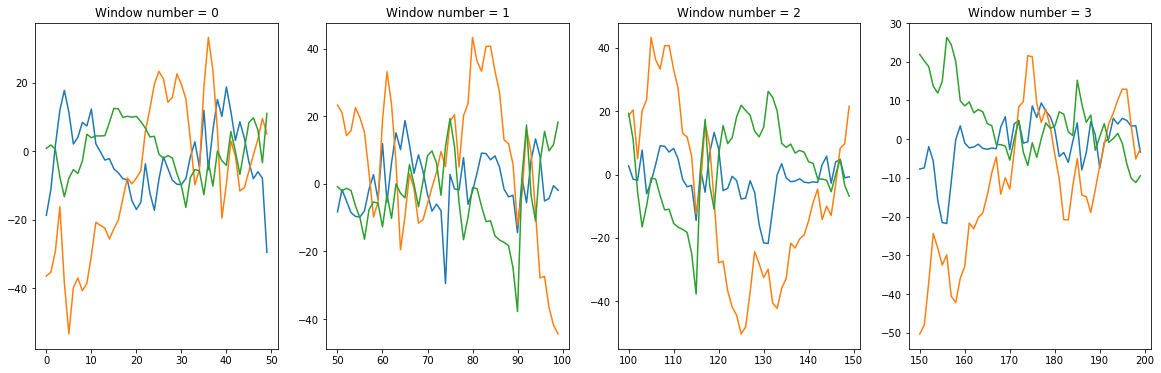

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [16]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [17]:
np.array(first_four_windows[0][columns_of_interest]).shape

(50, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [18]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-8.088135,-0.197021,-0.161763,50.0,0.159934,0.025579,0.227478,0.177979,0.492920,-0.492920,...,19.218750,0.289062,0.384375,50.0,7.302757,53.330264,7.312866,12.484375,16.406250,-16.406250
1,-5.474609,-0.092773,-0.109492,50.0,0.159415,0.025413,0.193395,0.177979,0.492920,-0.492920,...,-155.796875,-3.242188,-3.115937,50.0,11.348848,128.796349,11.768832,19.343750,37.765625,-37.765625
2,-3.650146,-0.044678,-0.073003,50.0,0.126026,0.015883,0.145643,0.149170,0.411377,-0.411377,...,117.828125,3.757812,2.356562,50.0,13.735620,188.667253,13.936307,26.265625,37.765625,-37.765625
3,-2.698486,-0.045166,-0.053970,50.0,0.136837,0.018724,0.147095,0.254883,0.395020,-0.395020,...,234.281250,3.750000,4.685625,50.0,8.791727,77.294469,9.962407,26.265625,26.265625,-11.218750
4,-3.884766,-0.092407,-0.077695,50.0,0.136364,0.018595,0.156945,0.254883,0.449219,-0.449219,...,-13.343750,0.242188,-0.266875,50.0,5.432773,29.515028,5.439324,15.218750,15.218750,-11.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,-46.149414,-1.027832,-0.922988,50.0,0.621975,0.386853,1.112996,0.181641,2.000000,-2.000000,...,-478.343750,-5.843750,-9.566875,50.0,51.601272,2662.691250,52.480628,92.031250,136.906250,-136.906250
7792,-46.776367,-1.063477,-0.935527,50.0,0.620041,0.384451,1.122347,0.181641,2.000000,-2.000000,...,-388.250000,-8.046875,-7.765000,50.0,56.294343,3169.053017,56.827355,135.250000,136.906250,-136.906250
7793,-49.399414,-1.071777,-0.987988,50.0,0.574514,0.330066,1.142885,0.142578,2.000000,-2.000000,...,-332.843750,-10.421875,-6.656875,50.0,54.921810,3016.405254,55.323767,135.250000,135.250000,-111.781250
7794,-47.966797,-1.057617,-0.959336,50.0,0.581148,0.337732,1.121632,0.324219,2.000000,-2.000000,...,-485.812500,-0.140625,-9.716250,50.0,48.452263,2347.621791,49.416873,128.093750,128.093750,-109.437500


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [19]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df[base_df["sensor_type"].str.contains("Thingy")].groupby("sensor_type"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Thingy


In [20]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [21]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-34.715576,-0.694336,-0.694312,50.0,0.003353,0.000011,0.694320,-0.687012,0.700684,-0.700684,...,-16.468750,-0.343750,-0.329375,50.0,0.130535,0.017039,0.354298,-0.078125,0.640625,-0.640625
1,-34.652100,-0.693481,-0.693042,50.0,0.003297,0.000011,0.693050,-0.685547,0.702881,-0.702881,...,-14.078125,-0.289062,-0.281562,50.0,0.116655,0.013608,0.304772,0.015625,0.562500,-0.562500
2,-34.660889,-0.693359,-0.693218,50.0,0.003351,0.000011,0.693226,-0.685547,0.702881,-0.702881,...,-15.484375,-0.335938,-0.309688,50.0,0.133890,0.017927,0.337391,0.015625,0.750000,-0.750000
3,-34.688232,-0.693604,-0.693765,50.0,0.003380,0.000011,0.693773,-0.685547,0.700195,-0.700195,...,-18.875000,-0.375000,-0.377500,50.0,0.123876,0.015345,0.397305,-0.046875,0.750000,-0.750000
4,-34.723877,-0.694336,-0.694478,50.0,0.003908,0.000015,0.694489,-0.685547,0.704102,-0.704102,...,-19.468750,-0.375000,-0.389375,50.0,0.145467,0.021161,0.415660,0.000000,0.671875,-0.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51557,-47.034180,-1.042969,-0.940684,50.0,0.631445,0.398723,1.132964,0.181641,2.000000,-2.000000,...,-471.656250,-2.515625,-9.433125,50.0,52.729902,2780.442579,53.567027,92.031250,136.906250,-136.906250
51558,-48.360352,-1.071777,-0.967207,50.0,0.634802,0.402974,1.156920,0.181641,2.000000,-2.000000,...,-380.750000,-5.781250,-7.615000,50.0,57.089227,3259.179822,57.594861,135.250000,136.906250,-136.906250
51559,-48.715820,-1.060547,-0.974316,50.0,0.561460,0.315238,1.124513,0.142578,2.000000,-2.000000,...,-367.968750,-8.500000,-7.359375,50.0,53.373962,2848.779854,53.878941,135.250000,135.250000,-109.437500
51560,-46.743164,-1.057129,-0.934863,50.0,0.552245,0.304974,1.085792,0.324219,2.000000,-2.000000,...,-486.781250,-2.546875,-9.735625,50.0,49.072651,2408.125086,50.029066,128.093750,128.093750,-105.000000


Now we also extract the classes from each window

In [22]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

,activity_type
window_id,
0,Lying down left
1,Lying down left
2,Lying down left
3,Lying down left
4,Lying down left
...,...
51557,Walking at normal speed
51558,Walking at normal speed
51559,Walking at normal speed


We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [23]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13  
}

In [24]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_type
window_id,
0,4
1,4
2,4
3,4
4,4
...,...
51557,1
51558,1
51559,1


In [25]:
new_activity_types = [10 if l in [0, 11, 12, 6] else l for l in list(window_id_class_labels["activity_type"])]
window_id_class_labels["activity_type"] = new_activity_types
window_id_class_labels

,activity_type
window_id,
0,4
1,4
2,4
3,4
4,4
...,...
51557,1
51558,1
51559,1


In [26]:
base_df["recording_id"].unique()

array([nan, 'Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43',
       'Respeck_s1541031_Descending stairs_06-10-2021_11-25-05', ...,
       'Thingy_s2342658_Sitting_04-10-2022_14-17-29',
       'Thingy_s2342658_Standing_04-10-2022_14-22-37',
       'Thingy_s2342658_Walking at normal speed_04-10-2022_14-53-43'],
      dtype=object)

### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [28]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (41249, 60), y_train = (41249, 1)
Test set: X_test = (10313, 60), y_test = (10313, 1)


Now we can build and train the random forest classifier

In [29]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

<ipython-input-29-014410a81363>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [30]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       700
           2       0.84      0.87      0.85       774
           3       0.86      0.88      0.87       730
           4       0.96      0.96      0.96       751
           5       0.99      0.96      0.97       748
           7       0.99      0.98      0.98       784
           8       0.81      0.73      0.77       705
           9       0.96      0.97      0.96       727
          10       0.98      0.98      0.98      3647
          13       0.98      0.95      0.97       747

    accuracy                           0.94     10313
   macro avg       0.92      0.92      0.92     10313
weighted avg       0.94      0.94      0.94     10313



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [31]:
filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 128)           2432      
                                                                 
 batch_normalization (BatchN  (None, 48, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 128)           0         
                                                                 
 activation (Activation)     (None, 48, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           49280     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 128)          512       
 hNormalization)                                        

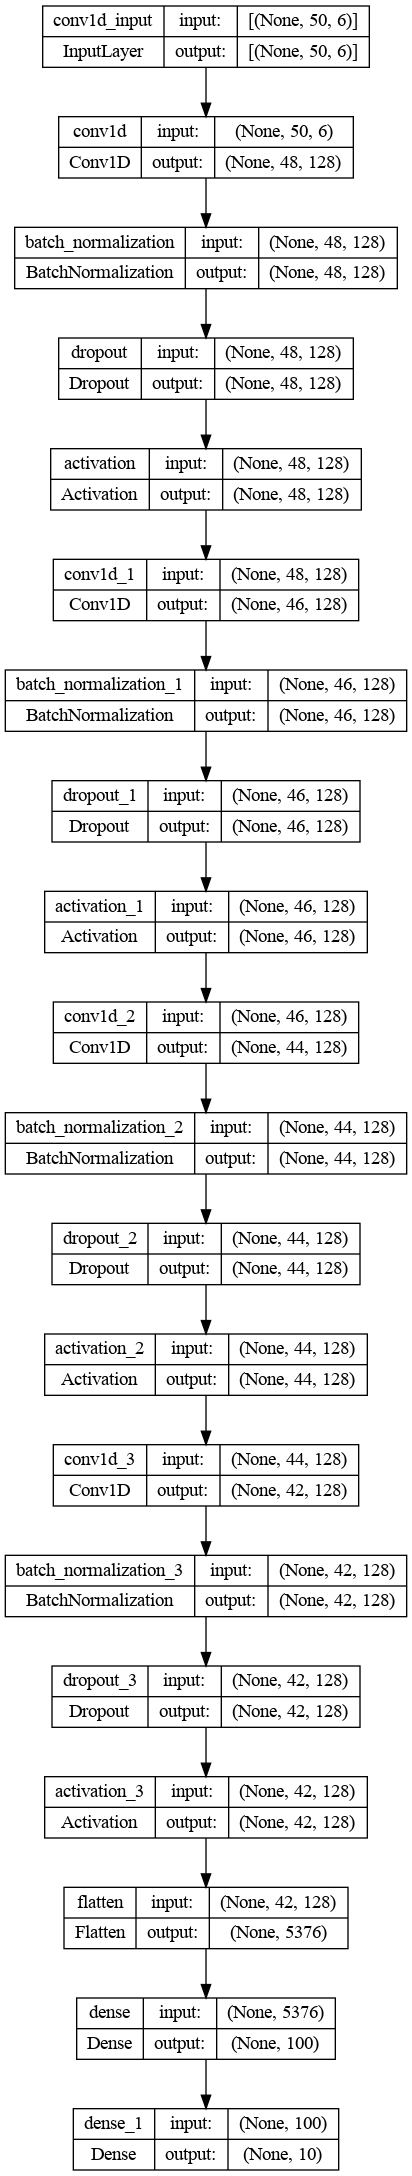

In [32]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [33]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [34]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

window_id = 360
shape = (50, 6)
window_id = 361
shape = (50, 6)
window_id = 362
shape = (50, 6)
window_id = 363
shape = (50, 6)
window_id = 364
shape = (50, 6)
window_id = 365
shape = (50, 6)
window_id = 366
shape = (50, 6)
window_id = 367
shape = (50, 6)
window_id = 368
shape = (50, 6)
window_id = 369
shape = (50, 6)
window_id = 370
shape = (50, 6)
window_id = 371
shape = (50, 6)
window_id = 372
shape = (50, 6)
window_id = 373
shape = (50, 6)
window_id = 374
shape = (50, 6)
window_id = 375
shape = (50, 6)
window_id = 376
shape = (50, 6)
window_id = 377
shape = (50, 6)
window_id = 378
shape = (50, 6)
window_id = 379
shape = (50, 6)
window_id = 380
shape = (50, 6)
window_id = 381
shape = (50, 6)
window_id = 382
shape = (50, 6)
window_id = 383
shape = (50, 6)
window_id = 384
shape = (50, 6)
window_id = 385
shape = (50, 6)
window_id = 386
shape = (50, 6)
window_id = 387
shape = (50, 6)
window_id = 388
shape = (50, 6)
window_id = 389
shape = (50, 6)
window_id = 390
shape = (50, 6)
window_i

window_id = 715
shape = (50, 6)
window_id = 716
shape = (50, 6)
window_id = 717
shape = (50, 6)
window_id = 718
shape = (50, 6)
window_id = 719
shape = (50, 6)
window_id = 720
shape = (50, 6)
window_id = 721
shape = (50, 6)
window_id = 722
shape = (50, 6)
window_id = 723
shape = (50, 6)
window_id = 724
shape = (50, 6)
window_id = 725
shape = (50, 6)
window_id = 726
shape = (50, 6)
window_id = 727
shape = (50, 6)
window_id = 728
shape = (50, 6)
window_id = 729
shape = (50, 6)
window_id = 730
shape = (50, 6)
window_id = 731
shape = (50, 6)
window_id = 732
shape = (50, 6)
window_id = 733
shape = (50, 6)
window_id = 734
shape = (50, 6)
window_id = 735
shape = (50, 6)
window_id = 736
shape = (50, 6)
window_id = 737
shape = (50, 6)
window_id = 738
shape = (50, 6)
window_id = 739
shape = (50, 6)
window_id = 740
shape = (50, 6)
window_id = 741
shape = (50, 6)
window_id = 742
shape = (50, 6)
window_id = 743
shape = (50, 6)
window_id = 744
shape = (50, 6)
window_id = 745
shape = (50, 6)
window_i

shape = (50, 6)
window_id = 1064
shape = (50, 6)
window_id = 1065
shape = (50, 6)
window_id = 1066
shape = (50, 6)
window_id = 1067
shape = (50, 6)
window_id = 1068
shape = (50, 6)
window_id = 1069
shape = (50, 6)
window_id = 1070
shape = (50, 6)
window_id = 1071
shape = (50, 6)
window_id = 1072
shape = (50, 6)
window_id = 1073
shape = (50, 6)
window_id = 1074
shape = (50, 6)
window_id = 1075
shape = (50, 6)
window_id = 1076
shape = (50, 6)
window_id = 1077
shape = (50, 6)
window_id = 1078
shape = (50, 6)
window_id = 1079
shape = (50, 6)
window_id = 1080
shape = (50, 6)
window_id = 1081
shape = (50, 6)
window_id = 1082
shape = (50, 6)
window_id = 1083
shape = (50, 6)
window_id = 1084
shape = (50, 6)
window_id = 1085
shape = (50, 6)
window_id = 1086
shape = (50, 6)
window_id = 1087
shape = (50, 6)
window_id = 1088
shape = (50, 6)
window_id = 1089
shape = (50, 6)
window_id = 1090
shape = (50, 6)
window_id = 1091
shape = (50, 6)
window_id = 1092
shape = (50, 6)
window_id = 1093
shape = (5

window_id = 1402
shape = (50, 6)
window_id = 1403
shape = (50, 6)
window_id = 1404
shape = (50, 6)
window_id = 1405
shape = (50, 6)
window_id = 1406
shape = (50, 6)
window_id = 1407
shape = (50, 6)
window_id = 1408
shape = (50, 6)
window_id = 1409
shape = (50, 6)
window_id = 1410
shape = (50, 6)
window_id = 1411
shape = (50, 6)
window_id = 1412
shape = (50, 6)
window_id = 1413
shape = (50, 6)
window_id = 1414
shape = (50, 6)
window_id = 1415
shape = (50, 6)
window_id = 1416
shape = (50, 6)
window_id = 1417
shape = (50, 6)
window_id = 1418
shape = (50, 6)
window_id = 1419
shape = (50, 6)
window_id = 1420
shape = (50, 6)
window_id = 1421
shape = (50, 6)
window_id = 1422
shape = (50, 6)
window_id = 1423
shape = (50, 6)
window_id = 1424
shape = (50, 6)
window_id = 1425
shape = (50, 6)
window_id = 1426
shape = (50, 6)
window_id = 1427
shape = (50, 6)
window_id = 1428
shape = (50, 6)
window_id = 1429
shape = (50, 6)
window_id = 1430
shape = (50, 6)
window_id = 1431
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 1754
shape = (50, 6)
window_id = 1755
shape = (50, 6)
window_id = 1756
shape = (50, 6)
window_id = 1757
shape = (50, 6)
window_id = 1758
shape = (50, 6)
window_id = 1759
shape = (50, 6)
window_id = 1760
shape = (50, 6)
window_id = 1761
shape = (50, 6)
window_id = 1762
shape = (50, 6)
window_id = 1763
shape = (50, 6)
window_id = 1764
shape = (50, 6)
window_id = 1765
shape = (50, 6)
window_id = 1766
shape = (50, 6)
window_id = 1767
shape = (50, 6)
window_id = 1768
shape = (50, 6)
window_id = 1769
shape = (50, 6)
window_id = 1770
shape = (50, 6)
window_id = 1771
shape = (50, 6)
window_id = 1772
shape = (50, 6)
window_id = 1773
shape = (50, 6)
window_id = 1774
shape = (50, 6)
window_id = 1775
shape = (50, 6)
window_id = 1776
shape = (50, 6)
window_id = 1777
shape = (50, 6)
window_id = 1778
shape = (50, 6)
window_id = 1779
shape = (50, 6)
window_id = 1780
shape = (50, 6)
window_id = 1781
shape = (50, 6)
window_id = 1782
shape = (50, 6)
window_id = 1783
shape = (5

window_id = 2111
shape = (50, 6)
window_id = 2112
shape = (50, 6)
window_id = 2113
shape = (50, 6)
window_id = 2114
shape = (50, 6)
window_id = 2115
shape = (50, 6)
window_id = 2116
shape = (50, 6)
window_id = 2117
shape = (50, 6)
window_id = 2118
shape = (50, 6)
window_id = 2119
shape = (50, 6)
window_id = 2120
shape = (50, 6)
window_id = 2121
shape = (50, 6)
window_id = 2122
shape = (50, 6)
window_id = 2123
shape = (50, 6)
window_id = 2124
shape = (50, 6)
window_id = 2125
shape = (50, 6)
window_id = 2126
shape = (50, 6)
window_id = 2127
shape = (50, 6)
window_id = 2128
shape = (50, 6)
window_id = 2129
shape = (50, 6)
window_id = 2130
shape = (50, 6)
window_id = 2131
shape = (50, 6)
window_id = 2132
shape = (50, 6)
window_id = 2133
shape = (50, 6)
window_id = 2134
shape = (50, 6)
window_id = 2135
shape = (50, 6)
window_id = 2136
shape = (50, 6)
window_id = 2137
shape = (50, 6)
window_id = 2138
shape = (50, 6)
window_id = 2139
shape = (50, 6)
window_id = 2140
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 2472
shape = (50, 6)
window_id = 2473
shape = (50, 6)
window_id = 2474
shape = (50, 6)
window_id = 2475
shape = (50, 6)
window_id = 2476
shape = (50, 6)
window_id = 2477
shape = (50, 6)
window_id = 2478
shape = (50, 6)
window_id = 2479
shape = (50, 6)
window_id = 2480
shape = (50, 6)
window_id = 2481
shape = (50, 6)
window_id = 2482
shape = (50, 6)
window_id = 2483
shape = (50, 6)
window_id = 2484
shape = (50, 6)
window_id = 2485
shape = (50, 6)
window_id = 2486
shape = (50, 6)
window_id = 2487
shape = (50, 6)
window_id = 2488
shape = (50, 6)
window_id = 2489
shape = (50, 6)
window_id = 2490
shape = (50, 6)
window_id = 2491
shape = (50, 6)
window_id = 2492
shape = (50, 6)
window_id = 2493
shape = (50, 6)
window_id = 2494
shape = (50, 6)
window_id = 2495
shape = (50, 6)
window_id = 2496
shape = (50, 6)
window_id = 2497
shape = (50, 6)
window_id = 2498
shape = (50, 6)
window_id = 2499
shape = (50, 6)
window_id = 2500
shape = (50, 6)
window_id = 2501
shape = (5

window_id = 2829
shape = (50, 6)
window_id = 2830
shape = (50, 6)
window_id = 2831
shape = (50, 6)
window_id = 2832
shape = (50, 6)
window_id = 2833
shape = (50, 6)
window_id = 2834
shape = (50, 6)
window_id = 2835
shape = (50, 6)
window_id = 2836
shape = (50, 6)
window_id = 2837
shape = (50, 6)
window_id = 2838
shape = (50, 6)
window_id = 2839
shape = (50, 6)
window_id = 2840
shape = (50, 6)
window_id = 2841
shape = (50, 6)
window_id = 2842
shape = (50, 6)
window_id = 2843
shape = (50, 6)
window_id = 2844
shape = (50, 6)
window_id = 2845
shape = (50, 6)
window_id = 2846
shape = (50, 6)
window_id = 2847
shape = (50, 6)
window_id = 2848
shape = (50, 6)
window_id = 2849
shape = (50, 6)
window_id = 2850
shape = (50, 6)
window_id = 2851
shape = (50, 6)
window_id = 2852
shape = (50, 6)
window_id = 2853
shape = (50, 6)
window_id = 2854
shape = (50, 6)
window_id = 2855
shape = (50, 6)
window_id = 2856
shape = (50, 6)
window_id = 2857
shape = (50, 6)
window_id = 2858
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 3205
shape = (50, 6)
window_id = 3206
shape = (50, 6)
window_id = 3207
shape = (50, 6)
window_id = 3208
shape = (50, 6)
window_id = 3209
shape = (50, 6)
window_id = 3210
shape = (50, 6)
window_id = 3211
shape = (50, 6)
window_id = 3212
shape = (50, 6)
window_id = 3213
shape = (50, 6)
window_id = 3214
shape = (50, 6)
window_id = 3215
shape = (50, 6)
window_id = 3216
shape = (50, 6)
window_id = 3217
shape = (50, 6)
window_id = 3218
shape = (50, 6)
window_id = 3219
shape = (50, 6)
window_id = 3220
shape = (50, 6)
window_id = 3221
shape = (50, 6)
window_id = 3222
shape = (50, 6)
window_id = 3223
shape = (50, 6)
window_id = 3224
shape = (50, 6)
window_id = 3225
shape = (50, 6)
window_id = 3226
shape = (50, 6)
window_id = 3227
shape = (50, 6)
window_id = 3228
shape = (50, 6)
window_id = 3229
shape = (50, 6)
window_id = 3230
shape = (50, 6)
window_id = 3231
shape = (50, 6)
window_id = 3232
shape = (50, 6)
window_id = 3233
shape = (50, 6)
window_id = 3234
shape = (5

window_id = 3562
shape = (50, 6)
window_id = 3563
shape = (50, 6)
window_id = 3564
shape = (50, 6)
window_id = 3565
shape = (50, 6)
window_id = 3566
shape = (50, 6)
window_id = 3567
shape = (50, 6)
window_id = 3568
shape = (50, 6)
window_id = 3569
shape = (50, 6)
window_id = 3570
shape = (50, 6)
window_id = 3571
shape = (50, 6)
window_id = 3572
shape = (50, 6)
window_id = 3573
shape = (50, 6)
window_id = 3574
shape = (50, 6)
window_id = 3575
shape = (50, 6)
window_id = 3576
shape = (50, 6)
window_id = 3577
shape = (50, 6)
window_id = 3578
shape = (50, 6)
window_id = 3579
shape = (50, 6)
window_id = 3580
shape = (50, 6)
window_id = 3581
shape = (50, 6)
window_id = 3582
shape = (50, 6)
window_id = 3583
shape = (50, 6)
window_id = 3584
shape = (50, 6)
window_id = 3585
shape = (50, 6)
window_id = 3586
shape = (50, 6)
window_id = 3587
shape = (50, 6)
window_id = 3588
shape = (50, 6)
window_id = 3589
shape = (50, 6)
window_id = 3590
shape = (50, 6)
window_id = 3591
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 3925
shape = (50, 6)
window_id = 3926
shape = (50, 6)
window_id = 3927
shape = (50, 6)
window_id = 3928
shape = (50, 6)
window_id = 3929
shape = (50, 6)
window_id = 3930
shape = (50, 6)
window_id = 3931
shape = (50, 6)
window_id = 3932
shape = (50, 6)
window_id = 3933
shape = (50, 6)
window_id = 3934
shape = (50, 6)
window_id = 3935
shape = (50, 6)
window_id = 3936
shape = (50, 6)
window_id = 3937
shape = (50, 6)
window_id = 3938
shape = (50, 6)
window_id = 3939
shape = (50, 6)
window_id = 3940
shape = (50, 6)
window_id = 3941
shape = (50, 6)
window_id = 3942
shape = (50, 6)
window_id = 3943
shape = (50, 6)
window_id = 3944
shape = (50, 6)
window_id = 3945
shape = (50, 6)
window_id = 3946
shape = (50, 6)
window_id = 3947
shape = (50, 6)
window_id = 3948
shape = (50, 6)
window_id = 3949
shape = (50, 6)
window_id = 3950
shape = (50, 6)
window_id = 3951
shape = (50, 6)
window_id = 3952
shape = (50, 6)
window_id = 3953
shape = (50, 6)
window_id = 3954
shape = (5

shape = (50, 6)
window_id = 4288
shape = (50, 6)
window_id = 4289
shape = (50, 6)
window_id = 4290
shape = (50, 6)
window_id = 4291
shape = (50, 6)
window_id = 4292
shape = (50, 6)
window_id = 4293
shape = (50, 6)
window_id = 4294
shape = (50, 6)
window_id = 4295
shape = (50, 6)
window_id = 4296
shape = (50, 6)
window_id = 4297
shape = (50, 6)
window_id = 4298
shape = (50, 6)
window_id = 4299
shape = (50, 6)
window_id = 4300
shape = (50, 6)
window_id = 4301
shape = (50, 6)
window_id = 4302
shape = (50, 6)
window_id = 4303
shape = (50, 6)
window_id = 4304
shape = (50, 6)
window_id = 4305
shape = (50, 6)
window_id = 4306
shape = (50, 6)
window_id = 4307
shape = (50, 6)
window_id = 4308
shape = (50, 6)
window_id = 4309
shape = (50, 6)
window_id = 4310
shape = (50, 6)
window_id = 4311
shape = (50, 6)
window_id = 4312
shape = (50, 6)
window_id = 4313
shape = (50, 6)
window_id = 4314
shape = (50, 6)
window_id = 4315
shape = (50, 6)
window_id = 4316
shape = (50, 6)
window_id = 4317
shape = (5

window_id = 4648
shape = (50, 6)
window_id = 4649
shape = (50, 6)
window_id = 4650
shape = (50, 6)
window_id = 4651
shape = (50, 6)
window_id = 4652
shape = (50, 6)
window_id = 4653
shape = (50, 6)
window_id = 4654
shape = (50, 6)
window_id = 4655
shape = (50, 6)
window_id = 4656
shape = (50, 6)
window_id = 4657
shape = (50, 6)
window_id = 4658
shape = (50, 6)
window_id = 4659
shape = (50, 6)
window_id = 4660
shape = (50, 6)
window_id = 4661
shape = (50, 6)
window_id = 4662
shape = (50, 6)
window_id = 4663
shape = (50, 6)
window_id = 4664
shape = (50, 6)
window_id = 4665
shape = (50, 6)
window_id = 4666
shape = (50, 6)
window_id = 4667
shape = (50, 6)
window_id = 4668
shape = (50, 6)
window_id = 4669
shape = (50, 6)
window_id = 4670
shape = (50, 6)
window_id = 4671
shape = (50, 6)
window_id = 4672
shape = (50, 6)
window_id = 4673
shape = (50, 6)
window_id = 4674
shape = (50, 6)
window_id = 4675
shape = (50, 6)
window_id = 4676
shape = (50, 6)
window_id = 4677
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 5008
shape = (50, 6)
window_id = 5009
shape = (50, 6)
window_id = 5010
shape = (50, 6)
window_id = 5011
shape = (50, 6)
window_id = 5012
shape = (50, 6)
window_id = 5013
shape = (50, 6)
window_id = 5014
shape = (50, 6)
window_id = 5015
shape = (50, 6)
window_id = 5016
shape = (50, 6)
window_id = 5017
shape = (50, 6)
window_id = 5018
shape = (50, 6)
window_id = 5019
shape = (50, 6)
window_id = 5020
shape = (50, 6)
window_id = 5021
shape = (50, 6)
window_id = 5022
shape = (50, 6)
window_id = 5023
shape = (50, 6)
window_id = 5024
shape = (50, 6)
window_id = 5025
shape = (50, 6)
window_id = 5026
shape = (50, 6)
window_id = 5027
shape = (50, 6)
window_id = 5028
shape = (50, 6)
window_id = 5029
shape = (50, 6)
window_id = 5030
shape = (50, 6)
window_id = 5031
shape = (50, 6)
window_id = 5032
shape = (50, 6)
window_id = 5033
shape = (50, 6)
window_id = 5034
shape = (50, 6)
window_id = 5035
shape = (50, 6)
window_id = 5036
shape = (50, 6)
window_id = 5037
shape = (5

window_id = 5376
shape = (50, 6)
window_id = 5377
shape = (50, 6)
window_id = 5378
shape = (50, 6)
window_id = 5379
shape = (50, 6)
window_id = 5380
shape = (50, 6)
window_id = 5381
shape = (50, 6)
window_id = 5382
shape = (50, 6)
window_id = 5383
shape = (50, 6)
window_id = 5384
shape = (50, 6)
window_id = 5385
shape = (50, 6)
window_id = 5386
shape = (50, 6)
window_id = 5387
shape = (50, 6)
window_id = 5388
shape = (50, 6)
window_id = 5389
shape = (50, 6)
window_id = 5390
shape = (50, 6)
window_id = 5391
shape = (50, 6)
window_id = 5392
shape = (50, 6)
window_id = 5393
shape = (50, 6)
window_id = 5394
shape = (50, 6)
window_id = 5395
shape = (50, 6)
window_id = 5396
shape = (50, 6)
window_id = 5397
shape = (50, 6)
window_id = 5398
shape = (50, 6)
window_id = 5399
shape = (50, 6)
window_id = 5400
shape = (50, 6)
window_id = 5401
shape = (50, 6)
window_id = 5402
shape = (50, 6)
window_id = 5403
shape = (50, 6)
window_id = 5404
shape = (50, 6)
window_id = 5405
shape = (50, 6)
window_id 

window_id = 5740
shape = (50, 6)
window_id = 5741
shape = (50, 6)
window_id = 5742
shape = (50, 6)
window_id = 5743
shape = (50, 6)
window_id = 5744
shape = (50, 6)
window_id = 5745
shape = (50, 6)
window_id = 5746
shape = (50, 6)
window_id = 5747
shape = (50, 6)
window_id = 5748
shape = (50, 6)
window_id = 5749
shape = (50, 6)
window_id = 5750
shape = (50, 6)
window_id = 5751
shape = (50, 6)
window_id = 5752
shape = (50, 6)
window_id = 5753
shape = (50, 6)
window_id = 5754
shape = (50, 6)
window_id = 5755
shape = (50, 6)
window_id = 5756
shape = (50, 6)
window_id = 5757
shape = (50, 6)
window_id = 5758
shape = (50, 6)
window_id = 5759
shape = (50, 6)
window_id = 5760
shape = (50, 6)
window_id = 5761
shape = (50, 6)
window_id = 5762
shape = (50, 6)
window_id = 5763
shape = (50, 6)
window_id = 5764
shape = (50, 6)
window_id = 5765
shape = (50, 6)
window_id = 5766
shape = (50, 6)
window_id = 5767
shape = (50, 6)
window_id = 5768
shape = (50, 6)
window_id = 5769
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 6100
shape = (50, 6)
window_id = 6101
shape = (50, 6)
window_id = 6102
shape = (50, 6)
window_id = 6103
shape = (50, 6)
window_id = 6104
shape = (50, 6)
window_id = 6105
shape = (50, 6)
window_id = 6106
shape = (50, 6)
window_id = 6107
shape = (50, 6)
window_id = 6108
shape = (50, 6)
window_id = 6109
shape = (50, 6)
window_id = 6110
shape = (50, 6)
window_id = 6111
shape = (50, 6)
window_id = 6112
shape = (50, 6)
window_id = 6113
shape = (50, 6)
window_id = 6114
shape = (50, 6)
window_id = 6115
shape = (50, 6)
window_id = 6116
shape = (50, 6)
window_id = 6117
shape = (50, 6)
window_id = 6118
shape = (50, 6)
window_id = 6119
shape = (50, 6)
window_id = 6120
shape = (50, 6)
window_id = 6121
shape = (50, 6)
window_id = 6122
shape = (50, 6)
window_id = 6123
shape = (50, 6)
window_id = 6124
shape = (50, 6)
window_id = 6125
shape = (50, 6)
window_id = 6126
shape = (50, 6)
window_id = 6127
shape = (50, 6)
window_id = 6128
shape = (50, 6)
window_id = 6129
shape = (5

shape = (50, 6)
window_id = 6454
shape = (50, 6)
window_id = 6455
shape = (50, 6)
window_id = 6456
shape = (50, 6)
window_id = 6457
shape = (50, 6)
window_id = 6458
shape = (50, 6)
window_id = 6459
shape = (50, 6)
window_id = 6460
shape = (50, 6)
window_id = 6461
shape = (50, 6)
window_id = 6462
shape = (50, 6)
window_id = 6463
shape = (50, 6)
window_id = 6464
shape = (50, 6)
window_id = 6465
shape = (50, 6)
window_id = 6466
shape = (50, 6)
window_id = 6467
shape = (50, 6)
window_id = 6468
shape = (50, 6)
window_id = 6469
shape = (50, 6)
window_id = 6470
shape = (50, 6)
window_id = 6471
shape = (50, 6)
window_id = 6472
shape = (50, 6)
window_id = 6473
shape = (50, 6)
window_id = 6474
shape = (50, 6)
window_id = 6475
shape = (50, 6)
window_id = 6476
shape = (50, 6)
window_id = 6477
shape = (50, 6)
window_id = 6478
shape = (50, 6)
window_id = 6479
shape = (50, 6)
window_id = 6480
shape = (50, 6)
window_id = 6481
shape = (50, 6)
window_id = 6482
shape = (50, 6)
window_id = 6483
shape = (5

window_id = 6811
shape = (50, 6)
window_id = 6812
shape = (50, 6)
window_id = 6813
shape = (50, 6)
window_id = 6814
shape = (50, 6)
window_id = 6815
shape = (50, 6)
window_id = 6816
shape = (50, 6)
window_id = 6817
shape = (50, 6)
window_id = 6818
shape = (50, 6)
window_id = 6819
shape = (50, 6)
window_id = 6820
shape = (50, 6)
window_id = 6821
shape = (50, 6)
window_id = 6822
shape = (50, 6)
window_id = 6823
shape = (50, 6)
window_id = 6824
shape = (50, 6)
window_id = 6825
shape = (50, 6)
window_id = 6826
shape = (50, 6)
window_id = 6827
shape = (50, 6)
window_id = 6828
shape = (50, 6)
window_id = 6829
shape = (50, 6)
window_id = 6830
shape = (50, 6)
window_id = 6831
shape = (50, 6)
window_id = 6832
shape = (50, 6)
window_id = 6833
shape = (50, 6)
window_id = 6834
shape = (50, 6)
window_id = 6835
shape = (50, 6)
window_id = 6836
shape = (50, 6)
window_id = 6837
shape = (50, 6)
window_id = 6838
shape = (50, 6)
window_id = 6839
shape = (50, 6)
window_id = 6840
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 7169
shape = (50, 6)
window_id = 7170
shape = (50, 6)
window_id = 7171
shape = (50, 6)
window_id = 7172
shape = (50, 6)
window_id = 7173
shape = (50, 6)
window_id = 7174
shape = (50, 6)
window_id = 7175
shape = (50, 6)
window_id = 7176
shape = (50, 6)
window_id = 7177
shape = (50, 6)
window_id = 7178
shape = (50, 6)
window_id = 7179
shape = (50, 6)
window_id = 7180
shape = (50, 6)
window_id = 7181
shape = (50, 6)
window_id = 7182
shape = (50, 6)
window_id = 7183
shape = (50, 6)
window_id = 7184
shape = (50, 6)
window_id = 7185
shape = (50, 6)
window_id = 7186
shape = (50, 6)
window_id = 7187
shape = (50, 6)
window_id = 7188
shape = (50, 6)
window_id = 7189
shape = (50, 6)
window_id = 7190
shape = (50, 6)
window_id = 7191
shape = (50, 6)
window_id = 7192
shape = (50, 6)
window_id = 7193
shape = (50, 6)
window_id = 7194
shape = (50, 6)
window_id = 7195
shape = (50, 6)
window_id = 7196
shape = (50, 6)
window_id = 7197
shape = (50, 6)
window_id = 7198
shape = (5

window_id = 7524
shape = (50, 6)
window_id = 7525
shape = (50, 6)
window_id = 7526
shape = (50, 6)
window_id = 7527
shape = (50, 6)
window_id = 7528
shape = (50, 6)
window_id = 7529
shape = (50, 6)
window_id = 7530
shape = (50, 6)
window_id = 7531
shape = (50, 6)
window_id = 7532
shape = (50, 6)
window_id = 7533
shape = (50, 6)
window_id = 7534
shape = (50, 6)
window_id = 7535
shape = (50, 6)
window_id = 7536
shape = (50, 6)
window_id = 7537
shape = (50, 6)
window_id = 7538
shape = (50, 6)
window_id = 7539
shape = (50, 6)
window_id = 7540
shape = (50, 6)
window_id = 7541
shape = (50, 6)
window_id = 7542
shape = (50, 6)
window_id = 7543
shape = (50, 6)
window_id = 7544
shape = (50, 6)
window_id = 7545
shape = (50, 6)
window_id = 7546
shape = (50, 6)
window_id = 7547
shape = (50, 6)
window_id = 7548
shape = (50, 6)
window_id = 7549
shape = (50, 6)
window_id = 7550
shape = (50, 6)
window_id = 7551
shape = (50, 6)
window_id = 7552
shape = (50, 6)
window_id = 7553
shape = (50, 6)
window_id 

window_id = 7891
shape = (50, 6)
window_id = 7892
shape = (50, 6)
window_id = 7893
shape = (50, 6)
window_id = 7894
shape = (50, 6)
window_id = 7895
shape = (50, 6)
window_id = 7896
shape = (50, 6)
window_id = 7897
shape = (50, 6)
window_id = 7898
shape = (50, 6)
window_id = 7899
shape = (50, 6)
window_id = 7900
shape = (50, 6)
window_id = 7901
shape = (50, 6)
window_id = 7902
shape = (50, 6)
window_id = 7903
shape = (50, 6)
window_id = 7904
shape = (50, 6)
window_id = 7905
shape = (50, 6)
window_id = 7906
shape = (50, 6)
window_id = 7907
shape = (50, 6)
window_id = 7908
shape = (50, 6)
window_id = 7909
shape = (50, 6)
window_id = 7910
shape = (50, 6)
window_id = 7911
shape = (50, 6)
window_id = 7912
shape = (50, 6)
window_id = 7913
shape = (50, 6)
window_id = 7914
shape = (50, 6)
window_id = 7915
shape = (50, 6)
window_id = 7916
shape = (50, 6)
window_id = 7917
shape = (50, 6)
window_id = 7918
shape = (50, 6)
window_id = 7919
shape = (50, 6)
window_id = 7920
shape = (50, 6)
window_id 

window_id = 8250
shape = (50, 6)
window_id = 8251
shape = (50, 6)
window_id = 8252
shape = (50, 6)
window_id = 8253
shape = (50, 6)
window_id = 8254
shape = (50, 6)
window_id = 8255
shape = (50, 6)
window_id = 8256
shape = (50, 6)
window_id = 8257
shape = (50, 6)
window_id = 8258
shape = (50, 6)
window_id = 8259
shape = (50, 6)
window_id = 8260
shape = (50, 6)
window_id = 8261
shape = (50, 6)
window_id = 8262
shape = (50, 6)
window_id = 8263
shape = (50, 6)
window_id = 8264
shape = (50, 6)
window_id = 8265
shape = (50, 6)
window_id = 8266
shape = (50, 6)
window_id = 8267
shape = (50, 6)
window_id = 8268
shape = (50, 6)
window_id = 8269
shape = (50, 6)
window_id = 8270
shape = (50, 6)
window_id = 8271
shape = (50, 6)
window_id = 8272
shape = (50, 6)
window_id = 8273
shape = (50, 6)
window_id = 8274
shape = (50, 6)
window_id = 8275
shape = (50, 6)
window_id = 8276
shape = (50, 6)
window_id = 8277
shape = (50, 6)
window_id = 8278
shape = (50, 6)
window_id = 8279
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 8618
shape = (50, 6)
window_id = 8619
shape = (50, 6)
window_id = 8620
shape = (50, 6)
window_id = 8621
shape = (50, 6)
window_id = 8622
shape = (50, 6)
window_id = 8623
shape = (50, 6)
window_id = 8624
shape = (50, 6)
window_id = 8625
shape = (50, 6)
window_id = 8626
shape = (50, 6)
window_id = 8627
shape = (50, 6)
window_id = 8628
shape = (50, 6)
window_id = 8629
shape = (50, 6)
window_id = 8630
shape = (50, 6)
window_id = 8631
shape = (50, 6)
window_id = 8632
shape = (50, 6)
window_id = 8633
shape = (50, 6)
window_id = 8634
shape = (50, 6)
window_id = 8635
shape = (50, 6)
window_id = 8636
shape = (50, 6)
window_id = 8637
shape = (50, 6)
window_id = 8638
shape = (50, 6)
window_id = 8639
shape = (50, 6)
window_id = 8640
shape = (50, 6)
window_id = 8641
shape = (50, 6)
window_id = 8642
shape = (50, 6)
window_id = 8643
shape = (50, 6)
window_id = 8644
shape = (50, 6)
window_id = 8645
shape = (50, 6)
window_id = 8646
shape = (50, 6)
window_id = 8647
shape = (5

shape = (50, 6)
window_id = 8973
shape = (50, 6)
window_id = 8974
shape = (50, 6)
window_id = 8975
shape = (50, 6)
window_id = 8976
shape = (50, 6)
window_id = 8977
shape = (50, 6)
window_id = 8978
shape = (50, 6)
window_id = 8979
shape = (50, 6)
window_id = 8980
shape = (50, 6)
window_id = 8981
shape = (50, 6)
window_id = 8982
shape = (50, 6)
window_id = 8983
shape = (50, 6)
window_id = 8984
shape = (50, 6)
window_id = 8985
shape = (50, 6)
window_id = 8986
shape = (50, 6)
window_id = 8987
shape = (50, 6)
window_id = 8988
shape = (50, 6)
window_id = 8989
shape = (50, 6)
window_id = 8990
shape = (50, 6)
window_id = 8991
shape = (50, 6)
window_id = 8992
shape = (50, 6)
window_id = 8993
shape = (50, 6)
window_id = 8994
shape = (50, 6)
window_id = 8995
shape = (50, 6)
window_id = 8996
shape = (50, 6)
window_id = 8997
shape = (50, 6)
window_id = 8998
shape = (50, 6)
window_id = 8999
shape = (50, 6)
window_id = 9000
shape = (50, 6)
window_id = 9001
shape = (50, 6)
window_id = 9002
shape = (5

shape = (50, 6)
window_id = 9326
shape = (50, 6)
window_id = 9327
shape = (50, 6)
window_id = 9328
shape = (50, 6)
window_id = 9329
shape = (50, 6)
window_id = 9330
shape = (50, 6)
window_id = 9331
shape = (50, 6)
window_id = 9332
shape = (50, 6)
window_id = 9333
shape = (50, 6)
window_id = 9334
shape = (50, 6)
window_id = 9335
shape = (50, 6)
window_id = 9336
shape = (50, 6)
window_id = 9337
shape = (50, 6)
window_id = 9338
shape = (50, 6)
window_id = 9339
shape = (50, 6)
window_id = 9340
shape = (50, 6)
window_id = 9341
shape = (50, 6)
window_id = 9342
shape = (50, 6)
window_id = 9343
shape = (50, 6)
window_id = 9344
shape = (50, 6)
window_id = 9345
shape = (50, 6)
window_id = 9346
shape = (50, 6)
window_id = 9347
shape = (50, 6)
window_id = 9348
shape = (50, 6)
window_id = 9349
shape = (50, 6)
window_id = 9350
shape = (50, 6)
window_id = 9351
shape = (50, 6)
window_id = 9352
shape = (50, 6)
window_id = 9353
shape = (50, 6)
window_id = 9354
shape = (50, 6)
window_id = 9355
shape = (5

shape = (50, 6)
window_id = 9684
shape = (50, 6)
window_id = 9685
shape = (50, 6)
window_id = 9686
shape = (50, 6)
window_id = 9687
shape = (50, 6)
window_id = 9688
shape = (50, 6)
window_id = 9689
shape = (50, 6)
window_id = 9690
shape = (50, 6)
window_id = 9691
shape = (50, 6)
window_id = 9692
shape = (50, 6)
window_id = 9693
shape = (50, 6)
window_id = 9694
shape = (50, 6)
window_id = 9695
shape = (50, 6)
window_id = 9696
shape = (50, 6)
window_id = 9697
shape = (50, 6)
window_id = 9698
shape = (50, 6)
window_id = 9699
shape = (50, 6)
window_id = 9700
shape = (50, 6)
window_id = 9701
shape = (50, 6)
window_id = 9702
shape = (50, 6)
window_id = 9703
shape = (50, 6)
window_id = 9704
shape = (50, 6)
window_id = 9705
shape = (50, 6)
window_id = 9706
shape = (50, 6)
window_id = 9707
shape = (50, 6)
window_id = 9708
shape = (50, 6)
window_id = 9709
shape = (50, 6)
window_id = 9710
shape = (50, 6)
window_id = 9711
shape = (50, 6)
window_id = 9712
shape = (50, 6)
window_id = 9713
shape = (5

window_id = 10041
shape = (50, 6)
window_id = 10042
shape = (50, 6)
window_id = 10043
shape = (50, 6)
window_id = 10044
shape = (50, 6)
window_id = 10045
shape = (50, 6)
window_id = 10046
shape = (50, 6)
window_id = 10047
shape = (50, 6)
window_id = 10048
shape = (50, 6)
window_id = 10049
shape = (50, 6)
window_id = 10050
shape = (50, 6)
window_id = 10051
shape = (50, 6)
window_id = 10052
shape = (50, 6)
window_id = 10053
shape = (50, 6)
window_id = 10054
shape = (50, 6)
window_id = 10055
shape = (50, 6)
window_id = 10056
shape = (50, 6)
window_id = 10057
shape = (50, 6)
window_id = 10058
shape = (50, 6)
window_id = 10059
shape = (50, 6)
window_id = 10060
shape = (50, 6)
window_id = 10061
shape = (50, 6)
window_id = 10062
shape = (50, 6)
window_id = 10063
shape = (50, 6)
window_id = 10064
shape = (50, 6)
window_id = 10065
shape = (50, 6)
window_id = 10066
shape = (50, 6)
window_id = 10067
shape = (50, 6)
window_id = 10068
shape = (50, 6)
window_id = 10069
shape = (50, 6)
window_id = 10

window_id = 10405
shape = (50, 6)
window_id = 10406
shape = (50, 6)
window_id = 10407
shape = (50, 6)
window_id = 10408
shape = (50, 6)
window_id = 10409
shape = (50, 6)
window_id = 10410
shape = (50, 6)
window_id = 10411
shape = (50, 6)
window_id = 10412
shape = (50, 6)
window_id = 10413
shape = (50, 6)
window_id = 10414
shape = (50, 6)
window_id = 10415
shape = (50, 6)
window_id = 10416
shape = (50, 6)
window_id = 10417
shape = (50, 6)
window_id = 10418
shape = (50, 6)
window_id = 10419
shape = (50, 6)
window_id = 10420
shape = (50, 6)
window_id = 10421
shape = (50, 6)
window_id = 10422
shape = (50, 6)
window_id = 10423
shape = (50, 6)
window_id = 10424
shape = (50, 6)
window_id = 10425
shape = (50, 6)
window_id = 10426
shape = (50, 6)
window_id = 10427
shape = (50, 6)
window_id = 10428
shape = (50, 6)
window_id = 10429
shape = (50, 6)
window_id = 10430
shape = (50, 6)
window_id = 10431
shape = (50, 6)
window_id = 10432
shape = (50, 6)
window_id = 10433
shape = (50, 6)
window_id = 10

window_id = 10774
shape = (50, 6)
window_id = 10775
shape = (50, 6)
window_id = 10776
shape = (50, 6)
window_id = 10777
shape = (50, 6)
window_id = 10778
shape = (50, 6)
window_id = 10779
shape = (50, 6)
window_id = 10780
shape = (50, 6)
window_id = 10781
shape = (50, 6)
window_id = 10782
shape = (50, 6)
window_id = 10783
shape = (50, 6)
window_id = 10784
shape = (50, 6)
window_id = 10785
shape = (50, 6)
window_id = 10786
shape = (50, 6)
window_id = 10787
shape = (50, 6)
window_id = 10788
shape = (50, 6)
window_id = 10789
shape = (50, 6)
window_id = 10790
shape = (50, 6)
window_id = 10791
shape = (50, 6)
window_id = 10792
shape = (50, 6)
window_id = 10793
shape = (50, 6)
window_id = 10794
shape = (50, 6)
window_id = 10795
shape = (50, 6)
window_id = 10796
shape = (50, 6)
window_id = 10797
shape = (50, 6)
window_id = 10798
shape = (50, 6)
window_id = 10799
shape = (50, 6)
window_id = 10800
shape = (50, 6)
window_id = 10801
shape = (50, 6)
window_id = 10802
shape = (50, 6)
window_id = 10

window_id = 11137
shape = (50, 6)
window_id = 11138
shape = (50, 6)
window_id = 11139
shape = (50, 6)
window_id = 11140
shape = (50, 6)
window_id = 11141
shape = (50, 6)
window_id = 11142
shape = (50, 6)
window_id = 11143
shape = (50, 6)
window_id = 11144
shape = (50, 6)
window_id = 11145
shape = (50, 6)
window_id = 11146
shape = (50, 6)
window_id = 11147
shape = (50, 6)
window_id = 11148
shape = (50, 6)
window_id = 11149
shape = (50, 6)
window_id = 11150
shape = (50, 6)
window_id = 11151
shape = (50, 6)
window_id = 11152
shape = (50, 6)
window_id = 11153
shape = (50, 6)
window_id = 11154
shape = (50, 6)
window_id = 11155
shape = (50, 6)
window_id = 11156
shape = (50, 6)
window_id = 11157
shape = (50, 6)
window_id = 11158
shape = (50, 6)
window_id = 11159
shape = (50, 6)
window_id = 11160
shape = (50, 6)
window_id = 11161
shape = (50, 6)
window_id = 11162
shape = (50, 6)
window_id = 11163
shape = (50, 6)
window_id = 11164
shape = (50, 6)
window_id = 11165
shape = (50, 6)
window_id = 11

shape = (50, 6)
window_id = 11495
shape = (50, 6)
window_id = 11496
shape = (50, 6)
window_id = 11497
shape = (50, 6)
window_id = 11498
shape = (50, 6)
window_id = 11499
shape = (50, 6)
window_id = 11500
shape = (50, 6)
window_id = 11501
shape = (50, 6)
window_id = 11502
shape = (50, 6)
window_id = 11503
shape = (50, 6)
window_id = 11504
shape = (50, 6)
window_id = 11505
shape = (50, 6)
window_id = 11506
shape = (50, 6)
window_id = 11507
shape = (50, 6)
window_id = 11508
shape = (50, 6)
window_id = 11509
shape = (50, 6)
window_id = 11510
shape = (50, 6)
window_id = 11511
shape = (50, 6)
window_id = 11512
shape = (50, 6)
window_id = 11513
shape = (50, 6)
window_id = 11514
shape = (50, 6)
window_id = 11515
shape = (50, 6)
window_id = 11516
shape = (50, 6)
window_id = 11517
shape = (50, 6)
window_id = 11518
shape = (50, 6)
window_id = 11519
shape = (50, 6)
window_id = 11520
shape = (50, 6)
window_id = 11521
shape = (50, 6)
window_id = 11522
shape = (50, 6)
window_id = 11523
shape = (50, 6

window_id = 11851
shape = (50, 6)
window_id = 11852
shape = (50, 6)
window_id = 11853
shape = (50, 6)
window_id = 11854
shape = (50, 6)
window_id = 11855
shape = (50, 6)
window_id = 11856
shape = (50, 6)
window_id = 11857
shape = (50, 6)
window_id = 11858
shape = (50, 6)
window_id = 11859
shape = (50, 6)
window_id = 11860
shape = (50, 6)
window_id = 11861
shape = (50, 6)
window_id = 11862
shape = (50, 6)
window_id = 11863
shape = (50, 6)
window_id = 11864
shape = (50, 6)
window_id = 11865
shape = (50, 6)
window_id = 11866
shape = (50, 6)
window_id = 11867
shape = (50, 6)
window_id = 11868
shape = (50, 6)
window_id = 11869
shape = (50, 6)
window_id = 11870
shape = (50, 6)
window_id = 11871
shape = (50, 6)
window_id = 11872
shape = (50, 6)
window_id = 11873
shape = (50, 6)
window_id = 11874
shape = (50, 6)
window_id = 11875
shape = (50, 6)
window_id = 11876
shape = (50, 6)
window_id = 11877
shape = (50, 6)
window_id = 11878
shape = (50, 6)
window_id = 11879
shape = (50, 6)
window_id = 11

shape = (50, 6)
window_id = 12211
shape = (50, 6)
window_id = 12212
shape = (50, 6)
window_id = 12213
shape = (50, 6)
window_id = 12214
shape = (50, 6)
window_id = 12215
shape = (50, 6)
window_id = 12216
shape = (50, 6)
window_id = 12217
shape = (50, 6)
window_id = 12218
shape = (50, 6)
window_id = 12219
shape = (50, 6)
window_id = 12220
shape = (50, 6)
window_id = 12221
shape = (50, 6)
window_id = 12222
shape = (50, 6)
window_id = 12223
shape = (50, 6)
window_id = 12224
shape = (50, 6)
window_id = 12225
shape = (50, 6)
window_id = 12226
shape = (50, 6)
window_id = 12227
shape = (50, 6)
window_id = 12228
shape = (50, 6)
window_id = 12229
shape = (50, 6)
window_id = 12230
shape = (50, 6)
window_id = 12231
shape = (50, 6)
window_id = 12232
shape = (50, 6)
window_id = 12233
shape = (50, 6)
window_id = 12234
shape = (50, 6)
window_id = 12235
shape = (50, 6)
window_id = 12236
shape = (50, 6)
window_id = 12237
shape = (50, 6)
window_id = 12238
shape = (50, 6)
window_id = 12239
shape = (50, 6

window_id = 12567
shape = (50, 6)
window_id = 12568
shape = (50, 6)
window_id = 12569
shape = (50, 6)
window_id = 12570
shape = (50, 6)
window_id = 12571
shape = (50, 6)
window_id = 12572
shape = (50, 6)
window_id = 12573
shape = (50, 6)
window_id = 12574
shape = (50, 6)
window_id = 12575
shape = (50, 6)
window_id = 12576
shape = (50, 6)
window_id = 12577
shape = (50, 6)
window_id = 12578
shape = (50, 6)
window_id = 12579
shape = (50, 6)
window_id = 12580
shape = (50, 6)
window_id = 12581
shape = (50, 6)
window_id = 12582
shape = (50, 6)
window_id = 12583
shape = (50, 6)
window_id = 12584
shape = (50, 6)
window_id = 12585
shape = (50, 6)
window_id = 12586
shape = (50, 6)
window_id = 12587
shape = (50, 6)
window_id = 12588
shape = (50, 6)
window_id = 12589
shape = (50, 6)
window_id = 12590
shape = (50, 6)
window_id = 12591
shape = (50, 6)
window_id = 12592
shape = (50, 6)
window_id = 12593
shape = (50, 6)
window_id = 12594
shape = (50, 6)
window_id = 12595
shape = (50, 6)
window_id = 12

shape = (50, 6)
window_id = 12930
shape = (50, 6)
window_id = 12931
shape = (50, 6)
window_id = 12932
shape = (50, 6)
window_id = 12933
shape = (50, 6)
window_id = 12934
shape = (50, 6)
window_id = 12935
shape = (50, 6)
window_id = 12936
shape = (50, 6)
window_id = 12937
shape = (50, 6)
window_id = 12938
shape = (50, 6)
window_id = 12939
shape = (50, 6)
window_id = 12940
shape = (50, 6)
window_id = 12941
shape = (50, 6)
window_id = 12942
shape = (50, 6)
window_id = 12943
shape = (50, 6)
window_id = 12944
shape = (50, 6)
window_id = 12945
shape = (50, 6)
window_id = 12946
shape = (50, 6)
window_id = 12947
shape = (50, 6)
window_id = 12948
shape = (50, 6)
window_id = 12949
shape = (50, 6)
window_id = 12950
shape = (50, 6)
window_id = 12951
shape = (50, 6)
window_id = 12952
shape = (50, 6)
window_id = 12953
shape = (50, 6)
window_id = 12954
shape = (50, 6)
window_id = 12955
shape = (50, 6)
window_id = 12956
shape = (50, 6)
window_id = 12957
shape = (50, 6)
window_id = 12958
shape = (50, 6

shape = (50, 6)
window_id = 13296
shape = (50, 6)
window_id = 13297
shape = (50, 6)
window_id = 13298
shape = (50, 6)
window_id = 13299
shape = (50, 6)
window_id = 13300
shape = (50, 6)
window_id = 13301
shape = (50, 6)
window_id = 13302
shape = (50, 6)
window_id = 13303
shape = (50, 6)
window_id = 13304
shape = (50, 6)
window_id = 13305
shape = (50, 6)
window_id = 13306
shape = (50, 6)
window_id = 13307
shape = (50, 6)
window_id = 13308
shape = (50, 6)
window_id = 13309
shape = (50, 6)
window_id = 13310
shape = (50, 6)
window_id = 13311
shape = (50, 6)
window_id = 13312
shape = (50, 6)
window_id = 13313
shape = (50, 6)
window_id = 13314
shape = (50, 6)
window_id = 13315
shape = (50, 6)
window_id = 13316
shape = (50, 6)
window_id = 13317
shape = (50, 6)
window_id = 13318
shape = (50, 6)
window_id = 13319
shape = (50, 6)
window_id = 13320
shape = (50, 6)
window_id = 13321
shape = (50, 6)
window_id = 13322
shape = (50, 6)
window_id = 13323
shape = (50, 6)
window_id = 13324
shape = (50, 6

shape = (50, 6)
window_id = 13654
shape = (50, 6)
window_id = 13655
shape = (50, 6)
window_id = 13656
shape = (50, 6)
window_id = 13657
shape = (50, 6)
window_id = 13658
shape = (50, 6)
window_id = 13659
shape = (50, 6)
window_id = 13660
shape = (50, 6)
window_id = 13661
shape = (50, 6)
window_id = 13662
shape = (50, 6)
window_id = 13663
shape = (50, 6)
window_id = 13664
shape = (50, 6)
window_id = 13665
shape = (50, 6)
window_id = 13666
shape = (50, 6)
window_id = 13667
shape = (50, 6)
window_id = 13668
shape = (50, 6)
window_id = 13669
shape = (50, 6)
window_id = 13670
shape = (50, 6)
window_id = 13671
shape = (50, 6)
window_id = 13672
shape = (50, 6)
window_id = 13673
shape = (50, 6)
window_id = 13674
shape = (50, 6)
window_id = 13675
shape = (50, 6)
window_id = 13676
shape = (50, 6)
window_id = 13677
shape = (50, 6)
window_id = 13678
shape = (50, 6)
window_id = 13679
shape = (50, 6)
window_id = 13680
shape = (50, 6)
window_id = 13681
shape = (50, 6)
window_id = 13682
shape = (50, 6

shape = (50, 6)
window_id = 14014
shape = (50, 6)
window_id = 14015
shape = (50, 6)
window_id = 14016
shape = (50, 6)
window_id = 14017
shape = (50, 6)
window_id = 14018
shape = (50, 6)
window_id = 14019
shape = (50, 6)
window_id = 14020
shape = (50, 6)
window_id = 14021
shape = (50, 6)
window_id = 14022
shape = (50, 6)
window_id = 14023
shape = (50, 6)
window_id = 14024
shape = (50, 6)
window_id = 14025
shape = (50, 6)
window_id = 14026
shape = (50, 6)
window_id = 14027
shape = (50, 6)
window_id = 14028
shape = (50, 6)
window_id = 14029
shape = (50, 6)
window_id = 14030
shape = (50, 6)
window_id = 14031
shape = (50, 6)
window_id = 14032
shape = (50, 6)
window_id = 14033
shape = (50, 6)
window_id = 14034
shape = (50, 6)
window_id = 14035
shape = (50, 6)
window_id = 14036
shape = (50, 6)
window_id = 14037
shape = (50, 6)
window_id = 14038
shape = (50, 6)
window_id = 14039
shape = (50, 6)
window_id = 14040
shape = (50, 6)
window_id = 14041
shape = (50, 6)
window_id = 14042
shape = (50, 6

window_id = 14366
shape = (50, 6)
window_id = 14367
shape = (50, 6)
window_id = 14368
shape = (50, 6)
window_id = 14369
shape = (50, 6)
window_id = 14370
shape = (50, 6)
window_id = 14371
shape = (50, 6)
window_id = 14372
shape = (50, 6)
window_id = 14373
shape = (50, 6)
window_id = 14374
shape = (50, 6)
window_id = 14375
shape = (50, 6)
window_id = 14376
shape = (50, 6)
window_id = 14377
shape = (50, 6)
window_id = 14378
shape = (50, 6)
window_id = 14379
shape = (50, 6)
window_id = 14380
shape = (50, 6)
window_id = 14381
shape = (50, 6)
window_id = 14382
shape = (50, 6)
window_id = 14383
shape = (50, 6)
window_id = 14384
shape = (50, 6)
window_id = 14385
shape = (50, 6)
window_id = 14386
shape = (50, 6)
window_id = 14387
shape = (50, 6)
window_id = 14388
shape = (50, 6)
window_id = 14389
shape = (50, 6)
window_id = 14390
shape = (50, 6)
window_id = 14391
shape = (50, 6)
window_id = 14392
shape = (50, 6)
window_id = 14393
shape = (50, 6)
window_id = 14394
shape = (50, 6)
window_id = 14

shape = (50, 6)
window_id = 14731
shape = (50, 6)
window_id = 14732
shape = (50, 6)
window_id = 14733
shape = (50, 6)
window_id = 14734
shape = (50, 6)
window_id = 14735
shape = (50, 6)
window_id = 14736
shape = (50, 6)
window_id = 14737
shape = (50, 6)
window_id = 14738
shape = (50, 6)
window_id = 14739
shape = (50, 6)
window_id = 14740
shape = (50, 6)
window_id = 14741
shape = (50, 6)
window_id = 14742
shape = (50, 6)
window_id = 14743
shape = (50, 6)
window_id = 14744
shape = (50, 6)
window_id = 14745
shape = (50, 6)
window_id = 14746
shape = (50, 6)
window_id = 14747
shape = (50, 6)
window_id = 14748
shape = (50, 6)
window_id = 14749
shape = (50, 6)
window_id = 14750
shape = (50, 6)
window_id = 14751
shape = (50, 6)
window_id = 14752
shape = (50, 6)
window_id = 14753
shape = (50, 6)
window_id = 14754
shape = (50, 6)
window_id = 14755
shape = (50, 6)
window_id = 14756
shape = (50, 6)
window_id = 14757
shape = (50, 6)
window_id = 14758
shape = (50, 6)
window_id = 14759
shape = (50, 6

shape = (50, 6)
window_id = 15090
shape = (50, 6)
window_id = 15091
shape = (50, 6)
window_id = 15092
shape = (50, 6)
window_id = 15093
shape = (50, 6)
window_id = 15094
shape = (50, 6)
window_id = 15095
shape = (50, 6)
window_id = 15096
shape = (50, 6)
window_id = 15097
shape = (50, 6)
window_id = 15098
shape = (50, 6)
window_id = 15099
shape = (50, 6)
window_id = 15100
shape = (50, 6)
window_id = 15101
shape = (50, 6)
window_id = 15102
shape = (50, 6)
window_id = 15103
shape = (50, 6)
window_id = 15104
shape = (50, 6)
window_id = 15105
shape = (50, 6)
window_id = 15106
shape = (50, 6)
window_id = 15107
shape = (50, 6)
window_id = 15108
shape = (50, 6)
window_id = 15109
shape = (50, 6)
window_id = 15110
shape = (50, 6)
window_id = 15111
shape = (50, 6)
window_id = 15112
shape = (50, 6)
window_id = 15113
shape = (50, 6)
window_id = 15114
shape = (50, 6)
window_id = 15115
shape = (50, 6)
window_id = 15116
shape = (50, 6)
window_id = 15117
shape = (50, 6)
window_id = 15118
shape = (50, 6

window_id = 15450
shape = (50, 6)
window_id = 15451
shape = (50, 6)
window_id = 15452
shape = (50, 6)
window_id = 15453
shape = (50, 6)
window_id = 15454
shape = (50, 6)
window_id = 15455
shape = (50, 6)
window_id = 15456
shape = (50, 6)
window_id = 15457
shape = (50, 6)
window_id = 15458
shape = (50, 6)
window_id = 15459
shape = (50, 6)
window_id = 15460
shape = (50, 6)
window_id = 15461
shape = (50, 6)
window_id = 15462
shape = (50, 6)
window_id = 15463
shape = (50, 6)
window_id = 15464
shape = (50, 6)
window_id = 15465
shape = (50, 6)
window_id = 15466
shape = (50, 6)
window_id = 15467
shape = (50, 6)
window_id = 15468
shape = (50, 6)
window_id = 15469
shape = (50, 6)
window_id = 15470
shape = (50, 6)
window_id = 15471
shape = (50, 6)
window_id = 15472
shape = (50, 6)
window_id = 15473
shape = (50, 6)
window_id = 15474
shape = (50, 6)
window_id = 15475
shape = (50, 6)
window_id = 15476
shape = (50, 6)
window_id = 15477
shape = (50, 6)
window_id = 15478
shape = (50, 6)
window_id = 15

window_id = 15814
shape = (50, 6)
window_id = 15815
shape = (50, 6)
window_id = 15816
shape = (50, 6)
window_id = 15817
shape = (50, 6)
window_id = 15818
shape = (50, 6)
window_id = 15819
shape = (50, 6)
window_id = 15820
shape = (50, 6)
window_id = 15821
shape = (50, 6)
window_id = 15822
shape = (50, 6)
window_id = 15823
shape = (50, 6)
window_id = 15824
shape = (50, 6)
window_id = 15825
shape = (50, 6)
window_id = 15826
shape = (50, 6)
window_id = 15827
shape = (50, 6)
window_id = 15828
shape = (50, 6)
window_id = 15829
shape = (50, 6)
window_id = 15830
shape = (50, 6)
window_id = 15831
shape = (50, 6)
window_id = 15832
shape = (50, 6)
window_id = 15833
shape = (50, 6)
window_id = 15834
shape = (50, 6)
window_id = 15835
shape = (50, 6)
window_id = 15836
shape = (50, 6)
window_id = 15837
shape = (50, 6)
window_id = 15838
shape = (50, 6)
window_id = 15839
shape = (50, 6)
window_id = 15840
shape = (50, 6)
window_id = 15841
shape = (50, 6)
window_id = 15842
shape = (50, 6)
window_id = 15

shape = (50, 6)
window_id = 16174
shape = (50, 6)
window_id = 16175
shape = (50, 6)
window_id = 16176
shape = (50, 6)
window_id = 16177
shape = (50, 6)
window_id = 16178
shape = (50, 6)
window_id = 16179
shape = (50, 6)
window_id = 16180
shape = (50, 6)
window_id = 16181
shape = (50, 6)
window_id = 16182
shape = (50, 6)
window_id = 16183
shape = (50, 6)
window_id = 16184
shape = (50, 6)
window_id = 16185
shape = (50, 6)
window_id = 16186
shape = (50, 6)
window_id = 16187
shape = (50, 6)
window_id = 16188
shape = (50, 6)
window_id = 16189
shape = (50, 6)
window_id = 16190
shape = (50, 6)
window_id = 16191
shape = (50, 6)
window_id = 16192
shape = (50, 6)
window_id = 16193
shape = (50, 6)
window_id = 16194
shape = (50, 6)
window_id = 16195
shape = (50, 6)
window_id = 16196
shape = (50, 6)
window_id = 16197
shape = (50, 6)
window_id = 16198
shape = (50, 6)
window_id = 16199
shape = (50, 6)
window_id = 16200
shape = (50, 6)
window_id = 16201
shape = (50, 6)
window_id = 16202
shape = (50, 6

window_id = 16534
shape = (50, 6)
window_id = 16535
shape = (50, 6)
window_id = 16536
shape = (50, 6)
window_id = 16537
shape = (50, 6)
window_id = 16538
shape = (50, 6)
window_id = 16539
shape = (50, 6)
window_id = 16540
shape = (50, 6)
window_id = 16541
shape = (50, 6)
window_id = 16542
shape = (50, 6)
window_id = 16543
shape = (50, 6)
window_id = 16544
shape = (50, 6)
window_id = 16545
shape = (50, 6)
window_id = 16546
shape = (50, 6)
window_id = 16547
shape = (50, 6)
window_id = 16548
shape = (50, 6)
window_id = 16549
shape = (50, 6)
window_id = 16550
shape = (50, 6)
window_id = 16551
shape = (50, 6)
window_id = 16552
shape = (50, 6)
window_id = 16553
shape = (50, 6)
window_id = 16554
shape = (50, 6)
window_id = 16555
shape = (50, 6)
window_id = 16556
shape = (50, 6)
window_id = 16557
shape = (50, 6)
window_id = 16558
shape = (50, 6)
window_id = 16559
shape = (50, 6)
window_id = 16560
shape = (50, 6)
window_id = 16561
shape = (50, 6)
window_id = 16562
shape = (50, 6)
window_id = 16

shape = (50, 6)
window_id = 16895
shape = (50, 6)
window_id = 16896
shape = (50, 6)
window_id = 16897
shape = (50, 6)
window_id = 16898
shape = (50, 6)
window_id = 16899
shape = (50, 6)
window_id = 16900
shape = (50, 6)
window_id = 16901
shape = (50, 6)
window_id = 16902
shape = (50, 6)
window_id = 16903
shape = (50, 6)
window_id = 16904
shape = (50, 6)
window_id = 16905
shape = (50, 6)
window_id = 16906
shape = (50, 6)
window_id = 16907
shape = (50, 6)
window_id = 16908
shape = (50, 6)
window_id = 16909
shape = (50, 6)
window_id = 16910
shape = (50, 6)
window_id = 16911
shape = (50, 6)
window_id = 16912
shape = (50, 6)
window_id = 16913
shape = (50, 6)
window_id = 16914
shape = (50, 6)
window_id = 16915
shape = (50, 6)
window_id = 16916
shape = (50, 6)
window_id = 16917
shape = (50, 6)
window_id = 16918
shape = (50, 6)
window_id = 16919
shape = (50, 6)
window_id = 16920
shape = (50, 6)
window_id = 16921
shape = (50, 6)
window_id = 16922
shape = (50, 6)
window_id = 16923
shape = (50, 6

shape = (50, 6)
window_id = 17255
shape = (50, 6)
window_id = 17256
shape = (50, 6)
window_id = 17257
shape = (50, 6)
window_id = 17258
shape = (50, 6)
window_id = 17259
shape = (50, 6)
window_id = 17260
shape = (50, 6)
window_id = 17261
shape = (50, 6)
window_id = 17262
shape = (50, 6)
window_id = 17263
shape = (50, 6)
window_id = 17264
shape = (50, 6)
window_id = 17265
shape = (50, 6)
window_id = 17266
shape = (50, 6)
window_id = 17267
shape = (50, 6)
window_id = 17268
shape = (50, 6)
window_id = 17269
shape = (50, 6)
window_id = 17270
shape = (50, 6)
window_id = 17271
shape = (50, 6)
window_id = 17272
shape = (50, 6)
window_id = 17273
shape = (50, 6)
window_id = 17274
shape = (50, 6)
window_id = 17275
shape = (50, 6)
window_id = 17276
shape = (50, 6)
window_id = 17277
shape = (50, 6)
window_id = 17278
shape = (50, 6)
window_id = 17279
shape = (50, 6)
window_id = 17280
shape = (50, 6)
window_id = 17281
shape = (50, 6)
window_id = 17282
shape = (50, 6)
window_id = 17283
shape = (50, 6

window_id = 17617
shape = (50, 6)
window_id = 17618
shape = (50, 6)
window_id = 17619
shape = (50, 6)
window_id = 17620
shape = (50, 6)
window_id = 17621
shape = (50, 6)
window_id = 17622
shape = (50, 6)
window_id = 17623
shape = (50, 6)
window_id = 17624
shape = (50, 6)
window_id = 17625
shape = (50, 6)
window_id = 17626
shape = (50, 6)
window_id = 17627
shape = (50, 6)
window_id = 17628
shape = (50, 6)
window_id = 17629
shape = (50, 6)
window_id = 17630
shape = (50, 6)
window_id = 17631
shape = (50, 6)
window_id = 17632
shape = (50, 6)
window_id = 17633
shape = (50, 6)
window_id = 17634
shape = (50, 6)
window_id = 17635
shape = (50, 6)
window_id = 17636
shape = (50, 6)
window_id = 17637
shape = (50, 6)
window_id = 17638
shape = (50, 6)
window_id = 17639
shape = (50, 6)
window_id = 17640
shape = (50, 6)
window_id = 17641
shape = (50, 6)
window_id = 17642
shape = (50, 6)
window_id = 17643
shape = (50, 6)
window_id = 17644
shape = (50, 6)
window_id = 17645
shape = (50, 6)
window_id = 17

window_id = 17978
shape = (50, 6)
window_id = 17979
shape = (50, 6)
window_id = 17980
shape = (50, 6)
window_id = 17981
shape = (50, 6)
window_id = 17982
shape = (50, 6)
window_id = 17983
shape = (50, 6)
window_id = 17984
shape = (50, 6)
window_id = 17985
shape = (50, 6)
window_id = 17986
shape = (50, 6)
window_id = 17987
shape = (50, 6)
window_id = 17988
shape = (50, 6)
window_id = 17989
shape = (50, 6)
window_id = 17990
shape = (50, 6)
window_id = 17991
shape = (50, 6)
window_id = 17992
shape = (50, 6)
window_id = 17993
shape = (50, 6)
window_id = 17994
shape = (50, 6)
window_id = 17995
shape = (50, 6)
window_id = 17996
shape = (50, 6)
window_id = 17997
shape = (50, 6)
window_id = 17998
shape = (50, 6)
window_id = 17999
shape = (50, 6)
window_id = 18000
shape = (50, 6)
window_id = 18001
shape = (50, 6)
window_id = 18002
shape = (50, 6)
window_id = 18003
shape = (50, 6)
window_id = 18004
shape = (50, 6)
window_id = 18005
shape = (50, 6)
window_id = 18006
shape = (50, 6)
window_id = 18

shape = (50, 6)
window_id = 18339
shape = (50, 6)
window_id = 18340
shape = (50, 6)
window_id = 18341
shape = (50, 6)
window_id = 18342
shape = (50, 6)
window_id = 18343
shape = (50, 6)
window_id = 18344
shape = (50, 6)
window_id = 18345
shape = (50, 6)
window_id = 18346
shape = (50, 6)
window_id = 18347
shape = (50, 6)
window_id = 18348
shape = (50, 6)
window_id = 18349
shape = (50, 6)
window_id = 18350
shape = (50, 6)
window_id = 18351
shape = (50, 6)
window_id = 18352
shape = (50, 6)
window_id = 18353
shape = (50, 6)
window_id = 18354
shape = (50, 6)
window_id = 18355
shape = (50, 6)
window_id = 18356
shape = (50, 6)
window_id = 18357
shape = (50, 6)
window_id = 18358
shape = (50, 6)
window_id = 18359
shape = (50, 6)
window_id = 18360
shape = (50, 6)
window_id = 18361
shape = (50, 6)
window_id = 18362
shape = (50, 6)
window_id = 18363
shape = (50, 6)
window_id = 18364
shape = (50, 6)
window_id = 18365
shape = (50, 6)
window_id = 18366
shape = (50, 6)
window_id = 18367
shape = (50, 6

shape = (50, 6)
window_id = 18700
shape = (50, 6)
window_id = 18701
shape = (50, 6)
window_id = 18702
shape = (50, 6)
window_id = 18703
shape = (50, 6)
window_id = 18704
shape = (50, 6)
window_id = 18705
shape = (50, 6)
window_id = 18706
shape = (50, 6)
window_id = 18707
shape = (50, 6)
window_id = 18708
shape = (50, 6)
window_id = 18709
shape = (50, 6)
window_id = 18710
shape = (50, 6)
window_id = 18711
shape = (50, 6)
window_id = 18712
shape = (50, 6)
window_id = 18713
shape = (50, 6)
window_id = 18714
shape = (50, 6)
window_id = 18715
shape = (50, 6)
window_id = 18716
shape = (50, 6)
window_id = 18717
shape = (50, 6)
window_id = 18718
shape = (50, 6)
window_id = 18719
shape = (50, 6)
window_id = 18720
shape = (50, 6)
window_id = 18721
shape = (50, 6)
window_id = 18722
shape = (50, 6)
window_id = 18723
shape = (50, 6)
window_id = 18724
shape = (50, 6)
window_id = 18725
shape = (50, 6)
window_id = 18726
shape = (50, 6)
window_id = 18727
shape = (50, 6)
window_id = 18728
shape = (50, 6

shape = (50, 6)
window_id = 19059
shape = (50, 6)
window_id = 19060
shape = (50, 6)
window_id = 19061
shape = (50, 6)
window_id = 19062
shape = (50, 6)
window_id = 19063
shape = (50, 6)
window_id = 19064
shape = (50, 6)
window_id = 19065
shape = (50, 6)
window_id = 19066
shape = (50, 6)
window_id = 19067
shape = (50, 6)
window_id = 19068
shape = (50, 6)
window_id = 19069
shape = (50, 6)
window_id = 19070
shape = (50, 6)
window_id = 19071
shape = (50, 6)
window_id = 19072
shape = (50, 6)
window_id = 19073
shape = (50, 6)
window_id = 19074
shape = (50, 6)
window_id = 19075
shape = (50, 6)
window_id = 19076
shape = (50, 6)
window_id = 19077
shape = (50, 6)
window_id = 19078
shape = (50, 6)
window_id = 19079
shape = (50, 6)
window_id = 19080
shape = (50, 6)
window_id = 19081
shape = (50, 6)
window_id = 19082
shape = (50, 6)
window_id = 19083
shape = (50, 6)
window_id = 19084
shape = (50, 6)
window_id = 19085
shape = (50, 6)
window_id = 19086
shape = (50, 6)
window_id = 19087
shape = (50, 6

window_id = 19415
shape = (50, 6)
window_id = 19416
shape = (50, 6)
window_id = 19417
shape = (50, 6)
window_id = 19418
shape = (50, 6)
window_id = 19419
shape = (50, 6)
window_id = 19420
shape = (50, 6)
window_id = 19421
shape = (50, 6)
window_id = 19422
shape = (50, 6)
window_id = 19423
shape = (50, 6)
window_id = 19424
shape = (50, 6)
window_id = 19425
shape = (50, 6)
window_id = 19426
shape = (50, 6)
window_id = 19427
shape = (50, 6)
window_id = 19428
shape = (50, 6)
window_id = 19429
shape = (50, 6)
window_id = 19430
shape = (50, 6)
window_id = 19431
shape = (50, 6)
window_id = 19432
shape = (50, 6)
window_id = 19433
shape = (50, 6)
window_id = 19434
shape = (50, 6)
window_id = 19435
shape = (50, 6)
window_id = 19436
shape = (50, 6)
window_id = 19437
shape = (50, 6)
window_id = 19438
shape = (50, 6)
window_id = 19439
shape = (50, 6)
window_id = 19440
shape = (50, 6)
window_id = 19441
shape = (50, 6)
window_id = 19442
shape = (50, 6)
window_id = 19443
shape = (50, 6)
window_id = 19

window_id = 19776
shape = (50, 6)
window_id = 19777
shape = (50, 6)
window_id = 19778
shape = (50, 6)
window_id = 19779
shape = (50, 6)
window_id = 19780
shape = (50, 6)
window_id = 19781
shape = (50, 6)
window_id = 19782
shape = (50, 6)
window_id = 19783
shape = (50, 6)
window_id = 19784
shape = (50, 6)
window_id = 19785
shape = (50, 6)
window_id = 19786
shape = (50, 6)
window_id = 19787
shape = (50, 6)
window_id = 19788
shape = (50, 6)
window_id = 19789
shape = (50, 6)
window_id = 19790
shape = (50, 6)
window_id = 19791
shape = (50, 6)
window_id = 19792
shape = (50, 6)
window_id = 19793
shape = (50, 6)
window_id = 19794
shape = (50, 6)
window_id = 19795
shape = (50, 6)
window_id = 19796
shape = (50, 6)
window_id = 19797
shape = (50, 6)
window_id = 19798
shape = (50, 6)
window_id = 19799
shape = (50, 6)
window_id = 19800
shape = (50, 6)
window_id = 19801
shape = (50, 6)
window_id = 19802
shape = (50, 6)
window_id = 19803
shape = (50, 6)
window_id = 19804
shape = (50, 6)
window_id = 19

window_id = 20140
shape = (50, 6)
window_id = 20141
shape = (50, 6)
window_id = 20142
shape = (50, 6)
window_id = 20143
shape = (50, 6)
window_id = 20144
shape = (50, 6)
window_id = 20145
shape = (50, 6)
window_id = 20146
shape = (50, 6)
window_id = 20147
shape = (50, 6)
window_id = 20148
shape = (50, 6)
window_id = 20149
shape = (50, 6)
window_id = 20150
shape = (50, 6)
window_id = 20151
shape = (50, 6)
window_id = 20152
shape = (50, 6)
window_id = 20153
shape = (50, 6)
window_id = 20154
shape = (50, 6)
window_id = 20155
shape = (50, 6)
window_id = 20156
shape = (50, 6)
window_id = 20157
shape = (50, 6)
window_id = 20158
shape = (50, 6)
window_id = 20159
shape = (50, 6)
window_id = 20160
shape = (50, 6)
window_id = 20161
shape = (50, 6)
window_id = 20162
shape = (50, 6)
window_id = 20163
shape = (50, 6)
window_id = 20164
shape = (50, 6)
window_id = 20165
shape = (50, 6)
window_id = 20166
shape = (50, 6)
window_id = 20167
shape = (50, 6)
window_id = 20168
shape = (50, 6)
window_id = 20

window_id = 20500
shape = (50, 6)
window_id = 20501
shape = (50, 6)
window_id = 20502
shape = (50, 6)
window_id = 20503
shape = (50, 6)
window_id = 20504
shape = (50, 6)
window_id = 20505
shape = (50, 6)
window_id = 20506
shape = (50, 6)
window_id = 20507
shape = (50, 6)
window_id = 20508
shape = (50, 6)
window_id = 20509
shape = (50, 6)
window_id = 20510
shape = (50, 6)
window_id = 20511
shape = (50, 6)
window_id = 20512
shape = (50, 6)
window_id = 20513
shape = (50, 6)
window_id = 20514
shape = (50, 6)
window_id = 20515
shape = (50, 6)
window_id = 20516
shape = (50, 6)
window_id = 20517
shape = (50, 6)
window_id = 20518
shape = (50, 6)
window_id = 20519
shape = (50, 6)
window_id = 20520
shape = (50, 6)
window_id = 20521
shape = (50, 6)
window_id = 20522
shape = (50, 6)
window_id = 20523
shape = (50, 6)
window_id = 20524
shape = (50, 6)
window_id = 20525
shape = (50, 6)
window_id = 20526
shape = (50, 6)
window_id = 20527
shape = (50, 6)
window_id = 20528
shape = (50, 6)
window_id = 20

window_id = 20866
shape = (50, 6)
window_id = 20867
shape = (50, 6)
window_id = 20868
shape = (50, 6)
window_id = 20869
shape = (50, 6)
window_id = 20870
shape = (50, 6)
window_id = 20871
shape = (50, 6)
window_id = 20872
shape = (50, 6)
window_id = 20873
shape = (50, 6)
window_id = 20874
shape = (50, 6)
window_id = 20875
shape = (50, 6)
window_id = 20876
shape = (50, 6)
window_id = 20877
shape = (50, 6)
window_id = 20878
shape = (50, 6)
window_id = 20879
shape = (50, 6)
window_id = 20880
shape = (50, 6)
window_id = 20881
shape = (50, 6)
window_id = 20882
shape = (50, 6)
window_id = 20883
shape = (50, 6)
window_id = 20884
shape = (50, 6)
window_id = 20885
shape = (50, 6)
window_id = 20886
shape = (50, 6)
window_id = 20887
shape = (50, 6)
window_id = 20888
shape = (50, 6)
window_id = 20889
shape = (50, 6)
window_id = 20890
shape = (50, 6)
window_id = 20891
shape = (50, 6)
window_id = 20892
shape = (50, 6)
window_id = 20893
shape = (50, 6)
window_id = 20894
shape = (50, 6)
window_id = 20

window_id = 21227
shape = (50, 6)
window_id = 21228
shape = (50, 6)
window_id = 21229
shape = (50, 6)
window_id = 21230
shape = (50, 6)
window_id = 21231
shape = (50, 6)
window_id = 21232
shape = (50, 6)
window_id = 21233
shape = (50, 6)
window_id = 21234
shape = (50, 6)
window_id = 21235
shape = (50, 6)
window_id = 21236
shape = (50, 6)
window_id = 21237
shape = (50, 6)
window_id = 21238
shape = (50, 6)
window_id = 21239
shape = (50, 6)
window_id = 21240
shape = (50, 6)
window_id = 21241
shape = (50, 6)
window_id = 21242
shape = (50, 6)
window_id = 21243
shape = (50, 6)
window_id = 21244
shape = (50, 6)
window_id = 21245
shape = (50, 6)
window_id = 21246
shape = (50, 6)
window_id = 21247
shape = (50, 6)
window_id = 21248
shape = (50, 6)
window_id = 21249
shape = (50, 6)
window_id = 21250
shape = (50, 6)
window_id = 21251
shape = (50, 6)
window_id = 21252
shape = (50, 6)
window_id = 21253
shape = (50, 6)
window_id = 21254
shape = (50, 6)
window_id = 21255
shape = (50, 6)
window_id = 21

shape = (50, 6)
window_id = 21588
shape = (50, 6)
window_id = 21589
shape = (50, 6)
window_id = 21590
shape = (50, 6)
window_id = 21591
shape = (50, 6)
window_id = 21592
shape = (50, 6)
window_id = 21593
shape = (50, 6)
window_id = 21594
shape = (50, 6)
window_id = 21595
shape = (50, 6)
window_id = 21596
shape = (50, 6)
window_id = 21597
shape = (50, 6)
window_id = 21598
shape = (50, 6)
window_id = 21599
shape = (50, 6)
window_id = 21600
shape = (50, 6)
window_id = 21601
shape = (50, 6)
window_id = 21602
shape = (50, 6)
window_id = 21603
shape = (50, 6)
window_id = 21604
shape = (50, 6)
window_id = 21605
shape = (50, 6)
window_id = 21606
shape = (50, 6)
window_id = 21607
shape = (50, 6)
window_id = 21608
shape = (50, 6)
window_id = 21609
shape = (50, 6)
window_id = 21610
shape = (50, 6)
window_id = 21611
shape = (50, 6)
window_id = 21612
shape = (50, 6)
window_id = 21613
shape = (50, 6)
window_id = 21614
shape = (50, 6)
window_id = 21615
shape = (50, 6)
window_id = 21616
shape = (50, 6

shape = (50, 6)
window_id = 21943
shape = (50, 6)
window_id = 21944
shape = (50, 6)
window_id = 21945
shape = (50, 6)
window_id = 21946
shape = (50, 6)
window_id = 21947
shape = (50, 6)
window_id = 21948
shape = (50, 6)
window_id = 21949
shape = (50, 6)
window_id = 21950
shape = (50, 6)
window_id = 21951
shape = (50, 6)
window_id = 21952
shape = (50, 6)
window_id = 21953
shape = (50, 6)
window_id = 21954
shape = (50, 6)
window_id = 21955
shape = (50, 6)
window_id = 21956
shape = (50, 6)
window_id = 21957
shape = (50, 6)
window_id = 21958
shape = (50, 6)
window_id = 21959
shape = (50, 6)
window_id = 21960
shape = (50, 6)
window_id = 21961
shape = (50, 6)
window_id = 21962
shape = (50, 6)
window_id = 21963
shape = (50, 6)
window_id = 21964
shape = (50, 6)
window_id = 21965
shape = (50, 6)
window_id = 21966
shape = (50, 6)
window_id = 21967
shape = (50, 6)
window_id = 21968
shape = (50, 6)
window_id = 21969
shape = (50, 6)
window_id = 21970
shape = (50, 6)
window_id = 21971
shape = (50, 6

window_id = 22300
shape = (50, 6)
window_id = 22301
shape = (50, 6)
window_id = 22302
shape = (50, 6)
window_id = 22303
shape = (50, 6)
window_id = 22304
shape = (50, 6)
window_id = 22305
shape = (50, 6)
window_id = 22306
shape = (50, 6)
window_id = 22307
shape = (50, 6)
window_id = 22308
shape = (50, 6)
window_id = 22309
shape = (50, 6)
window_id = 22310
shape = (50, 6)
window_id = 22311
shape = (50, 6)
window_id = 22312
shape = (50, 6)
window_id = 22313
shape = (50, 6)
window_id = 22314
shape = (50, 6)
window_id = 22315
shape = (50, 6)
window_id = 22316
shape = (50, 6)
window_id = 22317
shape = (50, 6)
window_id = 22318
shape = (50, 6)
window_id = 22319
shape = (50, 6)
window_id = 22320
shape = (50, 6)
window_id = 22321
shape = (50, 6)
window_id = 22322
shape = (50, 6)
window_id = 22323
shape = (50, 6)
window_id = 22324
shape = (50, 6)
window_id = 22325
shape = (50, 6)
window_id = 22326
shape = (50, 6)
window_id = 22327
shape = (50, 6)
window_id = 22328
shape = (50, 6)
window_id = 22

window_id = 22664
shape = (50, 6)
window_id = 22665
shape = (50, 6)
window_id = 22666
shape = (50, 6)
window_id = 22667
shape = (50, 6)
window_id = 22668
shape = (50, 6)
window_id = 22669
shape = (50, 6)
window_id = 22670
shape = (50, 6)
window_id = 22671
shape = (50, 6)
window_id = 22672
shape = (50, 6)
window_id = 22673
shape = (50, 6)
window_id = 22674
shape = (50, 6)
window_id = 22675
shape = (50, 6)
window_id = 22676
shape = (50, 6)
window_id = 22677
shape = (50, 6)
window_id = 22678
shape = (50, 6)
window_id = 22679
shape = (50, 6)
window_id = 22680
shape = (50, 6)
window_id = 22681
shape = (50, 6)
window_id = 22682
shape = (50, 6)
window_id = 22683
shape = (50, 6)
window_id = 22684
shape = (50, 6)
window_id = 22685
shape = (50, 6)
window_id = 22686
shape = (50, 6)
window_id = 22687
shape = (50, 6)
window_id = 22688
shape = (50, 6)
window_id = 22689
shape = (50, 6)
window_id = 22690
shape = (50, 6)
window_id = 22691
shape = (50, 6)
window_id = 22692
shape = (50, 6)
window_id = 22

window_id = 23022
shape = (50, 6)
window_id = 23023
shape = (50, 6)
window_id = 23024
shape = (50, 6)
window_id = 23025
shape = (50, 6)
window_id = 23026
shape = (50, 6)
window_id = 23027
shape = (50, 6)
window_id = 23028
shape = (50, 6)
window_id = 23029
shape = (50, 6)
window_id = 23030
shape = (50, 6)
window_id = 23031
shape = (50, 6)
window_id = 23032
shape = (50, 6)
window_id = 23033
shape = (50, 6)
window_id = 23034
shape = (50, 6)
window_id = 23035
shape = (50, 6)
window_id = 23036
shape = (50, 6)
window_id = 23037
shape = (50, 6)
window_id = 23038
shape = (50, 6)
window_id = 23039
shape = (50, 6)
window_id = 23040
shape = (50, 6)
window_id = 23041
shape = (50, 6)
window_id = 23042
shape = (50, 6)
window_id = 23043
shape = (50, 6)
window_id = 23044
shape = (50, 6)
window_id = 23045
shape = (50, 6)
window_id = 23046
shape = (50, 6)
window_id = 23047
shape = (50, 6)
window_id = 23048
shape = (50, 6)
window_id = 23049
shape = (50, 6)
window_id = 23050
shape = (50, 6)
window_id = 23

window_id = 23383
shape = (50, 6)
window_id = 23384
shape = (50, 6)
window_id = 23385
shape = (50, 6)
window_id = 23386
shape = (50, 6)
window_id = 23387
shape = (50, 6)
window_id = 23388
shape = (50, 6)
window_id = 23389
shape = (50, 6)
window_id = 23390
shape = (50, 6)
window_id = 23391
shape = (50, 6)
window_id = 23392
shape = (50, 6)
window_id = 23393
shape = (50, 6)
window_id = 23394
shape = (50, 6)
window_id = 23395
shape = (50, 6)
window_id = 23396
shape = (50, 6)
window_id = 23397
shape = (50, 6)
window_id = 23398
shape = (50, 6)
window_id = 23399
shape = (50, 6)
window_id = 23400
shape = (50, 6)
window_id = 23401
shape = (50, 6)
window_id = 23402
shape = (50, 6)
window_id = 23403
shape = (50, 6)
window_id = 23404
shape = (50, 6)
window_id = 23405
shape = (50, 6)
window_id = 23406
shape = (50, 6)
window_id = 23407
shape = (50, 6)
window_id = 23408
shape = (50, 6)
window_id = 23409
shape = (50, 6)
window_id = 23410
shape = (50, 6)
window_id = 23411
shape = (50, 6)
window_id = 23

shape = (50, 6)
window_id = 23744
shape = (50, 6)
window_id = 23745
shape = (50, 6)
window_id = 23746
shape = (50, 6)
window_id = 23747
shape = (50, 6)
window_id = 23748
shape = (50, 6)
window_id = 23749
shape = (50, 6)
window_id = 23750
shape = (50, 6)
window_id = 23751
shape = (50, 6)
window_id = 23752
shape = (50, 6)
window_id = 23753
shape = (50, 6)
window_id = 23754
shape = (50, 6)
window_id = 23755
shape = (50, 6)
window_id = 23756
shape = (50, 6)
window_id = 23757
shape = (50, 6)
window_id = 23758
shape = (50, 6)
window_id = 23759
shape = (50, 6)
window_id = 23760
shape = (50, 6)
window_id = 23761
shape = (50, 6)
window_id = 23762
shape = (50, 6)
window_id = 23763
shape = (50, 6)
window_id = 23764
shape = (50, 6)
window_id = 23765
shape = (50, 6)
window_id = 23766
shape = (50, 6)
window_id = 23767
shape = (50, 6)
window_id = 23768
shape = (50, 6)
window_id = 23769
shape = (50, 6)
window_id = 23770
shape = (50, 6)
window_id = 23771
shape = (50, 6)
window_id = 23772
shape = (50, 6

window_id = 24102
shape = (50, 6)
window_id = 24103
shape = (50, 6)
window_id = 24104
shape = (50, 6)
window_id = 24105
shape = (50, 6)
window_id = 24106
shape = (50, 6)
window_id = 24107
shape = (50, 6)
window_id = 24108
shape = (50, 6)
window_id = 24109
shape = (50, 6)
window_id = 24110
shape = (50, 6)
window_id = 24111
shape = (50, 6)
window_id = 24112
shape = (50, 6)
window_id = 24113
shape = (50, 6)
window_id = 24114
shape = (50, 6)
window_id = 24115
shape = (50, 6)
window_id = 24116
shape = (50, 6)
window_id = 24117
shape = (50, 6)
window_id = 24118
shape = (50, 6)
window_id = 24119
shape = (50, 6)
window_id = 24120
shape = (50, 6)
window_id = 24121
shape = (50, 6)
window_id = 24122
shape = (50, 6)
window_id = 24123
shape = (50, 6)
window_id = 24124
shape = (50, 6)
window_id = 24125
shape = (50, 6)
window_id = 24126
shape = (50, 6)
window_id = 24127
shape = (50, 6)
window_id = 24128
shape = (50, 6)
window_id = 24129
shape = (50, 6)
window_id = 24130
shape = (50, 6)
window_id = 24

window_id = 24467
shape = (50, 6)
window_id = 24468
shape = (50, 6)
window_id = 24469
shape = (50, 6)
window_id = 24470
shape = (50, 6)
window_id = 24471
shape = (50, 6)
window_id = 24472
shape = (50, 6)
window_id = 24473
shape = (50, 6)
window_id = 24474
shape = (50, 6)
window_id = 24475
shape = (50, 6)
window_id = 24476
shape = (50, 6)
window_id = 24477
shape = (50, 6)
window_id = 24478
shape = (50, 6)
window_id = 24479
shape = (50, 6)
window_id = 24480
shape = (50, 6)
window_id = 24481
shape = (50, 6)
window_id = 24482
shape = (50, 6)
window_id = 24483
shape = (50, 6)
window_id = 24484
shape = (50, 6)
window_id = 24485
shape = (50, 6)
window_id = 24486
shape = (50, 6)
window_id = 24487
shape = (50, 6)
window_id = 24488
shape = (50, 6)
window_id = 24489
shape = (50, 6)
window_id = 24490
shape = (50, 6)
window_id = 24491
shape = (50, 6)
window_id = 24492
shape = (50, 6)
window_id = 24493
shape = (50, 6)
window_id = 24494
shape = (50, 6)
window_id = 24495
shape = (50, 6)
window_id = 24

shape = (50, 6)
window_id = 24825
shape = (50, 6)
window_id = 24826
shape = (50, 6)
window_id = 24827
shape = (50, 6)
window_id = 24828
shape = (50, 6)
window_id = 24829
shape = (50, 6)
window_id = 24830
shape = (50, 6)
window_id = 24831
shape = (50, 6)
window_id = 24832
shape = (50, 6)
window_id = 24833
shape = (50, 6)
window_id = 24834
shape = (50, 6)
window_id = 24835
shape = (50, 6)
window_id = 24836
shape = (50, 6)
window_id = 24837
shape = (50, 6)
window_id = 24838
shape = (50, 6)
window_id = 24839
shape = (50, 6)
window_id = 24840
shape = (50, 6)
window_id = 24841
shape = (50, 6)
window_id = 24842
shape = (50, 6)
window_id = 24843
shape = (50, 6)
window_id = 24844
shape = (50, 6)
window_id = 24845
shape = (50, 6)
window_id = 24846
shape = (50, 6)
window_id = 24847
shape = (50, 6)
window_id = 24848
shape = (50, 6)
window_id = 24849
shape = (50, 6)
window_id = 24850
shape = (50, 6)
window_id = 24851
shape = (50, 6)
window_id = 24852
shape = (50, 6)
window_id = 24853
shape = (50, 6

window_id = 25185
shape = (50, 6)
window_id = 25186
shape = (50, 6)
window_id = 25187
shape = (50, 6)
window_id = 25188
shape = (50, 6)
window_id = 25189
shape = (50, 6)
window_id = 25190
shape = (50, 6)
window_id = 25191
shape = (50, 6)
window_id = 25192
shape = (50, 6)
window_id = 25193
shape = (50, 6)
window_id = 25194
shape = (50, 6)
window_id = 25195
shape = (50, 6)
window_id = 25196
shape = (50, 6)
window_id = 25197
shape = (50, 6)
window_id = 25198
shape = (50, 6)
window_id = 25199
shape = (50, 6)
window_id = 25200
shape = (50, 6)
window_id = 25201
shape = (50, 6)
window_id = 25202
shape = (50, 6)
window_id = 25203
shape = (50, 6)
window_id = 25204
shape = (50, 6)
window_id = 25205
shape = (50, 6)
window_id = 25206
shape = (50, 6)
window_id = 25207
shape = (50, 6)
window_id = 25208
shape = (50, 6)
window_id = 25209
shape = (50, 6)
window_id = 25210
shape = (50, 6)
window_id = 25211
shape = (50, 6)
window_id = 25212
shape = (50, 6)
window_id = 25213
shape = (50, 6)
window_id = 25

shape = (50, 6)
window_id = 25541
shape = (50, 6)
window_id = 25542
shape = (50, 6)
window_id = 25543
shape = (50, 6)
window_id = 25544
shape = (50, 6)
window_id = 25545
shape = (50, 6)
window_id = 25546
shape = (50, 6)
window_id = 25547
shape = (50, 6)
window_id = 25548
shape = (50, 6)
window_id = 25549
shape = (50, 6)
window_id = 25550
shape = (50, 6)
window_id = 25551
shape = (50, 6)
window_id = 25552
shape = (50, 6)
window_id = 25553
shape = (50, 6)
window_id = 25554
shape = (50, 6)
window_id = 25555
shape = (50, 6)
window_id = 25556
shape = (50, 6)
window_id = 25557
shape = (50, 6)
window_id = 25558
shape = (50, 6)
window_id = 25559
shape = (50, 6)
window_id = 25560
shape = (50, 6)
window_id = 25561
shape = (50, 6)
window_id = 25562
shape = (50, 6)
window_id = 25563
shape = (50, 6)
window_id = 25564
shape = (50, 6)
window_id = 25565
shape = (50, 6)
window_id = 25566
shape = (50, 6)
window_id = 25567
shape = (50, 6)
window_id = 25568
shape = (50, 6)
window_id = 25569
shape = (50, 6

window_id = 25892
shape = (50, 6)
window_id = 25893
shape = (50, 6)
window_id = 25894
shape = (50, 6)
window_id = 25895
shape = (50, 6)
window_id = 25896
shape = (50, 6)
window_id = 25897
shape = (50, 6)
window_id = 25898
shape = (50, 6)
window_id = 25899
shape = (50, 6)
window_id = 25900
shape = (50, 6)
window_id = 25901
shape = (50, 6)
window_id = 25902
shape = (50, 6)
window_id = 25903
shape = (50, 6)
window_id = 25904
shape = (50, 6)
window_id = 25905
shape = (50, 6)
window_id = 25906
shape = (50, 6)
window_id = 25907
shape = (50, 6)
window_id = 25908
shape = (50, 6)
window_id = 25909
shape = (50, 6)
window_id = 25910
shape = (50, 6)
window_id = 25911
shape = (50, 6)
window_id = 25912
shape = (50, 6)
window_id = 25913
shape = (50, 6)
window_id = 25914
shape = (50, 6)
window_id = 25915
shape = (50, 6)
window_id = 25916
shape = (50, 6)
window_id = 25917
shape = (50, 6)
window_id = 25918
shape = (50, 6)
window_id = 25919
shape = (50, 6)
window_id = 25920
shape = (50, 6)
window_id = 25

window_id = 26251
shape = (50, 6)
window_id = 26252
shape = (50, 6)
window_id = 26253
shape = (50, 6)
window_id = 26254
shape = (50, 6)
window_id = 26255
shape = (50, 6)
window_id = 26256
shape = (50, 6)
window_id = 26257
shape = (50, 6)
window_id = 26258
shape = (50, 6)
window_id = 26259
shape = (50, 6)
window_id = 26260
shape = (50, 6)
window_id = 26261
shape = (50, 6)
window_id = 26262
shape = (50, 6)
window_id = 26263
shape = (50, 6)
window_id = 26264
shape = (50, 6)
window_id = 26265
shape = (50, 6)
window_id = 26266
shape = (50, 6)
window_id = 26267
shape = (50, 6)
window_id = 26268
shape = (50, 6)
window_id = 26269
shape = (50, 6)
window_id = 26270
shape = (50, 6)
window_id = 26271
shape = (50, 6)
window_id = 26272
shape = (50, 6)
window_id = 26273
shape = (50, 6)
window_id = 26274
shape = (50, 6)
window_id = 26275
shape = (50, 6)
window_id = 26276
shape = (50, 6)
window_id = 26277
shape = (50, 6)
window_id = 26278
shape = (50, 6)
window_id = 26279
shape = (50, 6)
window_id = 26

shape = (50, 6)
window_id = 26612
shape = (50, 6)
window_id = 26613
shape = (50, 6)
window_id = 26614
shape = (50, 6)
window_id = 26615
shape = (50, 6)
window_id = 26616
shape = (50, 6)
window_id = 26617
shape = (50, 6)
window_id = 26618
shape = (50, 6)
window_id = 26619
shape = (50, 6)
window_id = 26620
shape = (50, 6)
window_id = 26621
shape = (50, 6)
window_id = 26622
shape = (50, 6)
window_id = 26623
shape = (50, 6)
window_id = 26624
shape = (50, 6)
window_id = 26625
shape = (50, 6)
window_id = 26626
shape = (50, 6)
window_id = 26627
shape = (50, 6)
window_id = 26628
shape = (50, 6)
window_id = 26629
shape = (50, 6)
window_id = 26630
shape = (50, 6)
window_id = 26631
shape = (50, 6)
window_id = 26632
shape = (50, 6)
window_id = 26633
shape = (50, 6)
window_id = 26634
shape = (50, 6)
window_id = 26635
shape = (50, 6)
window_id = 26636
shape = (50, 6)
window_id = 26637
shape = (50, 6)
window_id = 26638
shape = (50, 6)
window_id = 26639
shape = (50, 6)
window_id = 26640
shape = (50, 6

shape = (50, 6)
window_id = 26981
shape = (50, 6)
window_id = 26982
shape = (50, 6)
window_id = 26983
shape = (50, 6)
window_id = 26984
shape = (50, 6)
window_id = 26985
shape = (50, 6)
window_id = 26986
shape = (50, 6)
window_id = 26987
shape = (50, 6)
window_id = 26988
shape = (50, 6)
window_id = 26989
shape = (50, 6)
window_id = 26990
shape = (50, 6)
window_id = 26991
shape = (50, 6)
window_id = 26992
shape = (50, 6)
window_id = 26993
shape = (50, 6)
window_id = 26994
shape = (50, 6)
window_id = 26995
shape = (50, 6)
window_id = 26996
shape = (50, 6)
window_id = 26997
shape = (50, 6)
window_id = 26998
shape = (50, 6)
window_id = 26999
shape = (50, 6)
window_id = 27000
shape = (50, 6)
window_id = 27001
shape = (50, 6)
window_id = 27002
shape = (50, 6)
window_id = 27003
shape = (50, 6)
window_id = 27004
shape = (50, 6)
window_id = 27005
shape = (50, 6)
window_id = 27006
shape = (50, 6)
window_id = 27007
shape = (50, 6)
window_id = 27008
shape = (50, 6)
window_id = 27009
shape = (50, 6

window_id = 27336
shape = (50, 6)
window_id = 27337
shape = (50, 6)
window_id = 27338
shape = (50, 6)
window_id = 27339
shape = (50, 6)
window_id = 27340
shape = (50, 6)
window_id = 27341
shape = (50, 6)
window_id = 27342
shape = (50, 6)
window_id = 27343
shape = (50, 6)
window_id = 27344
shape = (50, 6)
window_id = 27345
shape = (50, 6)
window_id = 27346
shape = (50, 6)
window_id = 27347
shape = (50, 6)
window_id = 27348
shape = (50, 6)
window_id = 27349
shape = (50, 6)
window_id = 27350
shape = (50, 6)
window_id = 27351
shape = (50, 6)
window_id = 27352
shape = (50, 6)
window_id = 27353
shape = (50, 6)
window_id = 27354
shape = (50, 6)
window_id = 27355
shape = (50, 6)
window_id = 27356
shape = (50, 6)
window_id = 27357
shape = (50, 6)
window_id = 27358
shape = (50, 6)
window_id = 27359
shape = (50, 6)
window_id = 27360
shape = (50, 6)
window_id = 27361
shape = (50, 6)
window_id = 27362
shape = (50, 6)
window_id = 27363
shape = (50, 6)
window_id = 27364
shape = (50, 6)
window_id = 27

window_id = 27701
shape = (50, 6)
window_id = 27702
shape = (50, 6)
window_id = 27703
shape = (50, 6)
window_id = 27704
shape = (50, 6)
window_id = 27705
shape = (50, 6)
window_id = 27706
shape = (50, 6)
window_id = 27707
shape = (50, 6)
window_id = 27708
shape = (50, 6)
window_id = 27709
shape = (50, 6)
window_id = 27710
shape = (50, 6)
window_id = 27711
shape = (50, 6)
window_id = 27712
shape = (50, 6)
window_id = 27713
shape = (50, 6)
window_id = 27714
shape = (50, 6)
window_id = 27715
shape = (50, 6)
window_id = 27716
shape = (50, 6)
window_id = 27717
shape = (50, 6)
window_id = 27718
shape = (50, 6)
window_id = 27719
shape = (50, 6)
window_id = 27720
shape = (50, 6)
window_id = 27721
shape = (50, 6)
window_id = 27722
shape = (50, 6)
window_id = 27723
shape = (50, 6)
window_id = 27724
shape = (50, 6)
window_id = 27725
shape = (50, 6)
window_id = 27726
shape = (50, 6)
window_id = 27727
shape = (50, 6)
window_id = 27728
shape = (50, 6)
window_id = 27729
shape = (50, 6)
window_id = 27

window_id = 28072
shape = (50, 6)
window_id = 28073
shape = (50, 6)
window_id = 28074
shape = (50, 6)
window_id = 28075
shape = (50, 6)
window_id = 28076
shape = (50, 6)
window_id = 28077
shape = (50, 6)
window_id = 28078
shape = (50, 6)
window_id = 28079
shape = (50, 6)
window_id = 28080
shape = (50, 6)
window_id = 28081
shape = (50, 6)
window_id = 28082
shape = (50, 6)
window_id = 28083
shape = (50, 6)
window_id = 28084
shape = (50, 6)
window_id = 28085
shape = (50, 6)
window_id = 28086
shape = (50, 6)
window_id = 28087
shape = (50, 6)
window_id = 28088
shape = (50, 6)
window_id = 28089
shape = (50, 6)
window_id = 28090
shape = (50, 6)
window_id = 28091
shape = (50, 6)
window_id = 28092
shape = (50, 6)
window_id = 28093
shape = (50, 6)
window_id = 28094
shape = (50, 6)
window_id = 28095
shape = (50, 6)
window_id = 28096
shape = (50, 6)
window_id = 28097
shape = (50, 6)
window_id = 28098
shape = (50, 6)
window_id = 28099
shape = (50, 6)
window_id = 28100
shape = (50, 6)
window_id = 28

shape = (50, 6)
window_id = 28429
shape = (50, 6)
window_id = 28430
shape = (50, 6)
window_id = 28431
shape = (50, 6)
window_id = 28432
shape = (50, 6)
window_id = 28433
shape = (50, 6)
window_id = 28434
shape = (50, 6)
window_id = 28435
shape = (50, 6)
window_id = 28436
shape = (50, 6)
window_id = 28437
shape = (50, 6)
window_id = 28438
shape = (50, 6)
window_id = 28439
shape = (50, 6)
window_id = 28440
shape = (50, 6)
window_id = 28441
shape = (50, 6)
window_id = 28442
shape = (50, 6)
window_id = 28443
shape = (50, 6)
window_id = 28444
shape = (50, 6)
window_id = 28445
shape = (50, 6)
window_id = 28446
shape = (50, 6)
window_id = 28447
shape = (50, 6)
window_id = 28448
shape = (50, 6)
window_id = 28449
shape = (50, 6)
window_id = 28450
shape = (50, 6)
window_id = 28451
shape = (50, 6)
window_id = 28452
shape = (50, 6)
window_id = 28453
shape = (50, 6)
window_id = 28454
shape = (50, 6)
window_id = 28455
shape = (50, 6)
window_id = 28456
shape = (50, 6)
window_id = 28457
shape = (50, 6

window_id = 28784
shape = (50, 6)
window_id = 28785
shape = (50, 6)
window_id = 28786
shape = (50, 6)
window_id = 28787
shape = (50, 6)
window_id = 28788
shape = (50, 6)
window_id = 28789
shape = (50, 6)
window_id = 28790
shape = (50, 6)
window_id = 28791
shape = (50, 6)
window_id = 28792
shape = (50, 6)
window_id = 28793
shape = (50, 6)
window_id = 28794
shape = (50, 6)
window_id = 28795
shape = (50, 6)
window_id = 28796
shape = (50, 6)
window_id = 28797
shape = (50, 6)
window_id = 28798
shape = (50, 6)
window_id = 28799
shape = (50, 6)
window_id = 28800
shape = (50, 6)
window_id = 28801
shape = (50, 6)
window_id = 28802
shape = (50, 6)
window_id = 28803
shape = (50, 6)
window_id = 28804
shape = (50, 6)
window_id = 28805
shape = (50, 6)
window_id = 28806
shape = (50, 6)
window_id = 28807
shape = (50, 6)
window_id = 28808
shape = (50, 6)
window_id = 28809
shape = (50, 6)
window_id = 28810
shape = (50, 6)
window_id = 28811
shape = (50, 6)
window_id = 28812
shape = (50, 6)
window_id = 28

shape = (50, 6)
window_id = 29147
shape = (50, 6)
window_id = 29148
shape = (50, 6)
window_id = 29149
shape = (50, 6)
window_id = 29150
shape = (50, 6)
window_id = 29151
shape = (50, 6)
window_id = 29152
shape = (50, 6)
window_id = 29153
shape = (50, 6)
window_id = 29154
shape = (50, 6)
window_id = 29155
shape = (50, 6)
window_id = 29156
shape = (50, 6)
window_id = 29157
shape = (50, 6)
window_id = 29158
shape = (50, 6)
window_id = 29159
shape = (50, 6)
window_id = 29160
shape = (50, 6)
window_id = 29161
shape = (50, 6)
window_id = 29162
shape = (50, 6)
window_id = 29163
shape = (50, 6)
window_id = 29164
shape = (50, 6)
window_id = 29165
shape = (50, 6)
window_id = 29166
shape = (50, 6)
window_id = 29167
shape = (50, 6)
window_id = 29168
shape = (50, 6)
window_id = 29169
shape = (50, 6)
window_id = 29170
shape = (50, 6)
window_id = 29171
shape = (50, 6)
window_id = 29172
shape = (50, 6)
window_id = 29173
shape = (50, 6)
window_id = 29174
shape = (50, 6)
window_id = 29175
shape = (50, 6

shape = (50, 6)
window_id = 29510
shape = (50, 6)
window_id = 29511
shape = (50, 6)
window_id = 29512
shape = (50, 6)
window_id = 29513
shape = (50, 6)
window_id = 29514
shape = (50, 6)
window_id = 29515
shape = (50, 6)
window_id = 29516
shape = (50, 6)
window_id = 29517
shape = (50, 6)
window_id = 29518
shape = (50, 6)
window_id = 29519
shape = (50, 6)
window_id = 29520
shape = (50, 6)
window_id = 29521
shape = (50, 6)
window_id = 29522
shape = (50, 6)
window_id = 29523
shape = (50, 6)
window_id = 29524
shape = (50, 6)
window_id = 29525
shape = (50, 6)
window_id = 29526
shape = (50, 6)
window_id = 29527
shape = (50, 6)
window_id = 29528
shape = (50, 6)
window_id = 29529
shape = (50, 6)
window_id = 29530
shape = (50, 6)
window_id = 29531
shape = (50, 6)
window_id = 29532
shape = (50, 6)
window_id = 29533
shape = (50, 6)
window_id = 29534
shape = (50, 6)
window_id = 29535
shape = (50, 6)
window_id = 29536
shape = (50, 6)
window_id = 29537
shape = (50, 6)
window_id = 29538
shape = (50, 6

shape = (50, 6)
window_id = 29873
shape = (50, 6)
window_id = 29874
shape = (50, 6)
window_id = 29875
shape = (50, 6)
window_id = 29876
shape = (50, 6)
window_id = 29877
shape = (50, 6)
window_id = 29878
shape = (50, 6)
window_id = 29879
shape = (50, 6)
window_id = 29880
shape = (50, 6)
window_id = 29881
shape = (50, 6)
window_id = 29882
shape = (50, 6)
window_id = 29883
shape = (50, 6)
window_id = 29884
shape = (50, 6)
window_id = 29885
shape = (50, 6)
window_id = 29886
shape = (50, 6)
window_id = 29887
shape = (50, 6)
window_id = 29888
shape = (50, 6)
window_id = 29889
shape = (50, 6)
window_id = 29890
shape = (50, 6)
window_id = 29891
shape = (50, 6)
window_id = 29892
shape = (50, 6)
window_id = 29893
shape = (50, 6)
window_id = 29894
shape = (50, 6)
window_id = 29895
shape = (50, 6)
window_id = 29896
shape = (50, 6)
window_id = 29897
shape = (50, 6)
window_id = 29898
shape = (50, 6)
window_id = 29899
shape = (50, 6)
window_id = 29900
shape = (50, 6)
window_id = 29901
shape = (50, 6

window_id = 30231
shape = (50, 6)
window_id = 30232
shape = (50, 6)
window_id = 30233
shape = (50, 6)
window_id = 30234
shape = (50, 6)
window_id = 30235
shape = (50, 6)
window_id = 30236
shape = (50, 6)
window_id = 30237
shape = (50, 6)
window_id = 30238
shape = (50, 6)
window_id = 30239
shape = (50, 6)
window_id = 30240
shape = (50, 6)
window_id = 30241
shape = (50, 6)
window_id = 30242
shape = (50, 6)
window_id = 30243
shape = (50, 6)
window_id = 30244
shape = (50, 6)
window_id = 30245
shape = (50, 6)
window_id = 30246
shape = (50, 6)
window_id = 30247
shape = (50, 6)
window_id = 30248
shape = (50, 6)
window_id = 30249
shape = (50, 6)
window_id = 30250
shape = (50, 6)
window_id = 30251
shape = (50, 6)
window_id = 30252
shape = (50, 6)
window_id = 30253
shape = (50, 6)
window_id = 30254
shape = (50, 6)
window_id = 30255
shape = (50, 6)
window_id = 30256
shape = (50, 6)
window_id = 30257
shape = (50, 6)
window_id = 30258
shape = (50, 6)
window_id = 30259
shape = (50, 6)
window_id = 30

window_id = 30589
shape = (50, 6)
window_id = 30590
shape = (50, 6)
window_id = 30591
shape = (50, 6)
window_id = 30592
shape = (50, 6)
window_id = 30593
shape = (50, 6)
window_id = 30594
shape = (50, 6)
window_id = 30595
shape = (50, 6)
window_id = 30596
shape = (50, 6)
window_id = 30597
shape = (50, 6)
window_id = 30598
shape = (50, 6)
window_id = 30599
shape = (50, 6)
window_id = 30600
shape = (50, 6)
window_id = 30601
shape = (50, 6)
window_id = 30602
shape = (50, 6)
window_id = 30603
shape = (50, 6)
window_id = 30604
shape = (50, 6)
window_id = 30605
shape = (50, 6)
window_id = 30606
shape = (50, 6)
window_id = 30607
shape = (50, 6)
window_id = 30608
shape = (50, 6)
window_id = 30609
shape = (50, 6)
window_id = 30610
shape = (50, 6)
window_id = 30611
shape = (50, 6)
window_id = 30612
shape = (50, 6)
window_id = 30613
shape = (50, 6)
window_id = 30614
shape = (50, 6)
window_id = 30615
shape = (50, 6)
window_id = 30616
shape = (50, 6)
window_id = 30617
shape = (50, 6)
window_id = 30

shape = (50, 6)
window_id = 30962
shape = (50, 6)
window_id = 30963
shape = (50, 6)
window_id = 30964
shape = (50, 6)
window_id = 30965
shape = (50, 6)
window_id = 30966
shape = (50, 6)
window_id = 30967
shape = (50, 6)
window_id = 30968
shape = (50, 6)
window_id = 30969
shape = (50, 6)
window_id = 30970
shape = (50, 6)
window_id = 30971
shape = (50, 6)
window_id = 30972
shape = (50, 6)
window_id = 30973
shape = (50, 6)
window_id = 30974
shape = (50, 6)
window_id = 30975
shape = (50, 6)
window_id = 30976
shape = (50, 6)
window_id = 30977
shape = (50, 6)
window_id = 30978
shape = (50, 6)
window_id = 30979
shape = (50, 6)
window_id = 30980
shape = (50, 6)
window_id = 30981
shape = (50, 6)
window_id = 30982
shape = (50, 6)
window_id = 30983
shape = (50, 6)
window_id = 30984
shape = (50, 6)
window_id = 30985
shape = (50, 6)
window_id = 30986
shape = (50, 6)
window_id = 30987
shape = (50, 6)
window_id = 30988
shape = (50, 6)
window_id = 30989
shape = (50, 6)
window_id = 30990
shape = (50, 6

window_id = 31321
shape = (50, 6)
window_id = 31322
shape = (50, 6)
window_id = 31323
shape = (50, 6)
window_id = 31324
shape = (50, 6)
window_id = 31325
shape = (50, 6)
window_id = 31326
shape = (50, 6)
window_id = 31327
shape = (50, 6)
window_id = 31328
shape = (50, 6)
window_id = 31329
shape = (50, 6)
window_id = 31330
shape = (50, 6)
window_id = 31331
shape = (50, 6)
window_id = 31332
shape = (50, 6)
window_id = 31333
shape = (50, 6)
window_id = 31334
shape = (50, 6)
window_id = 31335
shape = (50, 6)
window_id = 31336
shape = (50, 6)
window_id = 31337
shape = (50, 6)
window_id = 31338
shape = (50, 6)
window_id = 31339
shape = (50, 6)
window_id = 31340
shape = (50, 6)
window_id = 31341
shape = (50, 6)
window_id = 31342
shape = (50, 6)
window_id = 31343
shape = (50, 6)
window_id = 31344
shape = (50, 6)
window_id = 31345
shape = (50, 6)
window_id = 31346
shape = (50, 6)
window_id = 31347
shape = (50, 6)
window_id = 31348
shape = (50, 6)
window_id = 31349
shape = (50, 6)
window_id = 31

window_id = 31686
shape = (50, 6)
window_id = 31687
shape = (50, 6)
window_id = 31688
shape = (50, 6)
window_id = 31689
shape = (50, 6)
window_id = 31690
shape = (50, 6)
window_id = 31691
shape = (50, 6)
window_id = 31692
shape = (50, 6)
window_id = 31693
shape = (50, 6)
window_id = 31694
shape = (50, 6)
window_id = 31695
shape = (50, 6)
window_id = 31696
shape = (50, 6)
window_id = 31697
shape = (50, 6)
window_id = 31698
shape = (50, 6)
window_id = 31699
shape = (50, 6)
window_id = 31700
shape = (50, 6)
window_id = 31701
shape = (50, 6)
window_id = 31702
shape = (50, 6)
window_id = 31703
shape = (50, 6)
window_id = 31704
shape = (50, 6)
window_id = 31705
shape = (50, 6)
window_id = 31706
shape = (50, 6)
window_id = 31707
shape = (50, 6)
window_id = 31708
shape = (50, 6)
window_id = 31709
shape = (50, 6)
window_id = 31710
shape = (50, 6)
window_id = 31711
shape = (50, 6)
window_id = 31712
shape = (50, 6)
window_id = 31713
shape = (50, 6)
window_id = 31714
shape = (50, 6)
window_id = 31

window_id = 32046
shape = (50, 6)
window_id = 32047
shape = (50, 6)
window_id = 32048
shape = (50, 6)
window_id = 32049
shape = (50, 6)
window_id = 32050
shape = (50, 6)
window_id = 32051
shape = (50, 6)
window_id = 32052
shape = (50, 6)
window_id = 32053
shape = (50, 6)
window_id = 32054
shape = (50, 6)
window_id = 32055
shape = (50, 6)
window_id = 32056
shape = (50, 6)
window_id = 32057
shape = (50, 6)
window_id = 32058
shape = (50, 6)
window_id = 32059
shape = (50, 6)
window_id = 32060
shape = (50, 6)
window_id = 32061
shape = (50, 6)
window_id = 32062
shape = (50, 6)
window_id = 32063
shape = (50, 6)
window_id = 32064
shape = (50, 6)
window_id = 32065
shape = (50, 6)
window_id = 32066
shape = (50, 6)
window_id = 32067
shape = (50, 6)
window_id = 32068
shape = (50, 6)
window_id = 32069
shape = (50, 6)
window_id = 32070
shape = (50, 6)
window_id = 32071
shape = (50, 6)
window_id = 32072
shape = (50, 6)
window_id = 32073
shape = (50, 6)
window_id = 32074
shape = (50, 6)
window_id = 32

window_id = 32401
shape = (50, 6)
window_id = 32402
shape = (50, 6)
window_id = 32403
shape = (50, 6)
window_id = 32404
shape = (50, 6)
window_id = 32405
shape = (50, 6)
window_id = 32406
shape = (50, 6)
window_id = 32407
shape = (50, 6)
window_id = 32408
shape = (50, 6)
window_id = 32409
shape = (50, 6)
window_id = 32410
shape = (50, 6)
window_id = 32411
shape = (50, 6)
window_id = 32412
shape = (50, 6)
window_id = 32413
shape = (50, 6)
window_id = 32414
shape = (50, 6)
window_id = 32415
shape = (50, 6)
window_id = 32416
shape = (50, 6)
window_id = 32417
shape = (50, 6)
window_id = 32418
shape = (50, 6)
window_id = 32419
shape = (50, 6)
window_id = 32420
shape = (50, 6)
window_id = 32421
shape = (50, 6)
window_id = 32422
shape = (50, 6)
window_id = 32423
shape = (50, 6)
window_id = 32424
shape = (50, 6)
window_id = 32425
shape = (50, 6)
window_id = 32426
shape = (50, 6)
window_id = 32427
shape = (50, 6)
window_id = 32428
shape = (50, 6)
window_id = 32429
shape = (50, 6)
window_id = 32

window_id = 32768
shape = (50, 6)
window_id = 32769
shape = (50, 6)
window_id = 32770
shape = (50, 6)
window_id = 32771
shape = (50, 6)
window_id = 32772
shape = (50, 6)
window_id = 32773
shape = (50, 6)
window_id = 32774
shape = (50, 6)
window_id = 32775
shape = (50, 6)
window_id = 32776
shape = (50, 6)
window_id = 32777
shape = (50, 6)
window_id = 32778
shape = (50, 6)
window_id = 32779
shape = (50, 6)
window_id = 32780
shape = (50, 6)
window_id = 32781
shape = (50, 6)
window_id = 32782
shape = (50, 6)
window_id = 32783
shape = (50, 6)
window_id = 32784
shape = (50, 6)
window_id = 32785
shape = (50, 6)
window_id = 32786
shape = (50, 6)
window_id = 32787
shape = (50, 6)
window_id = 32788
shape = (50, 6)
window_id = 32789
shape = (50, 6)
window_id = 32790
shape = (50, 6)
window_id = 32791
shape = (50, 6)
window_id = 32792
shape = (50, 6)
window_id = 32793
shape = (50, 6)
window_id = 32794
shape = (50, 6)
window_id = 32795
shape = (50, 6)
window_id = 32796
shape = (50, 6)
window_id = 32

shape = (50, 6)
window_id = 33119
shape = (50, 6)
window_id = 33120
shape = (50, 6)
window_id = 33121
shape = (50, 6)
window_id = 33122
shape = (50, 6)
window_id = 33123
shape = (50, 6)
window_id = 33124
shape = (50, 6)
window_id = 33125
shape = (50, 6)
window_id = 33126
shape = (50, 6)
window_id = 33127
shape = (50, 6)
window_id = 33128
shape = (50, 6)
window_id = 33129
shape = (50, 6)
window_id = 33130
shape = (50, 6)
window_id = 33131
shape = (50, 6)
window_id = 33132
shape = (50, 6)
window_id = 33133
shape = (50, 6)
window_id = 33134
shape = (50, 6)
window_id = 33135
shape = (50, 6)
window_id = 33136
shape = (50, 6)
window_id = 33137
shape = (50, 6)
window_id = 33138
shape = (50, 6)
window_id = 33139
shape = (50, 6)
window_id = 33140
shape = (50, 6)
window_id = 33141
shape = (50, 6)
window_id = 33142
shape = (50, 6)
window_id = 33143
shape = (50, 6)
window_id = 33144
shape = (50, 6)
window_id = 33145
shape = (50, 6)
window_id = 33146
shape = (50, 6)
window_id = 33147
shape = (50, 6

shape = (50, 6)
window_id = 33476
shape = (50, 6)
window_id = 33477
shape = (50, 6)
window_id = 33478
shape = (50, 6)
window_id = 33479
shape = (50, 6)
window_id = 33480
shape = (50, 6)
window_id = 33481
shape = (50, 6)
window_id = 33482
shape = (50, 6)
window_id = 33483
shape = (50, 6)
window_id = 33484
shape = (50, 6)
window_id = 33485
shape = (50, 6)
window_id = 33486
shape = (50, 6)
window_id = 33487
shape = (50, 6)
window_id = 33488
shape = (50, 6)
window_id = 33489
shape = (50, 6)
window_id = 33490
shape = (50, 6)
window_id = 33491
shape = (50, 6)
window_id = 33492
shape = (50, 6)
window_id = 33493
shape = (50, 6)
window_id = 33494
shape = (50, 6)
window_id = 33495
shape = (50, 6)
window_id = 33496
shape = (50, 6)
window_id = 33497
shape = (50, 6)
window_id = 33498
shape = (50, 6)
window_id = 33499
shape = (50, 6)
window_id = 33500
shape = (50, 6)
window_id = 33501
shape = (50, 6)
window_id = 33502
shape = (50, 6)
window_id = 33503
shape = (50, 6)
window_id = 33504
shape = (50, 6

window_id = 33837
shape = (50, 6)
window_id = 33838
shape = (50, 6)
window_id = 33839
shape = (50, 6)
window_id = 33840
shape = (50, 6)
window_id = 33841
shape = (50, 6)
window_id = 33842
shape = (50, 6)
window_id = 33843
shape = (50, 6)
window_id = 33844
shape = (50, 6)
window_id = 33845
shape = (50, 6)
window_id = 33846
shape = (50, 6)
window_id = 33847
shape = (50, 6)
window_id = 33848
shape = (50, 6)
window_id = 33849
shape = (50, 6)
window_id = 33850
shape = (50, 6)
window_id = 33851
shape = (50, 6)
window_id = 33852
shape = (50, 6)
window_id = 33853
shape = (50, 6)
window_id = 33854
shape = (50, 6)
window_id = 33855
shape = (50, 6)
window_id = 33856
shape = (50, 6)
window_id = 33857
shape = (50, 6)
window_id = 33858
shape = (50, 6)
window_id = 33859
shape = (50, 6)
window_id = 33860
shape = (50, 6)
window_id = 33861
shape = (50, 6)
window_id = 33862
shape = (50, 6)
window_id = 33863
shape = (50, 6)
window_id = 33864
shape = (50, 6)
window_id = 33865
shape = (50, 6)
window_id = 33

window_id = 34198
shape = (50, 6)
window_id = 34199
shape = (50, 6)
window_id = 34200
shape = (50, 6)
window_id = 34201
shape = (50, 6)
window_id = 34202
shape = (50, 6)
window_id = 34203
shape = (50, 6)
window_id = 34204
shape = (50, 6)
window_id = 34205
shape = (50, 6)
window_id = 34206
shape = (50, 6)
window_id = 34207
shape = (50, 6)
window_id = 34208
shape = (50, 6)
window_id = 34209
shape = (50, 6)
window_id = 34210
shape = (50, 6)
window_id = 34211
shape = (50, 6)
window_id = 34212
shape = (50, 6)
window_id = 34213
shape = (50, 6)
window_id = 34214
shape = (50, 6)
window_id = 34215
shape = (50, 6)
window_id = 34216
shape = (50, 6)
window_id = 34217
shape = (50, 6)
window_id = 34218
shape = (50, 6)
window_id = 34219
shape = (50, 6)
window_id = 34220
shape = (50, 6)
window_id = 34221
shape = (50, 6)
window_id = 34222
shape = (50, 6)
window_id = 34223
shape = (50, 6)
window_id = 34224
shape = (50, 6)
window_id = 34225
shape = (50, 6)
window_id = 34226
shape = (50, 6)
window_id = 34

shape = (50, 6)
window_id = 34562
shape = (50, 6)
window_id = 34563
shape = (50, 6)
window_id = 34564
shape = (50, 6)
window_id = 34565
shape = (50, 6)
window_id = 34566
shape = (50, 6)
window_id = 34567
shape = (50, 6)
window_id = 34568
shape = (50, 6)
window_id = 34569
shape = (50, 6)
window_id = 34570
shape = (50, 6)
window_id = 34571
shape = (50, 6)
window_id = 34572
shape = (50, 6)
window_id = 34573
shape = (50, 6)
window_id = 34574
shape = (50, 6)
window_id = 34575
shape = (50, 6)
window_id = 34576
shape = (50, 6)
window_id = 34577
shape = (50, 6)
window_id = 34578
shape = (50, 6)
window_id = 34579
shape = (50, 6)
window_id = 34580
shape = (50, 6)
window_id = 34581
shape = (50, 6)
window_id = 34582
shape = (50, 6)
window_id = 34583
shape = (50, 6)
window_id = 34584
shape = (50, 6)
window_id = 34585
shape = (50, 6)
window_id = 34586
shape = (50, 6)
window_id = 34587
shape = (50, 6)
window_id = 34588
shape = (50, 6)
window_id = 34589
shape = (50, 6)
window_id = 34590
shape = (50, 6

window_id = 34923
shape = (50, 6)
window_id = 34924
shape = (50, 6)
window_id = 34925
shape = (50, 6)
window_id = 34926
shape = (50, 6)
window_id = 34927
shape = (50, 6)
window_id = 34928
shape = (50, 6)
window_id = 34929
shape = (50, 6)
window_id = 34930
shape = (50, 6)
window_id = 34931
shape = (50, 6)
window_id = 34932
shape = (50, 6)
window_id = 34933
shape = (50, 6)
window_id = 34934
shape = (50, 6)
window_id = 34935
shape = (50, 6)
window_id = 34936
shape = (50, 6)
window_id = 34937
shape = (50, 6)
window_id = 34938
shape = (50, 6)
window_id = 34939
shape = (50, 6)
window_id = 34940
shape = (50, 6)
window_id = 34941
shape = (50, 6)
window_id = 34942
shape = (50, 6)
window_id = 34943
shape = (50, 6)
window_id = 34944
shape = (50, 6)
window_id = 34945
shape = (50, 6)
window_id = 34946
shape = (50, 6)
window_id = 34947
shape = (50, 6)
window_id = 34948
shape = (50, 6)
window_id = 34949
shape = (50, 6)
window_id = 34950
shape = (50, 6)
window_id = 34951
shape = (50, 6)
window_id = 34

shape = (50, 6)
window_id = 35285
shape = (50, 6)
window_id = 35286
shape = (50, 6)
window_id = 35287
shape = (50, 6)
window_id = 35288
shape = (50, 6)
window_id = 35289
shape = (50, 6)
window_id = 35290
shape = (50, 6)
window_id = 35291
shape = (50, 6)
window_id = 35292
shape = (50, 6)
window_id = 35293
shape = (50, 6)
window_id = 35294
shape = (50, 6)
window_id = 35295
shape = (50, 6)
window_id = 35296
shape = (50, 6)
window_id = 35297
shape = (50, 6)
window_id = 35298
shape = (50, 6)
window_id = 35299
shape = (50, 6)
window_id = 35300
shape = (50, 6)
window_id = 35301
shape = (50, 6)
window_id = 35302
shape = (50, 6)
window_id = 35303
shape = (50, 6)
window_id = 35304
shape = (50, 6)
window_id = 35305
shape = (50, 6)
window_id = 35306
shape = (50, 6)
window_id = 35307
shape = (50, 6)
window_id = 35308
shape = (50, 6)
window_id = 35309
shape = (50, 6)
window_id = 35310
shape = (50, 6)
window_id = 35311
shape = (50, 6)
window_id = 35312
shape = (50, 6)
window_id = 35313
shape = (50, 6

window_id = 35650
shape = (50, 6)
window_id = 35651
shape = (50, 6)
window_id = 35652
shape = (50, 6)
window_id = 35653
shape = (50, 6)
window_id = 35654
shape = (50, 6)
window_id = 35655
shape = (50, 6)
window_id = 35656
shape = (50, 6)
window_id = 35657
shape = (50, 6)
window_id = 35658
shape = (50, 6)
window_id = 35659
shape = (50, 6)
window_id = 35660
shape = (50, 6)
window_id = 35661
shape = (50, 6)
window_id = 35662
shape = (50, 6)
window_id = 35663
shape = (50, 6)
window_id = 35664
shape = (50, 6)
window_id = 35665
shape = (50, 6)
window_id = 35666
shape = (50, 6)
window_id = 35667
shape = (50, 6)
window_id = 35668
shape = (50, 6)
window_id = 35669
shape = (50, 6)
window_id = 35670
shape = (50, 6)
window_id = 35671
shape = (50, 6)
window_id = 35672
shape = (50, 6)
window_id = 35673
shape = (50, 6)
window_id = 35674
shape = (50, 6)
window_id = 35675
shape = (50, 6)
window_id = 35676
shape = (50, 6)
window_id = 35677
shape = (50, 6)
window_id = 35678
shape = (50, 6)
window_id = 35

window_id = 36006
shape = (50, 6)
window_id = 36007
shape = (50, 6)
window_id = 36008
shape = (50, 6)
window_id = 36009
shape = (50, 6)
window_id = 36010
shape = (50, 6)
window_id = 36011
shape = (50, 6)
window_id = 36012
shape = (50, 6)
window_id = 36013
shape = (50, 6)
window_id = 36014
shape = (50, 6)
window_id = 36015
shape = (50, 6)
window_id = 36016
shape = (50, 6)
window_id = 36017
shape = (50, 6)
window_id = 36018
shape = (50, 6)
window_id = 36019
shape = (50, 6)
window_id = 36020
shape = (50, 6)
window_id = 36021
shape = (50, 6)
window_id = 36022
shape = (50, 6)
window_id = 36023
shape = (50, 6)
window_id = 36024
shape = (50, 6)
window_id = 36025
shape = (50, 6)
window_id = 36026
shape = (50, 6)
window_id = 36027
shape = (50, 6)
window_id = 36028
shape = (50, 6)
window_id = 36029
shape = (50, 6)
window_id = 36030
shape = (50, 6)
window_id = 36031
shape = (50, 6)
window_id = 36032
shape = (50, 6)
window_id = 36033
shape = (50, 6)
window_id = 36034
shape = (50, 6)
window_id = 36

window_id = 36379
shape = (50, 6)
window_id = 36380
shape = (50, 6)
window_id = 36381
shape = (50, 6)
window_id = 36382
shape = (50, 6)
window_id = 36383
shape = (50, 6)
window_id = 36384
shape = (50, 6)
window_id = 36385
shape = (50, 6)
window_id = 36386
shape = (50, 6)
window_id = 36387
shape = (50, 6)
window_id = 36388
shape = (50, 6)
window_id = 36389
shape = (50, 6)
window_id = 36390
shape = (50, 6)
window_id = 36391
shape = (50, 6)
window_id = 36392
shape = (50, 6)
window_id = 36393
shape = (50, 6)
window_id = 36394
shape = (50, 6)
window_id = 36395
shape = (50, 6)
window_id = 36396
shape = (50, 6)
window_id = 36397
shape = (50, 6)
window_id = 36398
shape = (50, 6)
window_id = 36399
shape = (50, 6)
window_id = 36400
shape = (50, 6)
window_id = 36401
shape = (50, 6)
window_id = 36402
shape = (50, 6)
window_id = 36403
shape = (50, 6)
window_id = 36404
shape = (50, 6)
window_id = 36405
shape = (50, 6)
window_id = 36406
shape = (50, 6)
window_id = 36407
shape = (50, 6)
window_id = 36

window_id = 36745
shape = (50, 6)
window_id = 36746
shape = (50, 6)
window_id = 36747
shape = (50, 6)
window_id = 36748
shape = (50, 6)
window_id = 36749
shape = (50, 6)
window_id = 36750
shape = (50, 6)
window_id = 36751
shape = (50, 6)
window_id = 36752
shape = (50, 6)
window_id = 36753
shape = (50, 6)
window_id = 36754
shape = (50, 6)
window_id = 36755
shape = (50, 6)
window_id = 36756
shape = (50, 6)
window_id = 36757
shape = (50, 6)
window_id = 36758
shape = (50, 6)
window_id = 36759
shape = (50, 6)
window_id = 36760
shape = (50, 6)
window_id = 36761
shape = (50, 6)
window_id = 36762
shape = (50, 6)
window_id = 36763
shape = (50, 6)
window_id = 36764
shape = (50, 6)
window_id = 36765
shape = (50, 6)
window_id = 36766
shape = (50, 6)
window_id = 36767
shape = (50, 6)
window_id = 36768
shape = (50, 6)
window_id = 36769
shape = (50, 6)
window_id = 36770
shape = (50, 6)
window_id = 36771
shape = (50, 6)
window_id = 36772
shape = (50, 6)
window_id = 36773
shape = (50, 6)
window_id = 36

window_id = 37122
shape = (50, 6)
window_id = 37123
shape = (50, 6)
window_id = 37124
shape = (50, 6)
window_id = 37125
shape = (50, 6)
window_id = 37126
shape = (50, 6)
window_id = 37127
shape = (50, 6)
window_id = 37128
shape = (50, 6)
window_id = 37129
shape = (50, 6)
window_id = 37130
shape = (50, 6)
window_id = 37131
shape = (50, 6)
window_id = 37132
shape = (50, 6)
window_id = 37133
shape = (50, 6)
window_id = 37134
shape = (50, 6)
window_id = 37135
shape = (50, 6)
window_id = 37136
shape = (50, 6)
window_id = 37137
shape = (50, 6)
window_id = 37138
shape = (50, 6)
window_id = 37139
shape = (50, 6)
window_id = 37140
shape = (50, 6)
window_id = 37141
shape = (50, 6)
window_id = 37142
shape = (50, 6)
window_id = 37143
shape = (50, 6)
window_id = 37144
shape = (50, 6)
window_id = 37145
shape = (50, 6)
window_id = 37146
shape = (50, 6)
window_id = 37147
shape = (50, 6)
window_id = 37148
shape = (50, 6)
window_id = 37149
shape = (50, 6)
window_id = 37150
shape = (50, 6)
window_id = 37

window_id = 37478
shape = (50, 6)
window_id = 37479
shape = (50, 6)
window_id = 37480
shape = (50, 6)
window_id = 37481
shape = (50, 6)
window_id = 37482
shape = (50, 6)
window_id = 37483
shape = (50, 6)
window_id = 37484
shape = (50, 6)
window_id = 37485
shape = (50, 6)
window_id = 37486
shape = (50, 6)
window_id = 37487
shape = (50, 6)
window_id = 37488
shape = (50, 6)
window_id = 37489
shape = (50, 6)
window_id = 37490
shape = (50, 6)
window_id = 37491
shape = (50, 6)
window_id = 37492
shape = (50, 6)
window_id = 37493
shape = (50, 6)
window_id = 37494
shape = (50, 6)
window_id = 37495
shape = (50, 6)
window_id = 37496
shape = (50, 6)
window_id = 37497
shape = (50, 6)
window_id = 37498
shape = (50, 6)
window_id = 37499
shape = (50, 6)
window_id = 37500
shape = (50, 6)
window_id = 37501
shape = (50, 6)
window_id = 37502
shape = (50, 6)
window_id = 37503
shape = (50, 6)
window_id = 37504
shape = (50, 6)
window_id = 37505
shape = (50, 6)
window_id = 37506
shape = (50, 6)
window_id = 37

window_id = 37838
shape = (50, 6)
window_id = 37839
shape = (50, 6)
window_id = 37840
shape = (50, 6)
window_id = 37841
shape = (50, 6)
window_id = 37842
shape = (50, 6)
window_id = 37843
shape = (50, 6)
window_id = 37844
shape = (50, 6)
window_id = 37845
shape = (50, 6)
window_id = 37846
shape = (50, 6)
window_id = 37847
shape = (50, 6)
window_id = 37848
shape = (50, 6)
window_id = 37849
shape = (50, 6)
window_id = 37850
shape = (50, 6)
window_id = 37851
shape = (50, 6)
window_id = 37852
shape = (50, 6)
window_id = 37853
shape = (50, 6)
window_id = 37854
shape = (50, 6)
window_id = 37855
shape = (50, 6)
window_id = 37856
shape = (50, 6)
window_id = 37857
shape = (50, 6)
window_id = 37858
shape = (50, 6)
window_id = 37859
shape = (50, 6)
window_id = 37860
shape = (50, 6)
window_id = 37861
shape = (50, 6)
window_id = 37862
shape = (50, 6)
window_id = 37863
shape = (50, 6)
window_id = 37864
shape = (50, 6)
window_id = 37865
shape = (50, 6)
window_id = 37866
shape = (50, 6)
window_id = 37

shape = (50, 6)
window_id = 38206
shape = (50, 6)
window_id = 38207
shape = (50, 6)
window_id = 38208
shape = (50, 6)
window_id = 38209
shape = (50, 6)
window_id = 38210
shape = (50, 6)
window_id = 38211
shape = (50, 6)
window_id = 38212
shape = (50, 6)
window_id = 38213
shape = (50, 6)
window_id = 38214
shape = (50, 6)
window_id = 38215
shape = (50, 6)
window_id = 38216
shape = (50, 6)
window_id = 38217
shape = (50, 6)
window_id = 38218
shape = (50, 6)
window_id = 38219
shape = (50, 6)
window_id = 38220
shape = (50, 6)
window_id = 38221
shape = (50, 6)
window_id = 38222
shape = (50, 6)
window_id = 38223
shape = (50, 6)
window_id = 38224
shape = (50, 6)
window_id = 38225
shape = (50, 6)
window_id = 38226
shape = (50, 6)
window_id = 38227
shape = (50, 6)
window_id = 38228
shape = (50, 6)
window_id = 38229
shape = (50, 6)
window_id = 38230
shape = (50, 6)
window_id = 38231
shape = (50, 6)
window_id = 38232
shape = (50, 6)
window_id = 38233
shape = (50, 6)
window_id = 38234
shape = (50, 6

window_id = 38572
shape = (50, 6)
window_id = 38573
shape = (50, 6)
window_id = 38574
shape = (50, 6)
window_id = 38575
shape = (50, 6)
window_id = 38576
shape = (50, 6)
window_id = 38577
shape = (50, 6)
window_id = 38578
shape = (50, 6)
window_id = 38579
shape = (50, 6)
window_id = 38580
shape = (50, 6)
window_id = 38581
shape = (50, 6)
window_id = 38582
shape = (50, 6)
window_id = 38583
shape = (50, 6)
window_id = 38584
shape = (50, 6)
window_id = 38585
shape = (50, 6)
window_id = 38586
shape = (50, 6)
window_id = 38587
shape = (50, 6)
window_id = 38588
shape = (50, 6)
window_id = 38589
shape = (50, 6)
window_id = 38590
shape = (50, 6)
window_id = 38591
shape = (50, 6)
window_id = 38592
shape = (50, 6)
window_id = 38593
shape = (50, 6)
window_id = 38594
shape = (50, 6)
window_id = 38595
shape = (50, 6)
window_id = 38596
shape = (50, 6)
window_id = 38597
shape = (50, 6)
window_id = 38598
shape = (50, 6)
window_id = 38599
shape = (50, 6)
window_id = 38600
shape = (50, 6)
window_id = 38

shape = (50, 6)
window_id = 38923
shape = (50, 6)
window_id = 38924
shape = (50, 6)
window_id = 38925
shape = (50, 6)
window_id = 38926
shape = (50, 6)
window_id = 38927
shape = (50, 6)
window_id = 38928
shape = (50, 6)
window_id = 38929
shape = (50, 6)
window_id = 38930
shape = (50, 6)
window_id = 38931
shape = (50, 6)
window_id = 38932
shape = (50, 6)
window_id = 38933
shape = (50, 6)
window_id = 38934
shape = (50, 6)
window_id = 38935
shape = (50, 6)
window_id = 38936
shape = (50, 6)
window_id = 38937
shape = (50, 6)
window_id = 38938
shape = (50, 6)
window_id = 38939
shape = (50, 6)
window_id = 38940
shape = (50, 6)
window_id = 38941
shape = (50, 6)
window_id = 38942
shape = (50, 6)
window_id = 38943
shape = (50, 6)
window_id = 38944
shape = (50, 6)
window_id = 38945
shape = (50, 6)
window_id = 38946
shape = (50, 6)
window_id = 38947
shape = (50, 6)
window_id = 38948
shape = (50, 6)
window_id = 38949
shape = (50, 6)
window_id = 38950
shape = (50, 6)
window_id = 38951
shape = (50, 6

shape = (50, 6)
window_id = 39283
shape = (50, 6)
window_id = 39284
shape = (50, 6)
window_id = 39285
shape = (50, 6)
window_id = 39286
shape = (50, 6)
window_id = 39287
shape = (50, 6)
window_id = 39288
shape = (50, 6)
window_id = 39289
shape = (50, 6)
window_id = 39290
shape = (50, 6)
window_id = 39291
shape = (50, 6)
window_id = 39292
shape = (50, 6)
window_id = 39293
shape = (50, 6)
window_id = 39294
shape = (50, 6)
window_id = 39295
shape = (50, 6)
window_id = 39296
shape = (50, 6)
window_id = 39297
shape = (50, 6)
window_id = 39298
shape = (50, 6)
window_id = 39299
shape = (50, 6)
window_id = 39300
shape = (50, 6)
window_id = 39301
shape = (50, 6)
window_id = 39302
shape = (50, 6)
window_id = 39303
shape = (50, 6)
window_id = 39304
shape = (50, 6)
window_id = 39305
shape = (50, 6)
window_id = 39306
shape = (50, 6)
window_id = 39307
shape = (50, 6)
window_id = 39308
shape = (50, 6)
window_id = 39309
shape = (50, 6)
window_id = 39310
shape = (50, 6)
window_id = 39311
shape = (50, 6

window_id = 39633
shape = (50, 6)
window_id = 39634
shape = (50, 6)
window_id = 39635
shape = (50, 6)
window_id = 39636
shape = (50, 6)
window_id = 39637
shape = (50, 6)
window_id = 39638
shape = (50, 6)
window_id = 39639
shape = (50, 6)
window_id = 39640
shape = (50, 6)
window_id = 39641
shape = (50, 6)
window_id = 39642
shape = (50, 6)
window_id = 39643
shape = (50, 6)
window_id = 39644
shape = (50, 6)
window_id = 39645
shape = (50, 6)
window_id = 39646
shape = (50, 6)
window_id = 39647
shape = (50, 6)
window_id = 39648
shape = (50, 6)
window_id = 39649
shape = (50, 6)
window_id = 39650
shape = (50, 6)
window_id = 39651
shape = (50, 6)
window_id = 39652
shape = (50, 6)
window_id = 39653
shape = (50, 6)
window_id = 39654
shape = (50, 6)
window_id = 39655
shape = (50, 6)
window_id = 39656
shape = (50, 6)
window_id = 39657
shape = (50, 6)
window_id = 39658
shape = (50, 6)
window_id = 39659
shape = (50, 6)
window_id = 39660
shape = (50, 6)
window_id = 39661
shape = (50, 6)
window_id = 39

shape = (50, 6)
window_id = 39992
shape = (50, 6)
window_id = 39993
shape = (50, 6)
window_id = 39994
shape = (50, 6)
window_id = 39995
shape = (50, 6)
window_id = 39996
shape = (50, 6)
window_id = 39997
shape = (50, 6)
window_id = 39998
shape = (50, 6)
window_id = 39999
shape = (50, 6)
window_id = 40000
shape = (50, 6)
window_id = 40001
shape = (50, 6)
window_id = 40002
shape = (50, 6)
window_id = 40003
shape = (50, 6)
window_id = 40004
shape = (50, 6)
window_id = 40005
shape = (50, 6)
window_id = 40006
shape = (50, 6)
window_id = 40007
shape = (50, 6)
window_id = 40008
shape = (50, 6)
window_id = 40009
shape = (50, 6)
window_id = 40010
shape = (50, 6)
window_id = 40011
shape = (50, 6)
window_id = 40012
shape = (50, 6)
window_id = 40013
shape = (50, 6)
window_id = 40014
shape = (50, 6)
window_id = 40015
shape = (50, 6)
window_id = 40016
shape = (50, 6)
window_id = 40017
shape = (50, 6)
window_id = 40018
shape = (50, 6)
window_id = 40019
shape = (50, 6)
window_id = 40020
shape = (50, 6

window_id = 40352
shape = (50, 6)
window_id = 40353
shape = (50, 6)
window_id = 40354
shape = (50, 6)
window_id = 40355
shape = (50, 6)
window_id = 40356
shape = (50, 6)
window_id = 40357
shape = (50, 6)
window_id = 40358
shape = (50, 6)
window_id = 40359
shape = (50, 6)
window_id = 40360
shape = (50, 6)
window_id = 40361
shape = (50, 6)
window_id = 40362
shape = (50, 6)
window_id = 40363
shape = (50, 6)
window_id = 40364
shape = (50, 6)
window_id = 40365
shape = (50, 6)
window_id = 40366
shape = (50, 6)
window_id = 40367
shape = (50, 6)
window_id = 40368
shape = (50, 6)
window_id = 40369
shape = (50, 6)
window_id = 40370
shape = (50, 6)
window_id = 40371
shape = (50, 6)
window_id = 40372
shape = (50, 6)
window_id = 40373
shape = (50, 6)
window_id = 40374
shape = (50, 6)
window_id = 40375
shape = (50, 6)
window_id = 40376
shape = (50, 6)
window_id = 40377
shape = (50, 6)
window_id = 40378
shape = (50, 6)
window_id = 40379
shape = (50, 6)
window_id = 40380
shape = (50, 6)
window_id = 40

shape = (50, 6)
window_id = 40714
shape = (50, 6)
window_id = 40715
shape = (50, 6)
window_id = 40716
shape = (50, 6)
window_id = 40717
shape = (50, 6)
window_id = 40718
shape = (50, 6)
window_id = 40719
shape = (50, 6)
window_id = 40720
shape = (50, 6)
window_id = 40721
shape = (50, 6)
window_id = 40722
shape = (50, 6)
window_id = 40723
shape = (50, 6)
window_id = 40724
shape = (50, 6)
window_id = 40725
shape = (50, 6)
window_id = 40726
shape = (50, 6)
window_id = 40727
shape = (50, 6)
window_id = 40728
shape = (50, 6)
window_id = 40729
shape = (50, 6)
window_id = 40730
shape = (50, 6)
window_id = 40731
shape = (50, 6)
window_id = 40732
shape = (50, 6)
window_id = 40733
shape = (50, 6)
window_id = 40734
shape = (50, 6)
window_id = 40735
shape = (50, 6)
window_id = 40736
shape = (50, 6)
window_id = 40737
shape = (50, 6)
window_id = 40738
shape = (50, 6)
window_id = 40739
shape = (50, 6)
window_id = 40740
shape = (50, 6)
window_id = 40741
shape = (50, 6)
window_id = 40742
shape = (50, 6

shape = (50, 6)
window_id = 41069
shape = (50, 6)
window_id = 41070
shape = (50, 6)
window_id = 41071
shape = (50, 6)
window_id = 41072
shape = (50, 6)
window_id = 41073
shape = (50, 6)
window_id = 41074
shape = (50, 6)
window_id = 41075
shape = (50, 6)
window_id = 41076
shape = (50, 6)
window_id = 41077
shape = (50, 6)
window_id = 41078
shape = (50, 6)
window_id = 41079
shape = (50, 6)
window_id = 41080
shape = (50, 6)
window_id = 41081
shape = (50, 6)
window_id = 41082
shape = (50, 6)
window_id = 41083
shape = (50, 6)
window_id = 41084
shape = (50, 6)
window_id = 41085
shape = (50, 6)
window_id = 41086
shape = (50, 6)
window_id = 41087
shape = (50, 6)
window_id = 41088
shape = (50, 6)
window_id = 41089
shape = (50, 6)
window_id = 41090
shape = (50, 6)
window_id = 41091
shape = (50, 6)
window_id = 41092
shape = (50, 6)
window_id = 41093
shape = (50, 6)
window_id = 41094
shape = (50, 6)
window_id = 41095
shape = (50, 6)
window_id = 41096
shape = (50, 6)
window_id = 41097
shape = (50, 6

window_id = 41424
shape = (50, 6)
window_id = 41425
shape = (50, 6)
window_id = 41426
shape = (50, 6)
window_id = 41427
shape = (50, 6)
window_id = 41428
shape = (50, 6)
window_id = 41429
shape = (50, 6)
window_id = 41430
shape = (50, 6)
window_id = 41431
shape = (50, 6)
window_id = 41432
shape = (50, 6)
window_id = 41433
shape = (50, 6)
window_id = 41434
shape = (50, 6)
window_id = 41435
shape = (50, 6)
window_id = 41436
shape = (50, 6)
window_id = 41437
shape = (50, 6)
window_id = 41438
shape = (50, 6)
window_id = 41439
shape = (50, 6)
window_id = 41440
shape = (50, 6)
window_id = 41441
shape = (50, 6)
window_id = 41442
shape = (50, 6)
window_id = 41443
shape = (50, 6)
window_id = 41444
shape = (50, 6)
window_id = 41445
shape = (50, 6)
window_id = 41446
shape = (50, 6)
window_id = 41447
shape = (50, 6)
window_id = 41448
shape = (50, 6)
window_id = 41449
shape = (50, 6)
window_id = 41450
shape = (50, 6)
window_id = 41451
shape = (50, 6)
window_id = 41452
shape = (50, 6)
window_id = 41

window_id = 41783
shape = (50, 6)
window_id = 41784
shape = (50, 6)
window_id = 41785
shape = (50, 6)
window_id = 41786
shape = (50, 6)
window_id = 41787
shape = (50, 6)
window_id = 41788
shape = (50, 6)
window_id = 41789
shape = (50, 6)
window_id = 41790
shape = (50, 6)
window_id = 41791
shape = (50, 6)
window_id = 41792
shape = (50, 6)
window_id = 41793
shape = (50, 6)
window_id = 41794
shape = (50, 6)
window_id = 41795
shape = (50, 6)
window_id = 41796
shape = (50, 6)
window_id = 41797
shape = (50, 6)
window_id = 41798
shape = (50, 6)
window_id = 41799
shape = (50, 6)
window_id = 41800
shape = (50, 6)
window_id = 41801
shape = (50, 6)
window_id = 41802
shape = (50, 6)
window_id = 41803
shape = (50, 6)
window_id = 41804
shape = (50, 6)
window_id = 41805
shape = (50, 6)
window_id = 41806
shape = (50, 6)
window_id = 41807
shape = (50, 6)
window_id = 41808
shape = (50, 6)
window_id = 41809
shape = (50, 6)
window_id = 41810
shape = (50, 6)
window_id = 41811
shape = (50, 6)
window_id = 41

window_id = 42142
shape = (50, 6)
window_id = 42143
shape = (50, 6)
window_id = 42144
shape = (50, 6)
window_id = 42145
shape = (50, 6)
window_id = 42146
shape = (50, 6)
window_id = 42147
shape = (50, 6)
window_id = 42148
shape = (50, 6)
window_id = 42149
shape = (50, 6)
window_id = 42150
shape = (50, 6)
window_id = 42151
shape = (50, 6)
window_id = 42152
shape = (50, 6)
window_id = 42153
shape = (50, 6)
window_id = 42154
shape = (50, 6)
window_id = 42155
shape = (50, 6)
window_id = 42156
shape = (50, 6)
window_id = 42157
shape = (50, 6)
window_id = 42158
shape = (50, 6)
window_id = 42159
shape = (50, 6)
window_id = 42160
shape = (50, 6)
window_id = 42161
shape = (50, 6)
window_id = 42162
shape = (50, 6)
window_id = 42163
shape = (50, 6)
window_id = 42164
shape = (50, 6)
window_id = 42165
shape = (50, 6)
window_id = 42166
shape = (50, 6)
window_id = 42167
shape = (50, 6)
window_id = 42168
shape = (50, 6)
window_id = 42169
shape = (50, 6)
window_id = 42170
shape = (50, 6)
window_id = 42

window_id = 42505
shape = (50, 6)
window_id = 42506
shape = (50, 6)
window_id = 42507
shape = (50, 6)
window_id = 42508
shape = (50, 6)
window_id = 42509
shape = (50, 6)
window_id = 42510
shape = (50, 6)
window_id = 42511
shape = (50, 6)
window_id = 42512
shape = (50, 6)
window_id = 42513
shape = (50, 6)
window_id = 42514
shape = (50, 6)
window_id = 42515
shape = (50, 6)
window_id = 42516
shape = (50, 6)
window_id = 42517
shape = (50, 6)
window_id = 42518
shape = (50, 6)
window_id = 42519
shape = (50, 6)
window_id = 42520
shape = (50, 6)
window_id = 42521
shape = (50, 6)
window_id = 42522
shape = (50, 6)
window_id = 42523
shape = (50, 6)
window_id = 42524
shape = (50, 6)
window_id = 42525
shape = (50, 6)
window_id = 42526
shape = (50, 6)
window_id = 42527
shape = (50, 6)
window_id = 42528
shape = (50, 6)
window_id = 42529
shape = (50, 6)
window_id = 42530
shape = (50, 6)
window_id = 42531
shape = (50, 6)
window_id = 42532
shape = (50, 6)
window_id = 42533
shape = (50, 6)
window_id = 42

shape = (50, 6)
window_id = 42864
shape = (50, 6)
window_id = 42865
shape = (50, 6)
window_id = 42866
shape = (50, 6)
window_id = 42867
shape = (50, 6)
window_id = 42868
shape = (50, 6)
window_id = 42869
shape = (50, 6)
window_id = 42870
shape = (50, 6)
window_id = 42871
shape = (50, 6)
window_id = 42872
shape = (50, 6)
window_id = 42873
shape = (50, 6)
window_id = 42874
shape = (50, 6)
window_id = 42875
shape = (50, 6)
window_id = 42876
shape = (50, 6)
window_id = 42877
shape = (50, 6)
window_id = 42878
shape = (50, 6)
window_id = 42879
shape = (50, 6)
window_id = 42880
shape = (50, 6)
window_id = 42881
shape = (50, 6)
window_id = 42882
shape = (50, 6)
window_id = 42883
shape = (50, 6)
window_id = 42884
shape = (50, 6)
window_id = 42885
shape = (50, 6)
window_id = 42886
shape = (50, 6)
window_id = 42887
shape = (50, 6)
window_id = 42888
shape = (50, 6)
window_id = 42889
shape = (50, 6)
window_id = 42890
shape = (50, 6)
window_id = 42891
shape = (50, 6)
window_id = 42892
shape = (50, 6

window_id = 43226
shape = (50, 6)
window_id = 43227
shape = (50, 6)
window_id = 43228
shape = (50, 6)
window_id = 43229
shape = (50, 6)
window_id = 43230
shape = (50, 6)
window_id = 43231
shape = (50, 6)
window_id = 43232
shape = (50, 6)
window_id = 43233
shape = (50, 6)
window_id = 43234
shape = (50, 6)
window_id = 43235
shape = (50, 6)
window_id = 43236
shape = (50, 6)
window_id = 43237
shape = (50, 6)
window_id = 43238
shape = (50, 6)
window_id = 43239
shape = (50, 6)
window_id = 43240
shape = (50, 6)
window_id = 43241
shape = (50, 6)
window_id = 43242
shape = (50, 6)
window_id = 43243
shape = (50, 6)
window_id = 43244
shape = (50, 6)
window_id = 43245
shape = (50, 6)
window_id = 43246
shape = (50, 6)
window_id = 43247
shape = (50, 6)
window_id = 43248
shape = (50, 6)
window_id = 43249
shape = (50, 6)
window_id = 43250
shape = (50, 6)
window_id = 43251
shape = (50, 6)
window_id = 43252
shape = (50, 6)
window_id = 43253
shape = (50, 6)
window_id = 43254
shape = (50, 6)
window_id = 43

window_id = 43587
shape = (50, 6)
window_id = 43588
shape = (50, 6)
window_id = 43589
shape = (50, 6)
window_id = 43590
shape = (50, 6)
window_id = 43591
shape = (50, 6)
window_id = 43592
shape = (50, 6)
window_id = 43593
shape = (50, 6)
window_id = 43594
shape = (50, 6)
window_id = 43595
shape = (50, 6)
window_id = 43596
shape = (50, 6)
window_id = 43597
shape = (50, 6)
window_id = 43598
shape = (50, 6)
window_id = 43599
shape = (50, 6)
window_id = 43600
shape = (50, 6)
window_id = 43601
shape = (50, 6)
window_id = 43602
shape = (50, 6)
window_id = 43603
shape = (50, 6)
window_id = 43604
shape = (50, 6)
window_id = 43605
shape = (50, 6)
window_id = 43606
shape = (50, 6)
window_id = 43607
shape = (50, 6)
window_id = 43608
shape = (50, 6)
window_id = 43609
shape = (50, 6)
window_id = 43610
shape = (50, 6)
window_id = 43611
shape = (50, 6)
window_id = 43612
shape = (50, 6)
window_id = 43613
shape = (50, 6)
window_id = 43614
shape = (50, 6)
window_id = 43615
shape = (50, 6)
window_id = 43

window_id = 43943
shape = (50, 6)
window_id = 43944
shape = (50, 6)
window_id = 43945
shape = (50, 6)
window_id = 43946
shape = (50, 6)
window_id = 43947
shape = (50, 6)
window_id = 43948
shape = (50, 6)
window_id = 43949
shape = (50, 6)
window_id = 43950
shape = (50, 6)
window_id = 43951
shape = (50, 6)
window_id = 43952
shape = (50, 6)
window_id = 43953
shape = (50, 6)
window_id = 43954
shape = (50, 6)
window_id = 43955
shape = (50, 6)
window_id = 43956
shape = (50, 6)
window_id = 43957
shape = (50, 6)
window_id = 43958
shape = (50, 6)
window_id = 43959
shape = (50, 6)
window_id = 43960
shape = (50, 6)
window_id = 43961
shape = (50, 6)
window_id = 43962
shape = (50, 6)
window_id = 43963
shape = (50, 6)
window_id = 43964
shape = (50, 6)
window_id = 43965
shape = (50, 6)
window_id = 43966
shape = (50, 6)
window_id = 43967
shape = (50, 6)
window_id = 43968
shape = (50, 6)
window_id = 43969
shape = (50, 6)
window_id = 43970
shape = (50, 6)
window_id = 43971
shape = (50, 6)
window_id = 43

shape = (50, 6)
window_id = 44306
shape = (50, 6)
window_id = 44307
shape = (50, 6)
window_id = 44308
shape = (50, 6)
window_id = 44309
shape = (50, 6)
window_id = 44310
shape = (50, 6)
window_id = 44311
shape = (50, 6)
window_id = 44312
shape = (50, 6)
window_id = 44313
shape = (50, 6)
window_id = 44314
shape = (50, 6)
window_id = 44315
shape = (50, 6)
window_id = 44316
shape = (50, 6)
window_id = 44317
shape = (50, 6)
window_id = 44318
shape = (50, 6)
window_id = 44319
shape = (50, 6)
window_id = 44320
shape = (50, 6)
window_id = 44321
shape = (50, 6)
window_id = 44322
shape = (50, 6)
window_id = 44323
shape = (50, 6)
window_id = 44324
shape = (50, 6)
window_id = 44325
shape = (50, 6)
window_id = 44326
shape = (50, 6)
window_id = 44327
shape = (50, 6)
window_id = 44328
shape = (50, 6)
window_id = 44329
shape = (50, 6)
window_id = 44330
shape = (50, 6)
window_id = 44331
shape = (50, 6)
window_id = 44332
shape = (50, 6)
window_id = 44333
shape = (50, 6)
window_id = 44334
shape = (50, 6

shape = (50, 6)
window_id = 44673
shape = (50, 6)
window_id = 44674
shape = (50, 6)
window_id = 44675
shape = (50, 6)
window_id = 44676
shape = (50, 6)
window_id = 44677
shape = (50, 6)
window_id = 44678
shape = (50, 6)
window_id = 44679
shape = (50, 6)
window_id = 44680
shape = (50, 6)
window_id = 44681
shape = (50, 6)
window_id = 44682
shape = (50, 6)
window_id = 44683
shape = (50, 6)
window_id = 44684
shape = (50, 6)
window_id = 44685
shape = (50, 6)
window_id = 44686
shape = (50, 6)
window_id = 44687
shape = (50, 6)
window_id = 44688
shape = (50, 6)
window_id = 44689
shape = (50, 6)
window_id = 44690
shape = (50, 6)
window_id = 44691
shape = (50, 6)
window_id = 44692
shape = (50, 6)
window_id = 44693
shape = (50, 6)
window_id = 44694
shape = (50, 6)
window_id = 44695
shape = (50, 6)
window_id = 44696
shape = (50, 6)
window_id = 44697
shape = (50, 6)
window_id = 44698
shape = (50, 6)
window_id = 44699
shape = (50, 6)
window_id = 44700
shape = (50, 6)
window_id = 44701
shape = (50, 6

window_id = 45031
shape = (50, 6)
window_id = 45032
shape = (50, 6)
window_id = 45033
shape = (50, 6)
window_id = 45034
shape = (50, 6)
window_id = 45035
shape = (50, 6)
window_id = 45036
shape = (50, 6)
window_id = 45037
shape = (50, 6)
window_id = 45038
shape = (50, 6)
window_id = 45039
shape = (50, 6)
window_id = 45040
shape = (50, 6)
window_id = 45041
shape = (50, 6)
window_id = 45042
shape = (50, 6)
window_id = 45043
shape = (50, 6)
window_id = 45044
shape = (50, 6)
window_id = 45045
shape = (50, 6)
window_id = 45046
shape = (50, 6)
window_id = 45047
shape = (50, 6)
window_id = 45048
shape = (50, 6)
window_id = 45049
shape = (50, 6)
window_id = 45050
shape = (50, 6)
window_id = 45051
shape = (50, 6)
window_id = 45052
shape = (50, 6)
window_id = 45053
shape = (50, 6)
window_id = 45054
shape = (50, 6)
window_id = 45055
shape = (50, 6)
window_id = 45056
shape = (50, 6)
window_id = 45057
shape = (50, 6)
window_id = 45058
shape = (50, 6)
window_id = 45059
shape = (50, 6)
window_id = 45

window_id = 45395
shape = (50, 6)
window_id = 45396
shape = (50, 6)
window_id = 45397
shape = (50, 6)
window_id = 45398
shape = (50, 6)
window_id = 45399
shape = (50, 6)
window_id = 45400
shape = (50, 6)
window_id = 45401
shape = (50, 6)
window_id = 45402
shape = (50, 6)
window_id = 45403
shape = (50, 6)
window_id = 45404
shape = (50, 6)
window_id = 45405
shape = (50, 6)
window_id = 45406
shape = (50, 6)
window_id = 45407
shape = (50, 6)
window_id = 45408
shape = (50, 6)
window_id = 45409
shape = (50, 6)
window_id = 45410
shape = (50, 6)
window_id = 45411
shape = (50, 6)
window_id = 45412
shape = (50, 6)
window_id = 45413
shape = (50, 6)
window_id = 45414
shape = (50, 6)
window_id = 45415
shape = (50, 6)
window_id = 45416
shape = (50, 6)
window_id = 45417
shape = (50, 6)
window_id = 45418
shape = (50, 6)
window_id = 45419
shape = (50, 6)
window_id = 45420
shape = (50, 6)
window_id = 45421
shape = (50, 6)
window_id = 45422
shape = (50, 6)
window_id = 45423
shape = (50, 6)
window_id = 45

window_id = 45756
shape = (50, 6)
window_id = 45757
shape = (50, 6)
window_id = 45758
shape = (50, 6)
window_id = 45759
shape = (50, 6)
window_id = 45760
shape = (50, 6)
window_id = 45761
shape = (50, 6)
window_id = 45762
shape = (50, 6)
window_id = 45763
shape = (50, 6)
window_id = 45764
shape = (50, 6)
window_id = 45765
shape = (50, 6)
window_id = 45766
shape = (50, 6)
window_id = 45767
shape = (50, 6)
window_id = 45768
shape = (50, 6)
window_id = 45769
shape = (50, 6)
window_id = 45770
shape = (50, 6)
window_id = 45771
shape = (50, 6)
window_id = 45772
shape = (50, 6)
window_id = 45773
shape = (50, 6)
window_id = 45774
shape = (50, 6)
window_id = 45775
shape = (50, 6)
window_id = 45776
shape = (50, 6)
window_id = 45777
shape = (50, 6)
window_id = 45778
shape = (50, 6)
window_id = 45779
shape = (50, 6)
window_id = 45780
shape = (50, 6)
window_id = 45781
shape = (50, 6)
window_id = 45782
shape = (50, 6)
window_id = 45783
shape = (50, 6)
window_id = 45784
shape = (50, 6)
window_id = 45

window_id = 46123
shape = (50, 6)
window_id = 46124
shape = (50, 6)
window_id = 46125
shape = (50, 6)
window_id = 46126
shape = (50, 6)
window_id = 46127
shape = (50, 6)
window_id = 46128
shape = (50, 6)
window_id = 46129
shape = (50, 6)
window_id = 46130
shape = (50, 6)
window_id = 46131
shape = (50, 6)
window_id = 46132
shape = (50, 6)
window_id = 46133
shape = (50, 6)
window_id = 46134
shape = (50, 6)
window_id = 46135
shape = (50, 6)
window_id = 46136
shape = (50, 6)
window_id = 46137
shape = (50, 6)
window_id = 46138
shape = (50, 6)
window_id = 46139
shape = (50, 6)
window_id = 46140
shape = (50, 6)
window_id = 46141
shape = (50, 6)
window_id = 46142
shape = (50, 6)
window_id = 46143
shape = (50, 6)
window_id = 46144
shape = (50, 6)
window_id = 46145
shape = (50, 6)
window_id = 46146
shape = (50, 6)
window_id = 46147
shape = (50, 6)
window_id = 46148
shape = (50, 6)
window_id = 46149
shape = (50, 6)
window_id = 46150
shape = (50, 6)
window_id = 46151
shape = (50, 6)
window_id = 46

window_id = 46492
shape = (50, 6)
window_id = 46493
shape = (50, 6)
window_id = 46494
shape = (50, 6)
window_id = 46495
shape = (50, 6)
window_id = 46496
shape = (50, 6)
window_id = 46497
shape = (50, 6)
window_id = 46498
shape = (50, 6)
window_id = 46499
shape = (50, 6)
window_id = 46500
shape = (50, 6)
window_id = 46501
shape = (50, 6)
window_id = 46502
shape = (50, 6)
window_id = 46503
shape = (50, 6)
window_id = 46504
shape = (50, 6)
window_id = 46505
shape = (50, 6)
window_id = 46506
shape = (50, 6)
window_id = 46507
shape = (50, 6)
window_id = 46508
shape = (50, 6)
window_id = 46509
shape = (50, 6)
window_id = 46510
shape = (50, 6)
window_id = 46511
shape = (50, 6)
window_id = 46512
shape = (50, 6)
window_id = 46513
shape = (50, 6)
window_id = 46514
shape = (50, 6)
window_id = 46515
shape = (50, 6)
window_id = 46516
shape = (50, 6)
window_id = 46517
shape = (50, 6)
window_id = 46518
shape = (50, 6)
window_id = 46519
shape = (50, 6)
window_id = 46520
shape = (50, 6)
window_id = 46

shape = (50, 6)
window_id = 46865
shape = (50, 6)
window_id = 46866
shape = (50, 6)
window_id = 46867
shape = (50, 6)
window_id = 46868
shape = (50, 6)
window_id = 46869
shape = (50, 6)
window_id = 46870
shape = (50, 6)
window_id = 46871
shape = (50, 6)
window_id = 46872
shape = (50, 6)
window_id = 46873
shape = (50, 6)
window_id = 46874
shape = (50, 6)
window_id = 46875
shape = (50, 6)
window_id = 46876
shape = (50, 6)
window_id = 46877
shape = (50, 6)
window_id = 46878
shape = (50, 6)
window_id = 46879
shape = (50, 6)
window_id = 46880
shape = (50, 6)
window_id = 46881
shape = (50, 6)
window_id = 46882
shape = (50, 6)
window_id = 46883
shape = (50, 6)
window_id = 46884
shape = (50, 6)
window_id = 46885
shape = (50, 6)
window_id = 46886
shape = (50, 6)
window_id = 46887
shape = (50, 6)
window_id = 46888
shape = (50, 6)
window_id = 46889
shape = (50, 6)
window_id = 46890
shape = (50, 6)
window_id = 46891
shape = (50, 6)
window_id = 46892
shape = (50, 6)
window_id = 46893
shape = (50, 6

window_id = 47218
shape = (50, 6)
window_id = 47219
shape = (50, 6)
window_id = 47220
shape = (50, 6)
window_id = 47221
shape = (50, 6)
window_id = 47222
shape = (50, 6)
window_id = 47223
shape = (50, 6)
window_id = 47224
shape = (50, 6)
window_id = 47225
shape = (50, 6)
window_id = 47226
shape = (50, 6)
window_id = 47227
shape = (50, 6)
window_id = 47228
shape = (50, 6)
window_id = 47229
shape = (50, 6)
window_id = 47230
shape = (50, 6)
window_id = 47231
shape = (50, 6)
window_id = 47232
shape = (50, 6)
window_id = 47233
shape = (50, 6)
window_id = 47234
shape = (50, 6)
window_id = 47235
shape = (50, 6)
window_id = 47236
shape = (50, 6)
window_id = 47237
shape = (50, 6)
window_id = 47238
shape = (50, 6)
window_id = 47239
shape = (50, 6)
window_id = 47240
shape = (50, 6)
window_id = 47241
shape = (50, 6)
window_id = 47242
shape = (50, 6)
window_id = 47243
shape = (50, 6)
window_id = 47244
shape = (50, 6)
window_id = 47245
shape = (50, 6)
window_id = 47246
shape = (50, 6)
window_id = 47

window_id = 47577
shape = (50, 6)
window_id = 47578
shape = (50, 6)
window_id = 47579
shape = (50, 6)
window_id = 47580
shape = (50, 6)
window_id = 47581
shape = (50, 6)
window_id = 47582
shape = (50, 6)
window_id = 47583
shape = (50, 6)
window_id = 47584
shape = (50, 6)
window_id = 47585
shape = (50, 6)
window_id = 47586
shape = (50, 6)
window_id = 47587
shape = (50, 6)
window_id = 47588
shape = (50, 6)
window_id = 47589
shape = (50, 6)
window_id = 47590
shape = (50, 6)
window_id = 47591
shape = (50, 6)
window_id = 47592
shape = (50, 6)
window_id = 47593
shape = (50, 6)
window_id = 47594
shape = (50, 6)
window_id = 47595
shape = (50, 6)
window_id = 47596
shape = (50, 6)
window_id = 47597
shape = (50, 6)
window_id = 47598
shape = (50, 6)
window_id = 47599
shape = (50, 6)
window_id = 47600
shape = (50, 6)
window_id = 47601
shape = (50, 6)
window_id = 47602
shape = (50, 6)
window_id = 47603
shape = (50, 6)
window_id = 47604
shape = (50, 6)
window_id = 47605
shape = (50, 6)
window_id = 47

window_id = 47931
shape = (50, 6)
window_id = 47932
shape = (50, 6)
window_id = 47933
shape = (50, 6)
window_id = 47934
shape = (50, 6)
window_id = 47935
shape = (50, 6)
window_id = 47936
shape = (50, 6)
window_id = 47937
shape = (50, 6)
window_id = 47938
shape = (50, 6)
window_id = 47939
shape = (50, 6)
window_id = 47940
shape = (50, 6)
window_id = 47941
shape = (50, 6)
window_id = 47942
shape = (50, 6)
window_id = 47943
shape = (50, 6)
window_id = 47944
shape = (50, 6)
window_id = 47945
shape = (50, 6)
window_id = 47946
shape = (50, 6)
window_id = 47947
shape = (50, 6)
window_id = 47948
shape = (50, 6)
window_id = 47949
shape = (50, 6)
window_id = 47950
shape = (50, 6)
window_id = 47951
shape = (50, 6)
window_id = 47952
shape = (50, 6)
window_id = 47953
shape = (50, 6)
window_id = 47954
shape = (50, 6)
window_id = 47955
shape = (50, 6)
window_id = 47956
shape = (50, 6)
window_id = 47957
shape = (50, 6)
window_id = 47958
shape = (50, 6)
window_id = 47959
shape = (50, 6)
window_id = 47

window_id = 48290
shape = (50, 6)
window_id = 48291
shape = (50, 6)
window_id = 48292
shape = (50, 6)
window_id = 48293
shape = (50, 6)
window_id = 48294
shape = (50, 6)
window_id = 48295
shape = (50, 6)
window_id = 48296
shape = (50, 6)
window_id = 48297
shape = (50, 6)
window_id = 48298
shape = (50, 6)
window_id = 48299
shape = (50, 6)
window_id = 48300
shape = (50, 6)
window_id = 48301
shape = (50, 6)
window_id = 48302
shape = (50, 6)
window_id = 48303
shape = (50, 6)
window_id = 48304
shape = (50, 6)
window_id = 48305
shape = (50, 6)
window_id = 48306
shape = (50, 6)
window_id = 48307
shape = (50, 6)
window_id = 48308
shape = (50, 6)
window_id = 48309
shape = (50, 6)
window_id = 48310
shape = (50, 6)
window_id = 48311
shape = (50, 6)
window_id = 48312
shape = (50, 6)
window_id = 48313
shape = (50, 6)
window_id = 48314
shape = (50, 6)
window_id = 48315
shape = (50, 6)
window_id = 48316
shape = (50, 6)
window_id = 48317
shape = (50, 6)
window_id = 48318
shape = (50, 6)
window_id = 48

window_id = 48647
shape = (50, 6)
window_id = 48648
shape = (50, 6)
window_id = 48649
shape = (50, 6)
window_id = 48650
shape = (50, 6)
window_id = 48651
shape = (50, 6)
window_id = 48652
shape = (50, 6)
window_id = 48653
shape = (50, 6)
window_id = 48654
shape = (50, 6)
window_id = 48655
shape = (50, 6)
window_id = 48656
shape = (50, 6)
window_id = 48657
shape = (50, 6)
window_id = 48658
shape = (50, 6)
window_id = 48659
shape = (50, 6)
window_id = 48660
shape = (50, 6)
window_id = 48661
shape = (50, 6)
window_id = 48662
shape = (50, 6)
window_id = 48663
shape = (50, 6)
window_id = 48664
shape = (50, 6)
window_id = 48665
shape = (50, 6)
window_id = 48666
shape = (50, 6)
window_id = 48667
shape = (50, 6)
window_id = 48668
shape = (50, 6)
window_id = 48669
shape = (50, 6)
window_id = 48670
shape = (50, 6)
window_id = 48671
shape = (50, 6)
window_id = 48672
shape = (50, 6)
window_id = 48673
shape = (50, 6)
window_id = 48674
shape = (50, 6)
window_id = 48675
shape = (50, 6)
window_id = 48

window_id = 49009
shape = (50, 6)
window_id = 49010
shape = (50, 6)
window_id = 49011
shape = (50, 6)
window_id = 49012
shape = (50, 6)
window_id = 49013
shape = (50, 6)
window_id = 49014
shape = (50, 6)
window_id = 49015
shape = (50, 6)
window_id = 49016
shape = (50, 6)
window_id = 49017
shape = (50, 6)
window_id = 49018
shape = (50, 6)
window_id = 49019
shape = (50, 6)
window_id = 49020
shape = (50, 6)
window_id = 49021
shape = (50, 6)
window_id = 49022
shape = (50, 6)
window_id = 49023
shape = (50, 6)
window_id = 49024
shape = (50, 6)
window_id = 49025
shape = (50, 6)
window_id = 49026
shape = (50, 6)
window_id = 49027
shape = (50, 6)
window_id = 49028
shape = (50, 6)
window_id = 49029
shape = (50, 6)
window_id = 49030
shape = (50, 6)
window_id = 49031
shape = (50, 6)
window_id = 49032
shape = (50, 6)
window_id = 49033
shape = (50, 6)
window_id = 49034
shape = (50, 6)
window_id = 49035
shape = (50, 6)
window_id = 49036
shape = (50, 6)
window_id = 49037
shape = (50, 6)
window_id = 49

window_id = 49367
shape = (50, 6)
window_id = 49368
shape = (50, 6)
window_id = 49369
shape = (50, 6)
window_id = 49370
shape = (50, 6)
window_id = 49371
shape = (50, 6)
window_id = 49372
shape = (50, 6)
window_id = 49373
shape = (50, 6)
window_id = 49374
shape = (50, 6)
window_id = 49375
shape = (50, 6)
window_id = 49376
shape = (50, 6)
window_id = 49377
shape = (50, 6)
window_id = 49378
shape = (50, 6)
window_id = 49379
shape = (50, 6)
window_id = 49380
shape = (50, 6)
window_id = 49381
shape = (50, 6)
window_id = 49382
shape = (50, 6)
window_id = 49383
shape = (50, 6)
window_id = 49384
shape = (50, 6)
window_id = 49385
shape = (50, 6)
window_id = 49386
shape = (50, 6)
window_id = 49387
shape = (50, 6)
window_id = 49388
shape = (50, 6)
window_id = 49389
shape = (50, 6)
window_id = 49390
shape = (50, 6)
window_id = 49391
shape = (50, 6)
window_id = 49392
shape = (50, 6)
window_id = 49393
shape = (50, 6)
window_id = 49394
shape = (50, 6)
window_id = 49395
shape = (50, 6)
window_id = 49

window_id = 49724
shape = (50, 6)
window_id = 49725
shape = (50, 6)
window_id = 49726
shape = (50, 6)
window_id = 49727
shape = (50, 6)
window_id = 49728
shape = (50, 6)
window_id = 49729
shape = (50, 6)
window_id = 49730
shape = (50, 6)
window_id = 49731
shape = (50, 6)
window_id = 49732
shape = (50, 6)
window_id = 49733
shape = (50, 6)
window_id = 49734
shape = (50, 6)
window_id = 49735
shape = (50, 6)
window_id = 49736
shape = (50, 6)
window_id = 49737
shape = (50, 6)
window_id = 49738
shape = (50, 6)
window_id = 49739
shape = (50, 6)
window_id = 49740
shape = (50, 6)
window_id = 49741
shape = (50, 6)
window_id = 49742
shape = (50, 6)
window_id = 49743
shape = (50, 6)
window_id = 49744
shape = (50, 6)
window_id = 49745
shape = (50, 6)
window_id = 49746
shape = (50, 6)
window_id = 49747
shape = (50, 6)
window_id = 49748
shape = (50, 6)
window_id = 49749
shape = (50, 6)
window_id = 49750
shape = (50, 6)
window_id = 49751
shape = (50, 6)
window_id = 49752
shape = (50, 6)
window_id = 49

window_id = 50082
shape = (50, 6)
window_id = 50083
shape = (50, 6)
window_id = 50084
shape = (50, 6)
window_id = 50085
shape = (50, 6)
window_id = 50086
shape = (50, 6)
window_id = 50087
shape = (50, 6)
window_id = 50088
shape = (50, 6)
window_id = 50089
shape = (50, 6)
window_id = 50090
shape = (50, 6)
window_id = 50091
shape = (50, 6)
window_id = 50092
shape = (50, 6)
window_id = 50093
shape = (50, 6)
window_id = 50094
shape = (50, 6)
window_id = 50095
shape = (50, 6)
window_id = 50096
shape = (50, 6)
window_id = 50097
shape = (50, 6)
window_id = 50098
shape = (50, 6)
window_id = 50099
shape = (50, 6)
window_id = 50100
shape = (50, 6)
window_id = 50101
shape = (50, 6)
window_id = 50102
shape = (50, 6)
window_id = 50103
shape = (50, 6)
window_id = 50104
shape = (50, 6)
window_id = 50105
shape = (50, 6)
window_id = 50106
shape = (50, 6)
window_id = 50107
shape = (50, 6)
window_id = 50108
shape = (50, 6)
window_id = 50109
shape = (50, 6)
window_id = 50110
shape = (50, 6)
window_id = 50

shape = (50, 6)
window_id = 50441
shape = (50, 6)
window_id = 50442
shape = (50, 6)
window_id = 50443
shape = (50, 6)
window_id = 50444
shape = (50, 6)
window_id = 50445
shape = (50, 6)
window_id = 50446
shape = (50, 6)
window_id = 50447
shape = (50, 6)
window_id = 50448
shape = (50, 6)
window_id = 50449
shape = (50, 6)
window_id = 50450
shape = (50, 6)
window_id = 50451
shape = (50, 6)
window_id = 50452
shape = (50, 6)
window_id = 50453
shape = (50, 6)
window_id = 50454
shape = (50, 6)
window_id = 50455
shape = (50, 6)
window_id = 50456
shape = (50, 6)
window_id = 50457
shape = (50, 6)
window_id = 50458
shape = (50, 6)
window_id = 50459
shape = (50, 6)
window_id = 50460
shape = (50, 6)
window_id = 50461
shape = (50, 6)
window_id = 50462
shape = (50, 6)
window_id = 50463
shape = (50, 6)
window_id = 50464
shape = (50, 6)
window_id = 50465
shape = (50, 6)
window_id = 50466
shape = (50, 6)
window_id = 50467
shape = (50, 6)
window_id = 50468
shape = (50, 6)
window_id = 50469
shape = (50, 6

shape = (50, 6)
window_id = 50800
shape = (50, 6)
window_id = 50801
shape = (50, 6)
window_id = 50802
shape = (50, 6)
window_id = 50803
shape = (50, 6)
window_id = 50804
shape = (50, 6)
window_id = 50805
shape = (50, 6)
window_id = 50806
shape = (50, 6)
window_id = 50807
shape = (50, 6)
window_id = 50808
shape = (50, 6)
window_id = 50809
shape = (50, 6)
window_id = 50810
shape = (50, 6)
window_id = 50811
shape = (50, 6)
window_id = 50812
shape = (50, 6)
window_id = 50813
shape = (50, 6)
window_id = 50814
shape = (50, 6)
window_id = 50815
shape = (50, 6)
window_id = 50816
shape = (50, 6)
window_id = 50817
shape = (50, 6)
window_id = 50818
shape = (50, 6)
window_id = 50819
shape = (50, 6)
window_id = 50820
shape = (50, 6)
window_id = 50821
shape = (50, 6)
window_id = 50822
shape = (50, 6)
window_id = 50823
shape = (50, 6)
window_id = 50824
shape = (50, 6)
window_id = 50825
shape = (50, 6)
window_id = 50826
shape = (50, 6)
window_id = 50827
shape = (50, 6)
window_id = 50828
shape = (50, 6

window_id = 51158
shape = (50, 6)
window_id = 51159
shape = (50, 6)
window_id = 51160
shape = (50, 6)
window_id = 51161
shape = (50, 6)
window_id = 51162
shape = (50, 6)
window_id = 51163
shape = (50, 6)
window_id = 51164
shape = (50, 6)
window_id = 51165
shape = (50, 6)
window_id = 51166
shape = (50, 6)
window_id = 51167
shape = (50, 6)
window_id = 51168
shape = (50, 6)
window_id = 51169
shape = (50, 6)
window_id = 51170
shape = (50, 6)
window_id = 51171
shape = (50, 6)
window_id = 51172
shape = (50, 6)
window_id = 51173
shape = (50, 6)
window_id = 51174
shape = (50, 6)
window_id = 51175
shape = (50, 6)
window_id = 51176
shape = (50, 6)
window_id = 51177
shape = (50, 6)
window_id = 51178
shape = (50, 6)
window_id = 51179
shape = (50, 6)
window_id = 51180
shape = (50, 6)
window_id = 51181
shape = (50, 6)
window_id = 51182
shape = (50, 6)
window_id = 51183
shape = (50, 6)
window_id = 51184
shape = (50, 6)
window_id = 51185
shape = (50, 6)
window_id = 51186
shape = (50, 6)
window_id = 51

window_id = 51512
shape = (50, 6)
window_id = 51513
shape = (50, 6)
window_id = 51514
shape = (50, 6)
window_id = 51515
shape = (50, 6)
window_id = 51516
shape = (50, 6)
window_id = 51517
shape = (50, 6)
window_id = 51518
shape = (50, 6)
window_id = 51519
shape = (50, 6)
window_id = 51520
shape = (50, 6)
window_id = 51521
shape = (50, 6)
window_id = 51522
shape = (50, 6)
window_id = 51523
shape = (50, 6)
window_id = 51524
shape = (50, 6)
window_id = 51525
shape = (50, 6)
window_id = 51526
shape = (50, 6)
window_id = 51527
shape = (50, 6)
window_id = 51528
shape = (50, 6)
window_id = 51529
shape = (50, 6)
window_id = 51530
shape = (50, 6)
window_id = 51531
shape = (50, 6)
window_id = 51532
shape = (50, 6)
window_id = 51533
shape = (50, 6)
window_id = 51534
shape = (50, 6)
window_id = 51535
shape = (50, 6)
window_id = 51536
shape = (50, 6)
window_id = 51537
shape = (50, 6)
window_id = 51538
shape = (50, 6)
window_id = 51539
shape = (50, 6)
window_id = 51540
shape = (50, 6)
window_id = 51

In [35]:
y = [10 if l in [0, 11, 12, 6] else l for l in y]
y

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,

In [36]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (51562, 50, 6)
y shape = (51562,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [38]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (41249, 50, 6)
y_train shape = (41249, 10)
X_test shape = (10313, 50, 6)
y_test shape = (10313, 10)


Now we are ready to start the training process

In [39]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [40]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 2.0754 - accuracy: 0.3447
Epoch 2/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.8339 - accuracy: 0.3942
Epoch 3/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.7561 - accuracy: 0.4040
Epoch 4/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.7080 - accuracy: 0.4115
Epoch 5/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 1.6700 - accuracy: 0.4191
Epoch 6/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 1.6285 - accuracy: 0.4273
Epoch 7/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.5918 - accuracy: 0.4385
Epoch 8/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.5542 - accuracy: 0.4484
Epoch 9/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.5256 - accuracy: 0.4539
Epoch 10/1000
10313/10313 [==========

10313/10313 [==============================] - 63s 6ms/step - loss: 0.7859 - accuracy: 0.7391
Epoch 77/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.7794 - accuracy: 0.7414
Epoch 78/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.7823 - accuracy: 0.7434
Epoch 79/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.7797 - accuracy: 0.7423
Epoch 80/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.7782 - accuracy: 0.7425
Epoch 81/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.7655 - accuracy: 0.7487
Epoch 82/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.7724 - accuracy: 0.7444
Epoch 83/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.7640 - accuracy: 0.7521
Epoch 84/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.7628 - accuracy: 0.7516
Epoch 85/1000
10313/10313 [===============

10313/10313 [==============================] - 64s 6ms/step - loss: 0.6294 - accuracy: 0.7968
Epoch 152/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.6318 - accuracy: 0.7962
Epoch 153/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6335 - accuracy: 0.7977
Epoch 154/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.6348 - accuracy: 0.7961
Epoch 155/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6373 - accuracy: 0.7937
Epoch 156/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6308 - accuracy: 0.7985
Epoch 157/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6290 - accuracy: 0.7978
Epoch 158/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.6247 - accuracy: 0.7996
Epoch 159/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.6238 - accuracy: 0.8009
Epoch 160/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.5669 - accuracy: 0.8198
Epoch 227/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5593 - accuracy: 0.8236
Epoch 228/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5572 - accuracy: 0.8224
Epoch 229/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5613 - accuracy: 0.8214
Epoch 230/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5580 - accuracy: 0.8215
Epoch 231/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5583 - accuracy: 0.8211
Epoch 232/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5613 - accuracy: 0.8209
Epoch 233/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5565 - accuracy: 0.8205
Epoch 234/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5582 - accuracy: 0.8221
Epoch 235/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.5172 - accuracy: 0.8357
Epoch 302/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5207 - accuracy: 0.8328
Epoch 303/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5166 - accuracy: 0.8342
Epoch 304/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.5141 - accuracy: 0.8363
Epoch 305/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5179 - accuracy: 0.8348
Epoch 306/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5183 - accuracy: 0.8355
Epoch 307/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5162 - accuracy: 0.8360
Epoch 308/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5117 - accuracy: 0.8364
Epoch 309/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5115 - accuracy: 0.8380
Epoch 310/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4876 - accuracy: 0.8449
Epoch 377/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4831 - accuracy: 0.8452
Epoch 378/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4826 - accuracy: 0.8476
Epoch 379/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4812 - accuracy: 0.8477
Epoch 380/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4845 - accuracy: 0.8475
Epoch 381/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4820 - accuracy: 0.8461
Epoch 382/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4794 - accuracy: 0.8473
Epoch 383/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4810 - accuracy: 0.8482
Epoch 384/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4787 - accuracy: 0.8476
Epoch 385/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4531 - accuracy: 0.8567
Epoch 452/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4510 - accuracy: 0.8581
Epoch 453/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4554 - accuracy: 0.8548
Epoch 454/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4537 - accuracy: 0.8548
Epoch 455/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4548 - accuracy: 0.8556
Epoch 456/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.4550 - accuracy: 0.8557
Epoch 457/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4500 - accuracy: 0.8584
Epoch 458/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4548 - accuracy: 0.8541
Epoch 459/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4525 - accuracy: 0.8575
Epoch 460/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4328 - accuracy: 0.8629
Epoch 527/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4360 - accuracy: 0.8608
Epoch 528/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4332 - accuracy: 0.8639
Epoch 529/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4349 - accuracy: 0.8635
Epoch 530/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4288 - accuracy: 0.8645
Epoch 531/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4296 - accuracy: 0.8642
Epoch 532/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4298 - accuracy: 0.8647
Epoch 533/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4331 - accuracy: 0.8634
Epoch 534/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4332 - accuracy: 0.8637
Epoch 535/1000
10313/10313 [======

10313/10313 [==============================] - 63s 6ms/step - loss: 0.4129 - accuracy: 0.8690
Epoch 602/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4131 - accuracy: 0.8693
Epoch 603/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4142 - accuracy: 0.8711
Epoch 604/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4146 - accuracy: 0.8681
Epoch 605/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4102 - accuracy: 0.8699
Epoch 606/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4136 - accuracy: 0.8700
Epoch 607/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4087 - accuracy: 0.8715
Epoch 608/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4129 - accuracy: 0.8695
Epoch 609/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4105 - accuracy: 0.8707
Epoch 610/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3936 - accuracy: 0.8749
Epoch 677/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3946 - accuracy: 0.8753
Epoch 678/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3975 - accuracy: 0.8744
Epoch 679/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4003 - accuracy: 0.8743
Epoch 680/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3940 - accuracy: 0.8743
Epoch 681/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3949 - accuracy: 0.8766
Epoch 682/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3910 - accuracy: 0.8769
Epoch 683/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3967 - accuracy: 0.8742
Epoch 684/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4004 - accuracy: 0.8749
Epoch 685/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3891 - accuracy: 0.8767
Epoch 752/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3797 - accuracy: 0.8797
Epoch 753/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3826 - accuracy: 0.8802
Epoch 754/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3836 - accuracy: 0.8783
Epoch 755/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3841 - accuracy: 0.8791
Epoch 756/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3798 - accuracy: 0.8804
Epoch 757/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3810 - accuracy: 0.8801
Epoch 758/1000
10313/10313 [==============================] - 62s 6ms/step - loss: 0.3829 - accuracy: 0.8801
Epoch 759/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3773 - accuracy: 0.8809
Epoch 760/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3727 - accuracy: 0.8832
Epoch 827/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3693 - accuracy: 0.8840
Epoch 828/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3711 - accuracy: 0.8842
Epoch 829/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.3702 - accuracy: 0.8824
Epoch 830/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.3699 - accuracy: 0.8830
Epoch 831/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3675 - accuracy: 0.8837
Epoch 832/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3728 - accuracy: 0.8830
Epoch 833/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3724 - accuracy: 0.8820
Epoch 834/1000
10313/10313 [==============================] - 63s 6ms/step - loss: 0.3693 - accuracy: 0.8832
Epoch 835/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3643 - accuracy: 0.8843
Epoch 902/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3599 - accuracy: 0.8871
Epoch 903/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3574 - accuracy: 0.8888
Epoch 904/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3605 - accuracy: 0.8875
Epoch 905/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3591 - accuracy: 0.8885
Epoch 906/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3634 - accuracy: 0.8864
Epoch 907/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3623 - accuracy: 0.8857
Epoch 908/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3537 - accuracy: 0.8889
Epoch 909/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3623 - accuracy: 0.8856
Epoch 910/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3530 - accuracy: 0.8885
Epoch 977/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3520 - accuracy: 0.8897
Epoch 978/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3481 - accuracy: 0.8920
Epoch 979/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3496 - accuracy: 0.8905
Epoch 980/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3531 - accuracy: 0.8898
Epoch 981/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3461 - accuracy: 0.8919
Epoch 982/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3503 - accuracy: 0.8900
Epoch 983/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3530 - accuracy: 0.8899
Epoch 984/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3478 - accuracy: 0.8919
Epoch 985/1000
10313/10313 [======

We can now view the accuracy of our model on the test dataset.

In [41]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

323/323 [==============================] - 5s 5ms/step


In [42]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       765
           1       0.91      0.85      0.88       777
           2       0.87      0.84      0.85       743
           3       0.83      0.77      0.80       711
           4       0.91      0.74      0.82       730
           5       0.85      0.84      0.84       720
           6       0.76      0.66      0.70       715
           7       0.95      0.92      0.93       692
           8       0.88      0.93      0.90      3715
           9       0.80      0.90      0.85       745

    accuracy                           0.86     10313
   macro avg       0.86      0.83      0.84     10313
weighted avg       0.86      0.86      0.86     10313



In [43]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

{'0': {'precision': 0.8150765606595995, 'recall': 0.9045751633986928, 'f1-score': 0.8574969021065676, 'support': 765}, '1': {'precision': 0.9128630705394191, 'recall': 0.8494208494208494, 'f1-score': 0.88, 'support': 777}, '2': {'precision': 0.8680555555555556, 'recall': 0.8411843876177658, 'f1-score': 0.8544087491455913, 'support': 743}, '3': {'precision': 0.8343558282208589, 'recall': 0.7651195499296765, 'f1-score': 0.7982391782831987, 'support': 711}, '4': {'precision': 0.9124579124579124, 'recall': 0.7424657534246575, 'f1-score': 0.8187311178247734, 'support': 730}, '5': {'precision': 0.8516949152542372, 'recall': 0.8375, 'f1-score': 0.8445378151260503, 'support': 720}, '6': {'precision': 0.7613636363636364, 'recall': 0.6559440559440559, 'f1-score': 0.70473328324568, 'support': 715}, '7': {'precision': 0.9465875370919882, 'recall': 0.9219653179190751, 'f1-score': 0.9341142020497804, 'support': 692}, '8': {'precision': 0.8770283975659229, 'recall': 0.9310901749663526, 'f1-score': 0.

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [44]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv4.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



INFO:tensorflow:Assets written to: /tmp/tmpo__31t6_/assets


INFO:tensorflow:Assets written to: /tmp/tmpo__31t6_/assets


In [45]:
import os
print(os.getcwd())

/afs/inf.ed.ac.uk/user/s19/s1973235/Desktop/pdiot/pdiot_group_u


In [46]:
import numpy as np
import tensorflow as tf

# Use `tf.lite.Interpreter` to load the written .tflite back from the file system.
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv4.tflite")
interpreter.allocate_tensors()
all_tensor_details = interpreter.get_tensor_details()



for tensor_item in all_tensor_details[1:]:
    print("Weight %s:" % tensor_item["name"])
    print(interpreter.get_tensor(tensor_item["index"]))

Weight sequential/activation/Relu;sequential/batch_normalization/batchnorm/add_1;sequential/conv1d/Conv1D/Squeeze;sequential/batch_normalization/batchnorm/mul_1;sequential/conv1d/BiasAdd;sequential/conv1d/BiasAdd/ReadVariableOp;sequential/batch_normalization/batchnorm/mul;sequential/batch_normalization/batchnorm/sub;sequential/conv1d/Conv1D;sequential/conv1d_3/Conv1D:
[ 1.10812262e-02 -1.91531591e-02  3.06135807e-02  3.29732262e-02
  6.83022588e-02  3.19257006e-02  3.42701748e-02  3.10961585e-02
  1.71654578e-03 -1.99060515e-02 -1.24623822e-02  1.58794746e-02
  1.53714661e-02  3.04139145e-02  4.51918226e-03  6.76420629e-02
 -7.34523591e-03  5.24383225e-02 -1.45397969e-02  3.42322104e-02
 -3.99450250e-02  1.97191574e-02  4.23430279e-03  6.47640973e-02
 -1.24965375e-02  8.94335136e-02 -1.04286335e-01  1.35353850e-02
  6.49557507e-04  2.98851356e-02  3.35851073e-01  1.96038894e-02
 -3.49174626e-02 -5.96895674e-03 -6.27897074e-03 -1.16760721e-02
  2.53474656e-02 -1.63838435e-02  3.72208022

ValueError: Tensor data is null. Run allocate_tensors() first

In [47]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_heatmap(cm, classes):
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    fig = plt.figure(figsize = (14,10))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues", figure=fig)
    return fig

In [48]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv4.tflite")
interpreter.allocate_tensors()

In [49]:
def run_interpreter(interpreter, inputs):
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    outputs = []
    for i in range(len(inputs)):
        interpreter.set_tensor(input_details["index"], inputs[i:i+1].astype("float32"))
        interpreter.invoke()
        output = interpreter.get_tensor(output_details["index"]).argmax()
        outputs.append(output)
        
        
    return outputs

In [50]:
print(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)))

[[ 692   23   13    0    1    0   22    1    0   13]
 [  32  660   23    0    0    0   46    7    5    4]
 [  21   11  625    0    0    0   51   11   17    7]
 [   0    0    0  544   19    1    1    1  133   12]
 [   0    0    2    7  542   25    5    0  146    3]
 [   0    0    0   35   17  603    0    0   65    0]
 [  94   29   39    1    4    3  469   14   50   12]
 [   3    0   18    0    1    0   15  638   16    1]
 [   0    0    0   57    3   76    6    1 3459  113]
 [   7    0    0    8    7    0    1    1   53  668]]


In [51]:
class_labels = {
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Standing': 13  
}

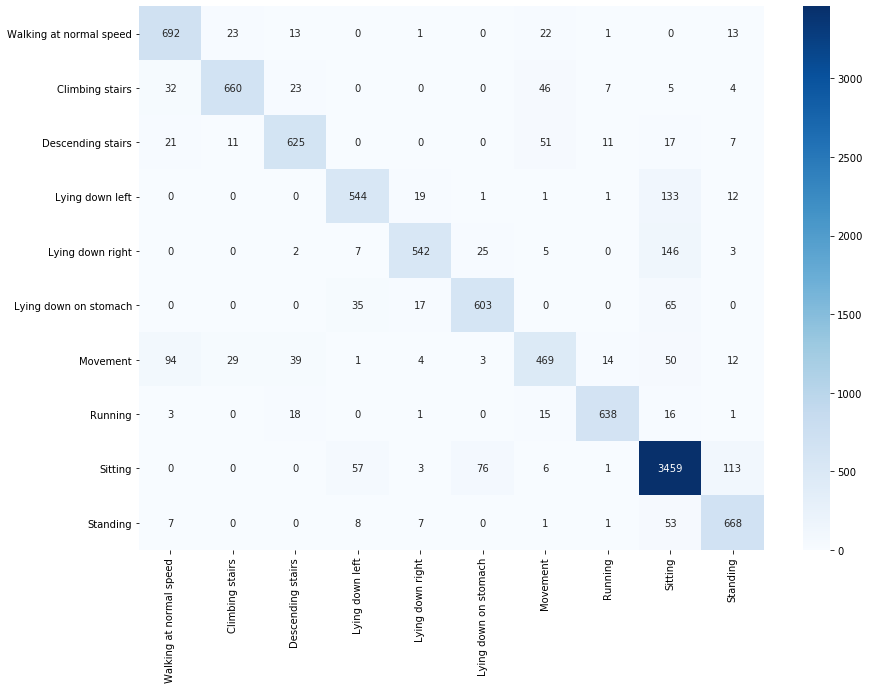

In [52]:
df_cm = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)),
                     index=class_labels.keys(),
                     columns=class_labels.keys())
plt.figure(figsize = (14,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")

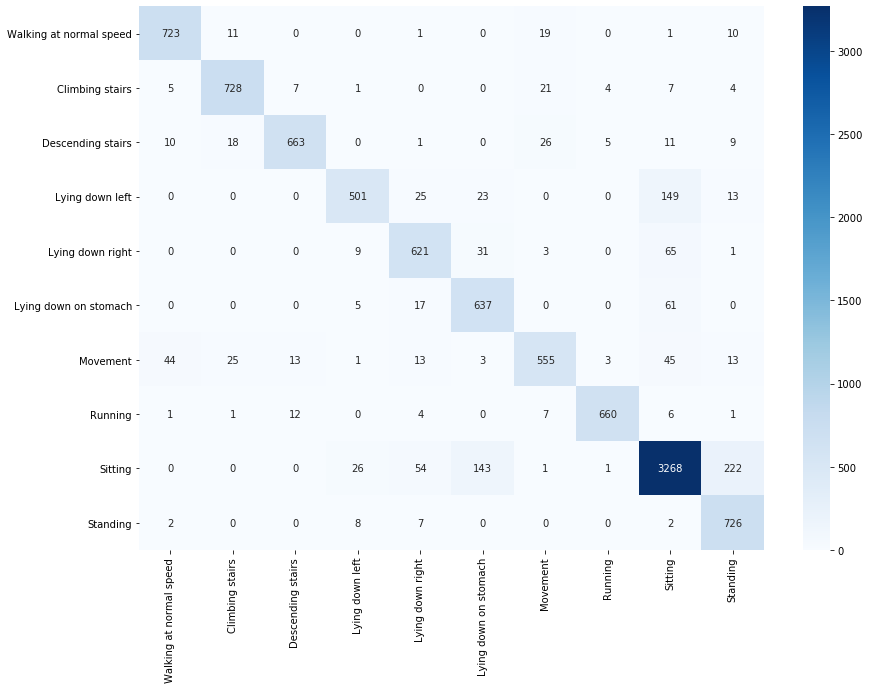

In [53]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv2.tflite")
interpreter.allocate_tensors()
cm = confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test))

x = plot_heatmap(cm, class_labels.keys())

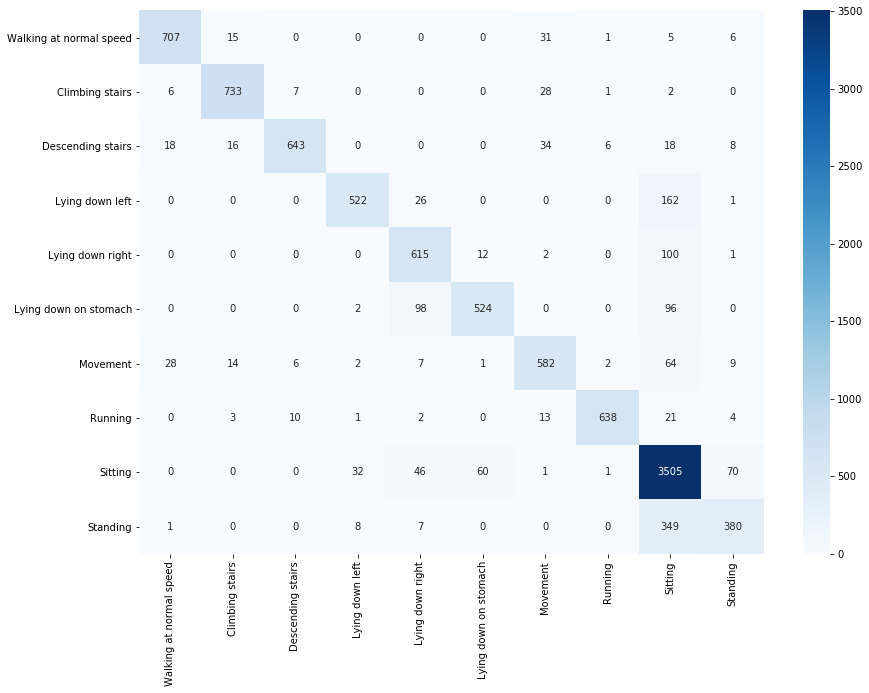

In [54]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv3.tflite")
interpreter.allocate_tensors()
cm = confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test))

x = plot_heatmap(cm, class_labels.keys())